# CS Society Task

#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing Dataset

In [2]:
data=pd.read_csv('Life Expectancy Data.csv')

#### Exploring dataset

In [3]:
data.head()

,Gender,Age,Height,Weight,Income,Lifestyle,Alcohol,Smoking,LE
0,M,24,170,71,20,Active,1,1,83.0
1,M,25,181,85,4,Moderately Active,0,1,77.0
2,M,31,161,60,17,Inctive,0,0,81.0
3,M,38,177,75,12,Inctive,1,0,75.0
4,M,34,164,74,4,Inctive,1,0,68.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gender     100 non-null    object 
 1   Age        100 non-null    int64  
 2   Height     100 non-null    int64  
 3   Weight     100 non-null    int64  
 4   Income     100 non-null    int64  
 5   Lifestyle  100 non-null    object 
 6   Alcohol    100 non-null    int64  
 7   Smoking    100 non-null    int64  
 8   LE         100 non-null    float64
dtypes: float64(1), int64(6), object(2)
memory usage: 7.2+ KB


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,100.0,37.92,12.276840,18.0,28.0,35.0,47.25,60.0
Height,100.0,166.25,10.038688,146.0,160.0,166.0,173.00,185.0
Weight,100.0,66.57,14.381002,45.0,56.0,64.0,74.25,100.0
Income,100.0,10.14,6.051997,1.0,4.0,10.0,16.00,21.0
Alcohol,100.0,0.42,0.496045,0.0,0.0,0.0,1.00,1.0
Smoking,100.0,0.44,0.498888,0.0,0.0,0.0,1.00,1.0
LE,100.0,78.39,6.103311,62.0,74.0,78.5,82.00,92.0


In [6]:
data.describe(include="object").transpose()

,count,unique,top,freq
Gender,100,2,M,50
Lifestyle,100,3,Inctive,44


#### Since bmi plays an important role in a person's health, we create a new feature bmi using height and weight. 
#### We drop the features height and weight.

In [7]:
data['bmi']=data['Weight']*10000/(data['Height']**2)

In [8]:
data.drop(['Weight','Height'],inplace=True,axis=1)

<AxesSubplot:>

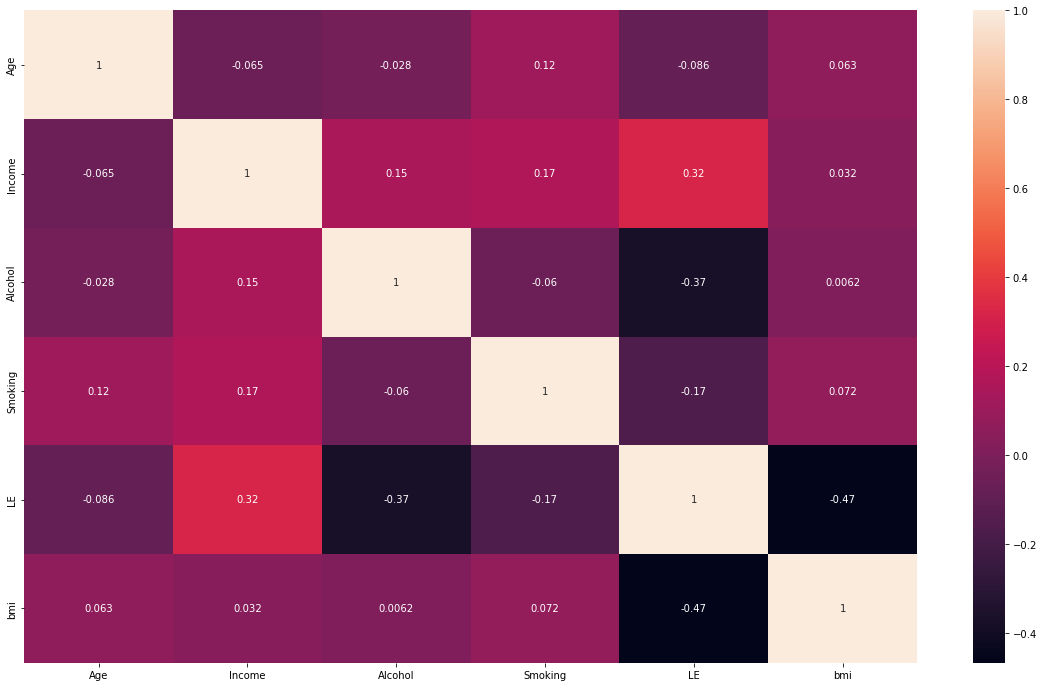

In [9]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True)

#### Dealing with non numeric categorical data columns

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
cat_cols=['Gender','Lifestyle']
for cat in cat_cols:
    enc = OneHotEncoder(sparse=False)
    color_onehot = enc.fit_transform(data[[cat]])
    x=pd.DataFrame(color_onehot, columns=list(enc.categories_[0]))
    for i in x.columns:
        data[i]=x[i]
    del data[cat]

#### Life Expectancy Prediction

In [12]:
x=data.drop(columns=['LE'])
y=data['LE']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.20,random_state=42)

In [15]:
r2_Score=[]
MAE=[]
Algorithm=[]

#### Multiple Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = regressor.predict(X_test)

In [19]:
print(mean_absolute_error(y_test,y_pred))


1.251493927168093


In [20]:
print(r2_score(y_test,y_pred))

0.9475681060367591


In [21]:
r2_Score.append(r2_score(y_test,y_pred))
MAE.append(mean_absolute_error(y_test,y_pred))
Algorithm.append("Multiple Linear Regression")

#### Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [24]:
y_pred = regressor.predict(X_test)

In [25]:
print(mean_absolute_error(y_test,y_pred))

2.4


In [26]:
print(r2_score(y_test,y_pred))

0.7166186359269933


In [27]:
r2_Score.append(r2_score(y_test,y_pred))
MAE.append(mean_absolute_error(y_test,y_pred))
Algorithm.append("Decision Tree Regressor")

#### Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [30]:
y_pred = regressor.predict(X_test)

In [31]:
print(mean_absolute_error(y_test,y_pred))

2.8000000000000016


In [32]:
print(r2_score(y_test,y_pred))

0.7333093179634964


In [33]:
r2_Score.append(r2_score(y_test,y_pred))
MAE.append(mean_absolute_error(y_test,y_pred))
Algorithm.append("Random Forest Regressor")

#### Support Vector Regressor

In [34]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
y_train = y_train.values.reshape(len(y_train),1)
X = sc_X.fit_transform(X_train)
y = sc_y.fit_transform(y_train)

y_train=y_train.reshape(len(y_train,))

In [35]:
y=y.ravel()

In [36]:
from sklearn.svm import SVR

In [37]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR()

In [38]:
y_pred=regressor.predict(sc_X.transform(X_test))

In [39]:
y_pred = sc_y.inverse_transform(y_pred.reshape(-1,1))

In [40]:
print(mean_absolute_error(y_test,y_pred))

1.8248166635322698


In [41]:
print(r2_score(y_test,y_pred))

0.8704765942800246


In [42]:
r2_Score.append(r2_score(y_test,y_pred))
MAE.append(mean_absolute_error(y_test,y_pred))
Algorithm.append("Support Vector Regressor")

#### XGBoost Regressor

In [43]:
from xgboost import XGBRegressor

In [44]:
model=XGBRegressor()
model.fit(X_train,y_train);

In [45]:
y_pred=model.predict(X_test)

In [46]:
print(mean_absolute_error(y_test,y_pred))

1.8227500915527344


In [47]:
print(r2_score(y_test,y_pred))

0.8694379061909102


In [48]:
r2_Score.append(r2_score(y_test,y_pred))
MAE.append(mean_absolute_error(y_test,y_pred))
Algorithm.append("XGBoost Regressor")

#### Catboost Regressor

In [49]:
import catboost as cb

In [50]:
model = cb.CatBoostRegressor()

In [51]:
train_dataset = cb.Pool(X_train, y_train) 

In [52]:
grid = {'iterations': [100, 138, 175],
        'learning_rate': [0.01,0.03, 0.1,0.3],
        'depth': [4, 6, 8,10],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

0:	learn: 78.3756109	test: 77.9767775	best: 77.9767775 (0)	total: 47ms	remaining: 4.66s
1:	learn: 77.6269329	test: 77.2711827	best: 77.2711827 (1)	total: 48ms	remaining: 2.35s
2:	learn: 76.8594332	test: 76.5043036	best: 76.5043036 (2)	total: 48.4ms	remaining: 1.56s
3:	learn: 76.1080057	test: 75.7580750	best: 75.7580750 (3)	total: 49ms	remaining: 1.18s
4:	learn: 75.3662786	test: 75.0273788	best: 75.0273788 (4)	total: 49.7ms	remaining: 944ms
5:	learn: 74.6412319	test: 74.3124304	best: 74.3124304 (5)	total: 50.3ms	remaining: 788ms
6:	learn: 73.9277391	test: 73.6069101	best: 73.6069101 (6)	total: 51ms	remaining: 677ms
7:	learn: 73.2107631	test: 72.9026668	best: 72.9026668 (7)	total: 51.6ms	remaining: 593ms
8:	learn: 72.5117777	test: 72.2313917	best: 72.2313917 (8)	total: 52ms	remaining: 526ms
9:	learn: 71.7986082	test: 71.5150725	best: 71.5150725 (9)	total: 52.3ms	remaining: 471ms
10:	learn: 71.1079222	test: 70.8286625	best: 70.8286625 (10)	total: 52.7ms	remaining: 426ms
11:	learn: 70.4135

12:	learn: 70.0883934	test: 69.9063146	best: 69.9063146 (12)	total: 5.09ms	remaining: 34ms
13:	learn: 69.4310386	test: 69.2552941	best: 69.2552941 (13)	total: 5.58ms	remaining: 34.3ms
14:	learn: 68.8044698	test: 68.7669781	best: 68.7669781 (14)	total: 6.33ms	remaining: 35.8ms
15:	learn: 68.1647097	test: 68.1524156	best: 68.1524156 (15)	total: 6.91ms	remaining: 36.3ms
16:	learn: 67.5116222	test: 67.4948216	best: 67.4948216 (16)	total: 7.46ms	remaining: 36.4ms
17:	learn: 66.8807882	test: 66.8836763	best: 66.8836763 (17)	total: 8.19ms	remaining: 37.3ms
18:	learn: 66.2498693	test: 66.2566058	best: 66.2566058 (18)	total: 8.85ms	remaining: 37.7ms
19:	learn: 65.6243318	test: 65.6611571	best: 65.6611571 (19)	total: 9.58ms	remaining: 38.3ms
20:	learn: 65.0290187	test: 65.1799550	best: 65.1799550 (20)	total: 10.3ms	remaining: 38.6ms
21:	learn: 64.4021576	test: 64.5538105	best: 64.5538105 (21)	total: 10.8ms	remaining: 38.2ms
22:	learn: 63.8258365	test: 64.0020803	best: 64.0020803 (22)	total: 11.2

93:	learn: 0.0455943	test: 6.2353623	best: 6.1895993 (44)	total: 29.8ms	remaining: 1.9ms
94:	learn: 0.0449263	test: 6.2360045	best: 6.1895993 (44)	total: 30.4ms	remaining: 1.6ms
95:	learn: 0.0419304	test: 6.2360892	best: 6.1895993 (44)	total: 31ms	remaining: 1.29ms
96:	learn: 0.0394224	test: 6.2348318	best: 6.1895993 (44)	total: 31.7ms	remaining: 979us
97:	learn: 0.0372989	test: 6.2343126	best: 6.1895993 (44)	total: 32.2ms	remaining: 657us
98:	learn: 0.0364398	test: 6.2331533	best: 6.1895993 (44)	total: 32.9ms	remaining: 332us
99:	learn: 0.0349527	test: 6.2328577	best: 6.1895993 (44)	total: 33.5ms	remaining: 0us

bestTest = 6.189599325
bestIteration = 44

7:	loss: 6.1895993	best: 4.3659293 (2)	total: 474ms	remaining: 10.9s
0:	learn: 78.4599682	test: 78.0763865	best: 78.0763865 (0)	total: 470us	remaining: 46.6ms
1:	learn: 77.8188585	test: 77.4671417	best: 77.4671417 (1)	total: 1.15ms	remaining: 56.1ms
2:	learn: 77.0677215	test: 76.7145370	best: 76.7145370 (2)	total: 1.43ms	remaining: 46

95:	learn: 0.0619630	test: 6.6778309	best: 6.6630471 (76)	total: 30.7ms	remaining: 1.28ms
96:	learn: 0.0606507	test: 6.6779490	best: 6.6630471 (76)	total: 31.1ms	remaining: 962us
97:	learn: 0.0571805	test: 6.6796834	best: 6.6630471 (76)	total: 31.4ms	remaining: 641us
98:	learn: 0.0554060	test: 6.6806451	best: 6.6630471 (76)	total: 31.8ms	remaining: 321us
99:	learn: 0.0538962	test: 6.6828170	best: 6.6630471 (76)	total: 32.1ms	remaining: 0us

bestTest = 6.663047108
bestIteration = 76

11:	loss: 6.6630471	best: 4.3659293 (2)	total: 673ms	remaining: 10.1s
0:	learn: 78.5621224	test: 78.1790139	best: 78.1790139 (0)	total: 515us	remaining: 51ms
1:	learn: 78.0865388	test: 77.7236594	best: 77.7236594 (1)	total: 1.23ms	remaining: 60.2ms
2:	learn: 77.3732836	test: 77.0048747	best: 77.0048747 (2)	total: 1.78ms	remaining: 57.6ms
3:	learn: 76.7430116	test: 76.3954653	best: 76.3954653 (3)	total: 2.42ms	remaining: 58.2ms
4:	learn: 76.1289856	test: 75.8046409	best: 75.8046409 (4)	total: 2.94ms	remainin

43:	learn: 51.6149463	test: 52.1326270	best: 52.1326270 (43)	total: 14.5ms	remaining: 31ms
44:	learn: 51.1196830	test: 51.6450442	best: 51.6450442 (44)	total: 15.2ms	remaining: 31.4ms
45:	learn: 50.6222157	test: 51.1871354	best: 51.1871354 (45)	total: 15.6ms	remaining: 31.2ms
46:	learn: 50.1331671	test: 50.7354858	best: 50.7354858 (46)	total: 16.2ms	remaining: 31.3ms
47:	learn: 49.6540361	test: 50.2634218	best: 50.2634218 (47)	total: 16.8ms	remaining: 31.4ms
48:	learn: 49.1751781	test: 49.7914650	best: 49.7914650 (48)	total: 18ms	remaining: 32.7ms
49:	learn: 48.6981531	test: 49.3212521	best: 49.3212521 (49)	total: 19ms	remaining: 33.4ms
50:	learn: 48.2319802	test: 48.8610421	best: 48.8610421 (50)	total: 19.6ms	remaining: 33.4ms
51:	learn: 47.7568629	test: 48.3846859	best: 48.3846859 (51)	total: 20.1ms	remaining: 33.3ms
52:	learn: 47.2943132	test: 47.9181338	best: 47.9181338 (52)	total: 20.8ms	remaining: 33.3ms
53:	learn: 46.8349657	test: 47.4580912	best: 47.4580912 (53)	total: 21.4ms	r

132:	learn: 2.3048348	test: 5.4142562	best: 5.4142562 (132)	total: 107ms	remaining: 4.01ms
133:	learn: 2.2583371	test: 5.3805108	best: 5.3805108 (133)	total: 107ms	remaining: 3.21ms
134:	learn: 2.2078477	test: 5.3362660	best: 5.3362660 (134)	total: 108ms	remaining: 2.4ms
135:	learn: 2.1636774	test: 5.2894986	best: 5.2894986 (135)	total: 109ms	remaining: 1.6ms
136:	learn: 2.1242415	test: 5.2576659	best: 5.2576659 (136)	total: 109ms	remaining: 798us
137:	learn: 2.0741766	test: 5.2110412	best: 5.2110412 (137)	total: 110ms	remaining: 0us

bestTest = 5.211041191
bestIteration = 137

17:	loss: 5.2110412	best: 4.3659293 (2)	total: 1.08s	remaining: 10.4s
0:	learn: 71.5287922	test: 71.1205982	best: 71.1205982 (0)	total: 430us	remaining: 59ms
1:	learn: 64.6972378	test: 64.6996793	best: 64.6996793 (1)	total: 1.01ms	remaining: 68.4ms
2:	learn: 58.3085489	test: 58.3264052	best: 58.3264052 (2)	total: 1.42ms	remaining: 64ms
3:	learn: 52.6213371	test: 52.7004134	best: 52.7004134 (3)	total: 1.87ms	rema

14:	learn: 68.8044698	test: 68.7669781	best: 68.7669781 (14)	total: 10.9ms	remaining: 89.2ms
15:	learn: 68.1647097	test: 68.1524156	best: 68.1524156 (15)	total: 11.8ms	remaining: 89.9ms
16:	learn: 67.5116222	test: 67.4948216	best: 67.4948216 (16)	total: 12.4ms	remaining: 88.6ms
17:	learn: 66.8807882	test: 66.8836763	best: 66.8836763 (17)	total: 13.1ms	remaining: 87.6ms
18:	learn: 66.2498693	test: 66.2566058	best: 66.2566058 (18)	total: 13.9ms	remaining: 87ms
19:	learn: 65.6243318	test: 65.6611571	best: 65.6611571 (19)	total: 14.6ms	remaining: 86.1ms
20:	learn: 65.0290187	test: 65.1799550	best: 65.1799550 (20)	total: 15.4ms	remaining: 85.8ms
21:	learn: 64.4021576	test: 64.5538105	best: 64.5538105 (21)	total: 16ms	remaining: 84.2ms
22:	learn: 63.8258365	test: 64.0020803	best: 64.0020803 (22)	total: 16.5ms	remaining: 82.7ms
23:	learn: 63.2527943	test: 63.5626954	best: 63.5626954 (23)	total: 17.1ms	remaining: 81.4ms
24:	learn: 62.6558491	test: 62.9612994	best: 62.9612994 (24)	total: 17.7ms

58:	learn: 0.1585357	test: 6.2122771	best: 6.1895993 (44)	total: 18.1ms	remaining: 24.2ms
59:	learn: 0.1540338	test: 6.2168903	best: 6.1895993 (44)	total: 18.8ms	remaining: 24.5ms
60:	learn: 0.1464789	test: 6.2178038	best: 6.1895993 (44)	total: 19.5ms	remaining: 24.6ms
61:	learn: 0.1399771	test: 6.2258295	best: 6.1895993 (44)	total: 20ms	remaining: 24.5ms
62:	learn: 0.1366823	test: 6.2319572	best: 6.1895993 (44)	total: 20.5ms	remaining: 24.4ms
63:	learn: 0.1341165	test: 6.2324848	best: 6.1895993 (44)	total: 21ms	remaining: 24.3ms
64:	learn: 0.1287242	test: 6.2314341	best: 6.1895993 (44)	total: 21.8ms	remaining: 24.5ms
65:	learn: 0.1246994	test: 6.2315900	best: 6.1895993 (44)	total: 22.5ms	remaining: 24.5ms
66:	learn: 0.1198536	test: 6.2311393	best: 6.1895993 (44)	total: 23.1ms	remaining: 24.5ms
67:	learn: 0.1120599	test: 6.2297485	best: 6.1895993 (44)	total: 23.6ms	remaining: 24.3ms
68:	learn: 0.1073864	test: 6.2299994	best: 6.1895993 (44)	total: 24ms	remaining: 24ms
69:	learn: 0.10296

70:	learn: 1.0323369	test: 5.6968287	best: 5.6968287 (70)	total: 21.7ms	remaining: 20.4ms
71:	learn: 1.0086456	test: 5.6959127	best: 5.6959127 (71)	total: 22.1ms	remaining: 20.3ms
72:	learn: 0.9851579	test: 5.6909312	best: 5.6909312 (72)	total: 22.5ms	remaining: 20ms
73:	learn: 0.9662594	test: 5.6857601	best: 5.6857601 (73)	total: 23.1ms	remaining: 20ms
74:	learn: 0.9434804	test: 5.6708518	best: 5.6708518 (74)	total: 23.5ms	remaining: 19.7ms
75:	learn: 0.9132732	test: 5.6602895	best: 5.6602895 (75)	total: 24ms	remaining: 19.5ms
76:	learn: 0.8873574	test: 5.6510599	best: 5.6510599 (76)	total: 24.6ms	remaining: 19.5ms
77:	learn: 0.8638959	test: 5.6328366	best: 5.6328366 (77)	total: 25.3ms	remaining: 19.4ms
78:	learn: 0.8453762	test: 5.6266092	best: 5.6266092 (78)	total: 25.8ms	remaining: 19.2ms
79:	learn: 0.8264252	test: 5.6316151	best: 5.6266092 (78)	total: 26.5ms	remaining: 19.2ms
80:	learn: 0.8089820	test: 5.6153950	best: 5.6153950 (80)	total: 27.2ms	remaining: 19.1ms
81:	learn: 0.789

77:	learn: 14.3857461	test: 17.3042388	best: 17.3042388 (77)	total: 23.8ms	remaining: 18.3ms
78:	learn: 14.1078469	test: 17.0253123	best: 17.0253123 (78)	total: 24.5ms	remaining: 18.3ms
79:	learn: 13.8023232	test: 16.7197031	best: 16.7197031 (79)	total: 25.2ms	remaining: 18.3ms
80:	learn: 13.5546109	test: 16.4834151	best: 16.4834151 (80)	total: 25.8ms	remaining: 18.2ms
81:	learn: 13.2950870	test: 16.2977847	best: 16.2977847 (81)	total: 26.4ms	remaining: 18ms
82:	learn: 13.0293188	test: 16.0454683	best: 16.0454683 (82)	total: 27ms	remaining: 17.9ms
83:	learn: 12.7630042	test: 15.7817924	best: 15.7817924 (83)	total: 27.7ms	remaining: 17.8ms
84:	learn: 12.5130187	test: 15.5307068	best: 15.5307068 (84)	total: 28.3ms	remaining: 17.6ms
85:	learn: 12.2808330	test: 15.2876450	best: 15.2876450 (85)	total: 28.8ms	remaining: 17.4ms
86:	learn: 12.0450883	test: 15.0581206	best: 15.0581206 (86)	total: 29.5ms	remaining: 17.3ms
87:	learn: 11.8401427	test: 14.8698058	best: 14.8698058 (87)	total: 30.3ms

67:	learn: 40.9014812	test: 41.6839337	best: 41.6839337 (67)	total: 28.2ms	remaining: 44.4ms
68:	learn: 40.5093021	test: 41.2994761	best: 41.2994761 (68)	total: 28.9ms	remaining: 44.4ms
69:	learn: 40.1185116	test: 40.9382460	best: 40.9382460 (69)	total: 29.4ms	remaining: 44.1ms
70:	learn: 39.7325535	test: 40.5511505	best: 40.5511505 (70)	total: 29.9ms	remaining: 43.8ms
71:	learn: 39.3507704	test: 40.1749713	best: 40.1749713 (71)	total: 30.4ms	remaining: 43.5ms
72:	learn: 38.9709879	test: 39.7959319	best: 39.7959319 (72)	total: 30.7ms	remaining: 42.9ms
73:	learn: 38.5942324	test: 39.4542828	best: 39.4542828 (73)	total: 31.1ms	remaining: 42.4ms
74:	learn: 38.2238217	test: 39.0816530	best: 39.0816530 (74)	total: 31.6ms	remaining: 42.2ms
75:	learn: 37.8594233	test: 38.7599014	best: 38.7599014 (75)	total: 32.4ms	remaining: 42.1ms
76:	learn: 37.4946391	test: 38.3950845	best: 38.3950845 (76)	total: 33.1ms	remaining: 42.1ms
77:	learn: 37.1354546	test: 38.0361752	best: 38.0361752 (77)	total: 33

71:	learn: 0.5623505	test: 4.4228820	best: 4.4228820 (71)	total: 31.5ms	remaining: 45.1ms
72:	learn: 0.5464687	test: 4.4210721	best: 4.4210721 (72)	total: 32ms	remaining: 44.7ms
73:	learn: 0.5289343	test: 4.4131163	best: 4.4131163 (73)	total: 32.3ms	remaining: 44.1ms
74:	learn: 0.5164483	test: 4.4052352	best: 4.4052352 (74)	total: 33.5ms	remaining: 44.7ms
75:	learn: 0.5020305	test: 4.4085150	best: 4.4052352 (74)	total: 34.2ms	remaining: 44.5ms
76:	learn: 0.4887523	test: 4.4055325	best: 4.4052352 (74)	total: 35.4ms	remaining: 45ms
77:	learn: 0.4792138	test: 4.3957630	best: 4.3957630 (77)	total: 35.9ms	remaining: 44.6ms
78:	learn: 0.4630306	test: 4.3890215	best: 4.3890215 (78)	total: 36.4ms	remaining: 44.2ms
79:	learn: 0.4506628	test: 4.3906075	best: 4.3890215 (78)	total: 37ms	remaining: 44ms
80:	learn: 0.4370610	test: 4.3847892	best: 4.3847892 (80)	total: 37.7ms	remaining: 43.7ms
81:	learn: 0.4263860	test: 4.3879994	best: 4.3847892 (80)	total: 38.2ms	remaining: 43.3ms
82:	learn: 0.41831

81:	learn: 36.8433285	test: 37.9998647	best: 37.9998647 (81)	total: 31.6ms	remaining: 35.8ms
82:	learn: 36.4956189	test: 37.6470376	best: 37.6470376 (82)	total: 32.4ms	remaining: 35.9ms
83:	learn: 36.1577148	test: 37.3169899	best: 37.3169899 (83)	total: 33.6ms	remaining: 36.4ms
84:	learn: 35.8178231	test: 37.0092661	best: 37.0092661 (84)	total: 35.2ms	remaining: 37.3ms
85:	learn: 35.4826318	test: 36.6658030	best: 36.6658030 (85)	total: 35.9ms	remaining: 37.2ms
86:	learn: 35.1381868	test: 36.3203885	best: 36.3203885 (86)	total: 36.2ms	remaining: 36.6ms
87:	learn: 34.8097926	test: 36.0049371	best: 36.0049371 (87)	total: 36.7ms	remaining: 36.3ms
88:	learn: 34.4922005	test: 35.6912409	best: 35.6912409 (88)	total: 37.3ms	remaining: 36ms
89:	learn: 34.1850205	test: 35.4018894	best: 35.4018894 (89)	total: 38.3ms	remaining: 36.2ms
90:	learn: 33.8714737	test: 35.0910428	best: 35.0910428 (90)	total: 39.3ms	remaining: 36.3ms
91:	learn: 33.5543523	test: 34.7863259	best: 34.7863259 (91)	total: 40.1

108:	learn: 0.3263380	test: 4.7833671	best: 4.7824824 (107)	total: 35.4ms	remaining: 21.4ms
109:	learn: 0.3192636	test: 4.7822022	best: 4.7822022 (109)	total: 39.1ms	remaining: 23.1ms
110:	learn: 0.3145535	test: 4.7828178	best: 4.7822022 (109)	total: 39.8ms	remaining: 23ms
111:	learn: 0.3086579	test: 4.7774187	best: 4.7774187 (111)	total: 40.3ms	remaining: 22.7ms
112:	learn: 0.3043936	test: 4.7820516	best: 4.7774187 (111)	total: 41.1ms	remaining: 22.5ms
113:	learn: 0.3011397	test: 4.7824502	best: 4.7774187 (111)	total: 41.5ms	remaining: 22.2ms
114:	learn: 0.2965361	test: 4.7825731	best: 4.7774187 (111)	total: 42.1ms	remaining: 22ms
115:	learn: 0.2916017	test: 4.7809544	best: 4.7774187 (111)	total: 42.8ms	remaining: 21.7ms
116:	learn: 0.2889144	test: 4.7780940	best: 4.7774187 (111)	total: 43.4ms	remaining: 21.5ms
117:	learn: 0.2861498	test: 4.7812778	best: 4.7774187 (111)	total: 44ms	remaining: 21.2ms
118:	learn: 0.2827573	test: 4.7821718	best: 4.7774187 (111)	total: 44.5ms	remaining: 2

126:	learn: 25.9025389	test: 27.6532569	best: 27.6532569 (126)	total: 45.2ms	remaining: 17.1ms
127:	learn: 25.6901897	test: 27.4377606	best: 27.4377606 (127)	total: 45.9ms	remaining: 16.9ms
128:	learn: 25.4625915	test: 27.2100149	best: 27.2100149 (128)	total: 49.4ms	remaining: 17.6ms
129:	learn: 25.2374228	test: 26.9996603	best: 26.9996603 (129)	total: 49.9ms	remaining: 17.3ms
130:	learn: 25.0177492	test: 26.7888064	best: 26.7888064 (130)	total: 50.2ms	remaining: 16.9ms
131:	learn: 24.8097790	test: 26.5931023	best: 26.5931023 (131)	total: 50.5ms	remaining: 16.5ms
132:	learn: 24.5925984	test: 26.3767629	best: 26.3767629 (132)	total: 50.9ms	remaining: 16.1ms
133:	learn: 24.3855106	test: 26.1818026	best: 26.1818026 (133)	total: 51.2ms	remaining: 15.7ms
134:	learn: 24.1811084	test: 25.9943431	best: 25.9943431 (134)	total: 51.4ms	remaining: 15.2ms
135:	learn: 23.9539520	test: 25.7698262	best: 25.7698262 (135)	total: 51.6ms	remaining: 14.8ms
136:	learn: 23.7442465	test: 25.5575174	best: 25.5

132:	learn: 0.3060946	test: 5.5008390	best: 5.4903111 (122)	total: 53.7ms	remaining: 16.9ms
133:	learn: 0.3004314	test: 5.4980055	best: 5.4903111 (122)	total: 54.7ms	remaining: 16.7ms
134:	learn: 0.2942324	test: 5.5012684	best: 5.4903111 (122)	total: 56.5ms	remaining: 16.7ms
135:	learn: 0.2891592	test: 5.4972279	best: 5.4903111 (122)	total: 57.2ms	remaining: 16.4ms
136:	learn: 0.2864640	test: 5.4981271	best: 5.4903111 (122)	total: 57.6ms	remaining: 16ms
137:	learn: 0.2830933	test: 5.4964728	best: 5.4903111 (122)	total: 58.1ms	remaining: 15.6ms
138:	learn: 0.2789146	test: 5.4987867	best: 5.4903111 (122)	total: 58.4ms	remaining: 15.1ms
139:	learn: 0.2744869	test: 5.4966471	best: 5.4903111 (122)	total: 58.7ms	remaining: 14.7ms
140:	learn: 0.2691210	test: 5.4990328	best: 5.4903111 (122)	total: 59ms	remaining: 14.2ms
141:	learn: 0.2646579	test: 5.4963050	best: 5.4903111 (122)	total: 59.3ms	remaining: 13.8ms
142:	learn: 0.2594382	test: 5.4964314	best: 5.4903111 (122)	total: 59.6ms	remaining:

170:	learn: 22.5028157	test: 24.5595594	best: 24.5595594 (170)	total: 59.7ms	remaining: 1.4ms
171:	learn: 22.3349390	test: 24.3957379	best: 24.3957379 (171)	total: 60.2ms	remaining: 1.05ms
172:	learn: 22.1549978	test: 24.2351103	best: 24.2351103 (172)	total: 60.8ms	remaining: 702us
173:	learn: 22.0238524	test: 24.0992919	best: 24.0992919 (173)	total: 62.8ms	remaining: 360us
174:	learn: 21.8590734	test: 23.9505269	best: 23.9505269 (174)	total: 63.9ms	remaining: 0us

bestTest = 23.95052688
bestIteration = 174

44:	loss: 23.9505269	best: 4.3518961 (33)	total: 3.29s	remaining: 10.8s
0:	learn: 77.4136099	test: 77.0596419	best: 77.0596419 (0)	total: 820us	remaining: 143ms
1:	learn: 76.0078843	test: 75.7136962	best: 75.7136962 (1)	total: 1.44ms	remaining: 124ms
2:	learn: 73.9253566	test: 73.6155244	best: 73.6155244 (2)	total: 1.72ms	remaining: 98.6ms
3:	learn: 72.1197059	test: 71.8706200	best: 71.8706200 (3)	total: 2.22ms	remaining: 94.8ms
4:	learn: 70.3895664	test: 70.2085578	best: 70.208557

68:	learn: 0.4144860	test: 6.5478191	best: 6.5028028 (54)	total: 21.6ms	remaining: 33.2ms
69:	learn: 0.4106091	test: 6.5526234	best: 6.5028028 (54)	total: 22.5ms	remaining: 33.7ms
70:	learn: 0.4034343	test: 6.5555228	best: 6.5028028 (54)	total: 23ms	remaining: 33.7ms
71:	learn: 0.3947128	test: 6.5441520	best: 6.5028028 (54)	total: 23.5ms	remaining: 33.6ms
72:	learn: 0.3823080	test: 6.5569713	best: 6.5028028 (54)	total: 24ms	remaining: 33.5ms
73:	learn: 0.3735072	test: 6.5494287	best: 6.5028028 (54)	total: 24.6ms	remaining: 33.5ms
74:	learn: 0.3596688	test: 6.5547165	best: 6.5028028 (54)	total: 25.2ms	remaining: 33.6ms
75:	learn: 0.3523001	test: 6.5480750	best: 6.5028028 (54)	total: 25.7ms	remaining: 33.5ms
76:	learn: 0.3460999	test: 6.5491444	best: 6.5028028 (54)	total: 26.3ms	remaining: 33.5ms
77:	learn: 0.3259356	test: 6.5363335	best: 6.5028028 (54)	total: 27ms	remaining: 33.6ms
78:	learn: 0.3189521	test: 6.5137586	best: 6.5028028 (54)	total: 27.7ms	remaining: 33.6ms
79:	learn: 0.310

44:	learn: 21.7769201	test: 28.3954747	best: 28.3954747 (44)	total: 25.5ms	remaining: 31.1ms
45:	learn: 21.1636702	test: 27.8327946	best: 27.8327946 (45)	total: 26.2ms	remaining: 30.7ms
46:	learn: 20.5816441	test: 27.3642271	best: 27.3642271 (46)	total: 26.8ms	remaining: 30.2ms
47:	learn: 20.0083574	test: 26.8405310	best: 26.8405310 (47)	total: 27.4ms	remaining: 29.7ms
48:	learn: 19.4487449	test: 26.3866833	best: 26.3866833 (48)	total: 28.3ms	remaining: 29.4ms
49:	learn: 18.8819061	test: 25.8450898	best: 25.8450898 (49)	total: 28.8ms	remaining: 28.8ms
50:	learn: 18.3410633	test: 25.3094832	best: 25.3094832 (50)	total: 29.4ms	remaining: 28.3ms
51:	learn: 17.8464403	test: 24.8554183	best: 24.8554183 (51)	total: 30.2ms	remaining: 27.9ms
52:	learn: 17.3442670	test: 24.4301574	best: 24.4301574 (52)	total: 31.3ms	remaining: 27.7ms
53:	learn: 16.8711645	test: 24.0827442	best: 24.0827442 (53)	total: 32.1ms	remaining: 27.4ms
54:	learn: 16.4137599	test: 23.8479789	best: 23.8479789 (54)	total: 33

90:	learn: 0.0001190	test: 14.8980338	best: 14.8755316 (24)	total: 52.9ms	remaining: 5.23ms
91:	learn: 0.0001130	test: 14.8980315	best: 14.8755316 (24)	total: 53.9ms	remaining: 4.69ms
92:	learn: 0.0001064	test: 14.8980304	best: 14.8755316 (24)	total: 54.9ms	remaining: 4.13ms
93:	learn: 0.0000973	test: 14.8980322	best: 14.8755316 (24)	total: 55.8ms	remaining: 3.56ms
94:	learn: 0.0000904	test: 14.8980313	best: 14.8755316 (24)	total: 56.8ms	remaining: 2.99ms
95:	learn: 0.0000820	test: 14.8980284	best: 14.8755316 (24)	total: 57.8ms	remaining: 2.41ms
96:	learn: 0.0000766	test: 14.8980274	best: 14.8755316 (24)	total: 58.8ms	remaining: 1.82ms
97:	learn: 0.0000729	test: 14.8980275	best: 14.8755316 (24)	total: 59.7ms	remaining: 1.22ms
98:	learn: 0.0000652	test: 14.8980306	best: 14.8755316 (24)	total: 60.7ms	remaining: 612us
99:	learn: 0.0000581	test: 14.8980305	best: 14.8755316 (24)	total: 61.5ms	remaining: 0us

bestTest = 14.87553158
bestIteration = 24

51:	loss: 14.8755316	best: 4.3518961 (33

70:	learn: 0.4485609	test: 12.7624350	best: 12.7624350 (70)	total: 38.6ms	remaining: 15.8ms
71:	learn: 0.4302810	test: 12.7600499	best: 12.7600499 (71)	total: 39.3ms	remaining: 15.3ms
72:	learn: 0.4076355	test: 12.7523113	best: 12.7523113 (72)	total: 39.9ms	remaining: 14.8ms
73:	learn: 0.3895469	test: 12.7503930	best: 12.7503930 (73)	total: 40.8ms	remaining: 14.3ms
74:	learn: 0.3698472	test: 12.7377972	best: 12.7377972 (74)	total: 41.7ms	remaining: 13.9ms
75:	learn: 0.3560157	test: 12.7318699	best: 12.7318699 (75)	total: 42.6ms	remaining: 13.5ms
76:	learn: 0.3381403	test: 12.7318576	best: 12.7318576 (76)	total: 43.6ms	remaining: 13ms
77:	learn: 0.3222688	test: 12.7315061	best: 12.7315061 (77)	total: 44.6ms	remaining: 12.6ms
78:	learn: 0.3080313	test: 12.7255760	best: 12.7255760 (78)	total: 45.5ms	remaining: 12.1ms
79:	learn: 0.2931665	test: 12.7198633	best: 12.7198633 (79)	total: 46.3ms	remaining: 11.6ms
80:	learn: 0.2802849	test: 12.7132912	best: 12.7132912 (80)	total: 47.3ms	remainin

0:	learn: 77.4447817	test: 77.5431453	best: 77.5431453 (0)	total: 1.21ms	remaining: 120ms
1:	learn: 75.4443834	test: 75.5100464	best: 75.5100464 (1)	total: 2.17ms	remaining: 106ms
2:	learn: 73.7339647	test: 73.9998691	best: 73.9998691 (2)	total: 2.82ms	remaining: 91.3ms
3:	learn: 72.0338735	test: 72.7085607	best: 72.7085607 (3)	total: 3.59ms	remaining: 86.1ms
4:	learn: 70.4799354	test: 71.5012927	best: 71.5012927 (4)	total: 4.45ms	remaining: 84.6ms
5:	learn: 68.6389408	test: 69.5663166	best: 69.5663166 (5)	total: 5.12ms	remaining: 80.3ms
6:	learn: 67.2244984	test: 68.5866315	best: 68.5866315 (6)	total: 6.03ms	remaining: 80.1ms
7:	learn: 65.7527484	test: 67.3604991	best: 67.3604991 (7)	total: 7.04ms	remaining: 81ms
8:	learn: 64.2266208	test: 66.2666500	best: 66.2666500 (8)	total: 7.9ms	remaining: 79.9ms
9:	learn: 62.6660408	test: 64.8469897	best: 64.8469897 (9)	total: 8.68ms	remaining: 78.2ms
10:	learn: 61.2546821	test: 63.8563703	best: 63.8563703 (10)	total: 9.6ms	remaining: 77.7ms
11:

77:	learn: 0.0114328	test: 15.0120619	best: 15.0075012 (57)	total: 46.6ms	remaining: 13.1ms
78:	learn: 0.0103434	test: 15.0124802	best: 15.0075012 (57)	total: 47.6ms	remaining: 12.7ms
79:	learn: 0.0092458	test: 15.0135808	best: 15.0075012 (57)	total: 49.1ms	remaining: 12.3ms
80:	learn: 0.0088431	test: 15.0132607	best: 15.0075012 (57)	total: 50.1ms	remaining: 11.7ms
81:	learn: 0.0080567	test: 15.0137502	best: 15.0075012 (57)	total: 51.2ms	remaining: 11.2ms
82:	learn: 0.0074126	test: 15.0137961	best: 15.0075012 (57)	total: 52.5ms	remaining: 10.8ms
83:	learn: 0.0069085	test: 15.0135464	best: 15.0075012 (57)	total: 53.6ms	remaining: 10.2ms
84:	learn: 0.0067932	test: 15.0136073	best: 15.0075012 (57)	total: 54.4ms	remaining: 9.6ms
85:	learn: 0.0064469	test: 15.0137014	best: 15.0075012 (57)	total: 55.2ms	remaining: 8.99ms
86:	learn: 0.0062060	test: 15.0141175	best: 15.0075012 (57)	total: 55.8ms	remaining: 8.35ms
87:	learn: 0.0060458	test: 15.0140542	best: 15.0075012 (57)	total: 56.7ms	remaini

22:	learn: 19.6193048	test: 26.0482676	best: 26.0482676 (22)	total: 12.9ms	remaining: 43.1ms
23:	learn: 18.0753144	test: 24.5124485	best: 24.5124485 (23)	total: 13.5ms	remaining: 42.6ms
24:	learn: 16.7079528	test: 23.1800269	best: 23.1800269 (24)	total: 14.1ms	remaining: 42.2ms
25:	learn: 15.9195566	test: 22.6142054	best: 22.6142054 (25)	total: 14.9ms	remaining: 42.3ms
26:	learn: 15.0279909	test: 21.8113165	best: 21.8113165 (26)	total: 15.9ms	remaining: 42.9ms
27:	learn: 14.2249967	test: 20.9757962	best: 20.9757962 (27)	total: 16.8ms	remaining: 43.2ms
28:	learn: 13.4828666	test: 20.2909397	best: 20.2909397 (28)	total: 17.9ms	remaining: 43.8ms
29:	learn: 12.4103087	test: 19.2264502	best: 19.2264502 (29)	total: 18.3ms	remaining: 42.8ms
30:	learn: 11.8186706	test: 18.8745467	best: 18.8745467 (30)	total: 19.2ms	remaining: 42.7ms
31:	learn: 11.2311431	test: 18.3886657	best: 18.3886657 (31)	total: 20.1ms	remaining: 42.7ms
32:	learn: 10.6426286	test: 17.7458577	best: 17.7458577 (32)	total: 20

75:	learn: 38.4120024	test: 42.3486191	best: 42.3486191 (75)	total: 41.9ms	remaining: 34.2ms
76:	learn: 38.0581669	test: 42.0051224	best: 42.0051224 (76)	total: 43.1ms	remaining: 34.1ms
77:	learn: 37.7022859	test: 41.6899593	best: 41.6899593 (77)	total: 43.8ms	remaining: 33.7ms
78:	learn: 37.3338087	test: 41.3222560	best: 41.3222560 (78)	total: 44.4ms	remaining: 33.2ms
79:	learn: 36.9789527	test: 40.9753654	best: 40.9753654 (79)	total: 48.6ms	remaining: 35.2ms
80:	learn: 36.6395683	test: 40.7183009	best: 40.7183009 (80)	total: 49.6ms	remaining: 34.9ms
81:	learn: 36.2917129	test: 40.3950625	best: 40.3950625 (81)	total: 50.5ms	remaining: 34.5ms
82:	learn: 35.9414269	test: 40.0429568	best: 40.0429568 (82)	total: 51.2ms	remaining: 34ms
83:	learn: 35.6017206	test: 39.7209222	best: 39.7209222 (83)	total: 52ms	remaining: 33.4ms
84:	learn: 35.2665066	test: 39.4227310	best: 39.4227310 (84)	total: 52.8ms	remaining: 32.9ms
85:	learn: 34.9336265	test: 39.0950715	best: 39.0950715 (85)	total: 53.7ms

36:	learn: 2.4056944	test: 14.6154247	best: 14.6154247 (36)	total: 20.8ms	remaining: 56.9ms
37:	learn: 2.2191405	test: 14.4494436	best: 14.4494436 (37)	total: 21.9ms	remaining: 57.7ms
38:	learn: 2.0498908	test: 14.2910375	best: 14.2910375 (38)	total: 22.9ms	remaining: 58.1ms
39:	learn: 1.9087533	test: 14.1965829	best: 14.1965829 (39)	total: 23.9ms	remaining: 58.7ms
40:	learn: 1.7762197	test: 14.0809231	best: 14.0809231 (40)	total: 24.9ms	remaining: 58.9ms
41:	learn: 1.6557443	test: 14.0004374	best: 14.0004374 (41)	total: 25.9ms	remaining: 59.1ms
42:	learn: 1.5372550	test: 13.9094445	best: 13.9094445 (42)	total: 26.7ms	remaining: 58.9ms
43:	learn: 1.4273549	test: 13.8394769	best: 13.8394769 (43)	total: 27.6ms	remaining: 58.9ms
44:	learn: 1.3246208	test: 13.7836733	best: 13.7836733 (44)	total: 28.4ms	remaining: 58.8ms
45:	learn: 1.2479176	test: 13.7080603	best: 13.7080603 (45)	total: 29.1ms	remaining: 58.2ms
46:	learn: 1.1600438	test: 13.6554853	best: 13.6554853 (46)	total: 30ms	remainin

8:	learn: 73.2228726	test: 73.8064586	best: 73.8064586 (8)	total: 5.67ms	remaining: 81.3ms
9:	learn: 72.5696856	test: 73.2151011	best: 73.2151011 (9)	total: 7.16ms	remaining: 91.7ms
10:	learn: 71.9513897	test: 72.7685719	best: 72.7685719 (10)	total: 8.28ms	remaining: 95.6ms
11:	learn: 71.2947091	test: 72.1321776	best: 72.1321776 (11)	total: 9.13ms	remaining: 95.9ms
12:	learn: 70.6893535	test: 71.5284033	best: 71.5284033 (12)	total: 10.1ms	remaining: 96.7ms
13:	learn: 70.0582603	test: 71.0290564	best: 71.0290564 (13)	total: 10.9ms	remaining: 96.8ms
14:	learn: 69.4282902	test: 70.4419039	best: 70.4419039 (14)	total: 11.7ms	remaining: 95.8ms
15:	learn: 68.7961045	test: 69.8729803	best: 69.8729803 (15)	total: 16.3ms	remaining: 124ms
16:	learn: 68.2090305	test: 69.3022770	best: 69.3022770 (16)	total: 17.1ms	remaining: 122ms
17:	learn: 67.6274124	test: 68.8335163	best: 68.8335163 (17)	total: 18ms	remaining: 120ms
18:	learn: 67.0007377	test: 68.2446895	best: 68.2446895 (18)	total: 18.6ms	rema

5:	learn: 45.8931921	test: 49.9078639	best: 49.9078639 (5)	total: 13.7ms	remaining: 302ms
6:	learn: 42.1773843	test: 47.4857213	best: 47.4857213 (6)	total: 14.9ms	remaining: 279ms
7:	learn: 38.6621342	test: 44.6245983	best: 44.6245983 (7)	total: 15.7ms	remaining: 255ms
8:	learn: 35.3288516	test: 42.2192516	best: 42.2192516 (8)	total: 16.5ms	remaining: 237ms
9:	learn: 32.1973112	test: 39.3640836	best: 39.3640836 (9)	total: 17.4ms	remaining: 222ms
10:	learn: 29.4795614	test: 37.4387455	best: 37.4387455 (10)	total: 18.2ms	remaining: 210ms
11:	learn: 26.8163801	test: 34.9047951	best: 34.9047951 (11)	total: 19.1ms	remaining: 201ms
12:	learn: 24.5458881	test: 32.7023501	best: 32.7023501 (12)	total: 19.9ms	remaining: 191ms
13:	learn: 22.3862046	test: 31.0915086	best: 31.0915086 (13)	total: 20.7ms	remaining: 184ms
14:	learn: 20.4033377	test: 29.3575476	best: 29.3575476 (14)	total: 21.4ms	remaining: 175ms
15:	learn: 18.5893748	test: 27.7833690	best: 27.7833690 (15)	total: 22.1ms	remaining: 168m

95:	learn: 0.0006227	test: 14.5001710	best: 14.4858137 (36)	total: 59.2ms	remaining: 25.9ms
96:	learn: 0.0005728	test: 14.5001732	best: 14.4858137 (36)	total: 60.4ms	remaining: 25.5ms
97:	learn: 0.0005185	test: 14.5001768	best: 14.4858137 (36)	total: 63.9ms	remaining: 26.1ms
98:	learn: 0.0004717	test: 14.5002074	best: 14.4858137 (36)	total: 65ms	remaining: 25.6ms
99:	learn: 0.0004393	test: 14.5001857	best: 14.4858137 (36)	total: 65.8ms	remaining: 25ms
100:	learn: 0.0004105	test: 14.5001827	best: 14.4858137 (36)	total: 66.6ms	remaining: 24.4ms
101:	learn: 0.0003878	test: 14.5001727	best: 14.4858137 (36)	total: 67.7ms	remaining: 23.9ms
102:	learn: 0.0003716	test: 14.5001694	best: 14.4858137 (36)	total: 68.6ms	remaining: 23.3ms
103:	learn: 0.0003519	test: 14.5001796	best: 14.4858137 (36)	total: 69.4ms	remaining: 22.7ms
104:	learn: 0.0003226	test: 14.5001564	best: 14.4858137 (36)	total: 70.3ms	remaining: 22.1ms
105:	learn: 0.0003036	test: 14.5001541	best: 14.4858137 (36)	total: 70.9ms	rema

72:	learn: 13.4500462	test: 20.9880155	best: 20.9880155 (72)	total: 39.8ms	remaining: 35.5ms
73:	learn: 13.1355250	test: 20.6985716	best: 20.6985716 (73)	total: 41ms	remaining: 35.4ms
74:	learn: 12.8512299	test: 20.4578890	best: 20.4578890 (74)	total: 42ms	remaining: 35.3ms
75:	learn: 12.5113447	test: 20.1316615	best: 20.1316615 (75)	total: 42.8ms	remaining: 34.9ms
76:	learn: 12.2283796	test: 19.8621422	best: 19.8621422 (76)	total: 43.6ms	remaining: 34.6ms
77:	learn: 11.9454065	test: 19.6265945	best: 19.6265945 (77)	total: 44.6ms	remaining: 34.3ms
78:	learn: 11.6815352	test: 19.4315415	best: 19.4315415 (78)	total: 45.6ms	remaining: 34.1ms
79:	learn: 11.4050092	test: 19.1621620	best: 19.1621620 (79)	total: 46.9ms	remaining: 34ms
80:	learn: 11.1418794	test: 18.9504137	best: 18.9504137 (80)	total: 48ms	remaining: 33.8ms
81:	learn: 10.9035080	test: 18.7664853	best: 18.7664853 (81)	total: 48.8ms	remaining: 33.3ms
82:	learn: 10.6501620	test: 18.5433503	best: 18.5433503 (82)	total: 49.6ms	rem

58:	learn: 0.0473359	test: 15.0104247	best: 15.0075012 (57)	total: 34ms	remaining: 45.5ms
59:	learn: 0.0428423	test: 15.0137622	best: 15.0075012 (57)	total: 35.1ms	remaining: 45.6ms
60:	learn: 0.0385011	test: 15.0122648	best: 15.0075012 (57)	total: 36ms	remaining: 45.4ms
61:	learn: 0.0340057	test: 15.0143525	best: 15.0075012 (57)	total: 37.1ms	remaining: 45.5ms
62:	learn: 0.0315487	test: 15.0125683	best: 15.0075012 (57)	total: 38.2ms	remaining: 45.4ms
63:	learn: 0.0298609	test: 15.0121108	best: 15.0075012 (57)	total: 39.1ms	remaining: 45.3ms
64:	learn: 0.0272379	test: 15.0105618	best: 15.0075012 (57)	total: 40ms	remaining: 44.9ms
65:	learn: 0.0251156	test: 15.0108389	best: 15.0075012 (57)	total: 40.8ms	remaining: 44.5ms
66:	learn: 0.0230713	test: 15.0104136	best: 15.0075012 (57)	total: 41.7ms	remaining: 44.1ms
67:	learn: 0.0221943	test: 15.0106547	best: 15.0075012 (57)	total: 42.6ms	remaining: 43.9ms
68:	learn: 0.0201176	test: 15.0099751	best: 15.0075012 (57)	total: 43.5ms	remaining: 4

72:	learn: 19.7781443	test: 25.6030415	best: 25.6030415 (72)	total: 36.8ms	remaining: 32.7ms
73:	learn: 19.5063732	test: 25.4126355	best: 25.4126355 (73)	total: 37.3ms	remaining: 32.3ms
74:	learn: 18.9846452	test: 24.8888316	best: 24.8888316 (74)	total: 37.5ms	remaining: 31.5ms
75:	learn: 18.6178333	test: 24.5261245	best: 24.5261245 (75)	total: 38.2ms	remaining: 31.1ms
76:	learn: 18.3171427	test: 24.2442629	best: 24.2442629 (76)	total: 38.8ms	remaining: 30.7ms
77:	learn: 18.0439407	test: 23.9911515	best: 23.9911515 (77)	total: 39.7ms	remaining: 30.5ms
78:	learn: 17.7893222	test: 23.8109651	best: 23.8109651 (78)	total: 40.6ms	remaining: 30.3ms
79:	learn: 17.4480075	test: 23.5220771	best: 23.5220771 (79)	total: 41.4ms	remaining: 30ms
80:	learn: 17.1125984	test: 23.1820429	best: 23.1820429 (80)	total: 42.3ms	remaining: 29.8ms
81:	learn: 16.8792227	test: 22.9776169	best: 22.9776169 (81)	total: 43.3ms	remaining: 29.6ms
82:	learn: 16.5686113	test: 22.7174236	best: 22.7174236 (82)	total: 43.9

70:	learn: 0.1738657	test: 10.1363823	best: 10.1363823 (70)	total: 41.4ms	remaining: 39.1ms
71:	learn: 0.1722130	test: 10.1378399	best: 10.1363823 (70)	total: 42.2ms	remaining: 38.7ms
72:	learn: 0.1670473	test: 10.1348856	best: 10.1348856 (72)	total: 42.9ms	remaining: 38.2ms
73:	learn: 0.1577714	test: 10.1433471	best: 10.1348856 (72)	total: 43.5ms	remaining: 37.6ms
74:	learn: 0.1538706	test: 10.1463374	best: 10.1348856 (72)	total: 44.5ms	remaining: 37.4ms
75:	learn: 0.1494978	test: 10.1465289	best: 10.1348856 (72)	total: 46.6ms	remaining: 38ms
76:	learn: 0.1479195	test: 10.1457982	best: 10.1348856 (72)	total: 47.8ms	remaining: 37.9ms
77:	learn: 0.1402912	test: 10.1450411	best: 10.1348856 (72)	total: 48.7ms	remaining: 37.5ms
78:	learn: 0.1341458	test: 10.1428383	best: 10.1348856 (72)	total: 49.7ms	remaining: 37.1ms
79:	learn: 0.1310203	test: 10.1434139	best: 10.1348856 (72)	total: 50.6ms	remaining: 36.7ms
80:	learn: 0.1284472	test: 10.1438515	best: 10.1348856 (72)	total: 51.4ms	remainin

91:	learn: 33.0068888	test: 37.4281788	best: 37.4281788 (91)	total: 112ms	remaining: 101ms
92:	learn: 32.6983852	test: 37.1357941	best: 37.1357941 (92)	total: 116ms	remaining: 102ms
93:	learn: 32.3890589	test: 36.8491238	best: 36.8491238 (93)	total: 117ms	remaining: 101ms
94:	learn: 32.0822373	test: 36.5765859	best: 36.5765859 (94)	total: 118ms	remaining: 99.6ms
95:	learn: 31.7797943	test: 36.2986945	best: 36.2986945 (95)	total: 119ms	remaining: 98.1ms
96:	learn: 31.4828736	test: 36.0216168	best: 36.0216168 (96)	total: 120ms	remaining: 96.4ms
97:	learn: 31.1842892	test: 35.7313592	best: 35.7313592 (97)	total: 121ms	remaining: 94.7ms
98:	learn: 30.8789645	test: 35.4279572	best: 35.4279572 (98)	total: 122ms	remaining: 93.4ms
99:	learn: 30.5846677	test: 35.1412322	best: 35.1412322 (99)	total: 122ms	remaining: 91.8ms
100:	learn: 30.2846158	test: 34.8381760	best: 34.8381760 (100)	total: 123ms	remaining: 90ms
101:	learn: 29.9996945	test: 34.5814426	best: 34.5814426 (101)	total: 124ms	remaini

109:	learn: 3.6523166	test: 12.6537184	best: 12.6537184 (109)	total: 81.9ms	remaining: 48.4ms
110:	learn: 3.5569929	test: 12.5924361	best: 12.5924361 (110)	total: 83.1ms	remaining: 47.9ms
111:	learn: 3.4653236	test: 12.5485879	best: 12.5485879 (111)	total: 84ms	remaining: 47.3ms
112:	learn: 3.3757083	test: 12.4674050	best: 12.4674050 (112)	total: 85.2ms	remaining: 46.7ms
113:	learn: 3.2951589	test: 12.4104700	best: 12.4104700 (113)	total: 86ms	remaining: 46ms
114:	learn: 3.2118932	test: 12.3376158	best: 12.3376158 (114)	total: 87ms	remaining: 45.4ms
115:	learn: 3.1373183	test: 12.2713157	best: 12.2713157 (115)	total: 87.9ms	remaining: 44.7ms
116:	learn: 3.0661643	test: 12.2029425	best: 12.2029425 (116)	total: 88.6ms	remaining: 43.9ms
117:	learn: 2.9913173	test: 12.1706592	best: 12.1706592 (117)	total: 89.4ms	remaining: 43.2ms
118:	learn: 2.9202766	test: 12.1231495	best: 12.1231495 (118)	total: 90.4ms	remaining: 42.5ms
119:	learn: 2.8488128	test: 12.0538127	best: 12.0538127 (119)	total:

18:	learn: 0.5089017	test: 14.9751577	best: 14.9751577 (18)	total: 12.3ms	remaining: 101ms
19:	learn: 0.4374439	test: 14.9416279	best: 14.9416279 (19)	total: 13.4ms	remaining: 104ms
20:	learn: 0.3749629	test: 14.9258078	best: 14.9258078 (20)	total: 14.3ms	remaining: 105ms
21:	learn: 0.3126888	test: 14.9086722	best: 14.9086722 (21)	total: 15.6ms	remaining: 108ms
22:	learn: 0.2684359	test: 14.8986741	best: 14.8986741 (22)	total: 16.6ms	remaining: 110ms
23:	learn: 0.2252781	test: 14.8940282	best: 14.8940282 (23)	total: 17.4ms	remaining: 110ms
24:	learn: 0.1846758	test: 14.8755316	best: 14.8755316 (24)	total: 18.1ms	remaining: 109ms
25:	learn: 0.1577356	test: 14.8924092	best: 14.8755316 (24)	total: 18.7ms	remaining: 107ms
26:	learn: 0.1402533	test: 14.8947703	best: 14.8755316 (24)	total: 19.3ms	remaining: 106ms
27:	learn: 0.1204343	test: 14.8845951	best: 14.8755316 (24)	total: 19.9ms	remaining: 104ms
28:	learn: 0.1043434	test: 14.8866927	best: 14.8755316 (24)	total: 20.5ms	remaining: 103ms

159:	learn: 0.0000002	test: 14.8980260	best: 14.8755316 (24)	total: 196ms	remaining: 18.4ms
160:	learn: 0.0000001	test: 14.8980261	best: 14.8755316 (24)	total: 201ms	remaining: 17.5ms
161:	learn: 0.0000001	test: 14.8980261	best: 14.8755316 (24)	total: 202ms	remaining: 16.2ms
162:	learn: 0.0000001	test: 14.8980260	best: 14.8755316 (24)	total: 204ms	remaining: 15ms
163:	learn: 0.0000001	test: 14.8980261	best: 14.8755316 (24)	total: 205ms	remaining: 13.8ms
164:	learn: 0.0000001	test: 14.8980261	best: 14.8755316 (24)	total: 206ms	remaining: 12.5ms
165:	learn: 0.0000001	test: 14.8980261	best: 14.8755316 (24)	total: 206ms	remaining: 11.2ms
166:	learn: 0.0000001	test: 14.8980261	best: 14.8755316 (24)	total: 207ms	remaining: 9.92ms
167:	learn: 0.0000001	test: 14.8980261	best: 14.8755316 (24)	total: 208ms	remaining: 8.65ms
168:	learn: 0.0000001	test: 14.8980261	best: 14.8755316 (24)	total: 208ms	remaining: 7.39ms
169:	learn: 0.0000001	test: 14.8980261	best: 14.8755316 (24)	total: 209ms	remainin

17:	learn: 49.2031618	test: 53.0675848	best: 53.0675848 (17)	total: 11.3ms	remaining: 98.2ms
18:	learn: 47.8371523	test: 51.7893147	best: 51.7893147 (18)	total: 12.2ms	remaining: 99.8ms
19:	learn: 46.5059123	test: 50.5002609	best: 50.5002609 (19)	total: 12.9ms	remaining: 100ms
20:	learn: 45.2624505	test: 49.4027357	best: 49.4027357 (20)	total: 15.6ms	remaining: 115ms
21:	learn: 43.9574905	test: 48.1132627	best: 48.1132627 (21)	total: 16.1ms	remaining: 112ms
22:	learn: 42.7621631	test: 46.9952159	best: 46.9952159 (22)	total: 16.8ms	remaining: 111ms
23:	learn: 41.6390269	test: 45.9148569	best: 45.9148569 (23)	total: 17.4ms	remaining: 110ms
24:	learn: 40.4311675	test: 44.7129283	best: 44.7129283 (24)	total: 17.7ms	remaining: 106ms
25:	learn: 39.3898592	test: 43.8150891	best: 43.8150891 (25)	total: 18.2ms	remaining: 105ms
26:	learn: 38.3482642	test: 42.9571491	best: 42.9571491 (26)	total: 18.8ms	remaining: 103ms
27:	learn: 37.3561421	test: 42.1156431	best: 42.1156431 (27)	total: 19.4ms	rem

110:	learn: 0.0839543	test: 12.6701555	best: 12.6689517 (107)	total: 64.3ms	remaining: 37.1ms
111:	learn: 0.0806446	test: 12.6702401	best: 12.6689517 (107)	total: 65.4ms	remaining: 36.8ms
112:	learn: 0.0774813	test: 12.6696172	best: 12.6689517 (107)	total: 66.4ms	remaining: 36.4ms
113:	learn: 0.0756614	test: 12.6703459	best: 12.6689517 (107)	total: 68.7ms	remaining: 36.8ms
114:	learn: 0.0726683	test: 12.6714584	best: 12.6689517 (107)	total: 69.7ms	remaining: 36.4ms
115:	learn: 0.0702285	test: 12.6724089	best: 12.6689517 (107)	total: 70.6ms	remaining: 35.9ms
116:	learn: 0.0680003	test: 12.6725491	best: 12.6689517 (107)	total: 71.5ms	remaining: 35.5ms
117:	learn: 0.0654560	test: 12.6727136	best: 12.6689517 (107)	total: 72.3ms	remaining: 34.9ms
118:	learn: 0.0630569	test: 12.6719446	best: 12.6689517 (107)	total: 73.2ms	remaining: 34.5ms
119:	learn: 0.0603104	test: 12.6715145	best: 12.6689517 (107)	total: 73.9ms	remaining: 33.9ms
120:	learn: 0.0581437	test: 12.6707877	best: 12.6689517 (107

164:	learn: 0.0000066	test: 14.5002127	best: 14.4858137 (36)	total: 119ms	remaining: 7.18ms
165:	learn: 0.0000065	test: 14.5002128	best: 14.4858137 (36)	total: 119ms	remaining: 6.48ms
166:	learn: 0.0000063	test: 14.5002129	best: 14.4858137 (36)	total: 121ms	remaining: 5.8ms
167:	learn: 0.0000058	test: 14.5002131	best: 14.4858137 (36)	total: 123ms	remaining: 5.11ms
168:	learn: 0.0000053	test: 14.5002132	best: 14.4858137 (36)	total: 124ms	remaining: 4.4ms
169:	learn: 0.0000051	test: 14.5002131	best: 14.4858137 (36)	total: 125ms	remaining: 3.67ms
170:	learn: 0.0000049	test: 14.5002132	best: 14.4858137 (36)	total: 125ms	remaining: 2.93ms
171:	learn: 0.0000046	test: 14.5002134	best: 14.4858137 (36)	total: 126ms	remaining: 2.2ms
172:	learn: 0.0000044	test: 14.5002133	best: 14.4858137 (36)	total: 127ms	remaining: 1.47ms
173:	learn: 0.0000040	test: 14.5002134	best: 14.4858137 (36)	total: 127ms	remaining: 732us
174:	learn: 0.0000037	test: 14.5002135	best: 14.4858137 (36)	total: 128ms	remaining:

16:	learn: 52.8847544	test: 56.3051132	best: 56.3051132 (16)	total: 12.9ms	remaining: 120ms
17:	learn: 51.6957147	test: 55.3575551	best: 55.3575551 (17)	total: 14.1ms	remaining: 123ms
18:	learn: 50.3499895	test: 54.1029612	best: 54.1029612 (18)	total: 14.7ms	remaining: 121ms
19:	learn: 49.0325684	test: 52.8285700	best: 52.8285700 (19)	total: 15.1ms	remaining: 117ms
20:	learn: 47.8302651	test: 51.7655451	best: 51.7655451 (20)	total: 15.7ms	remaining: 115ms
21:	learn: 46.4910526	test: 50.4463754	best: 50.4463754 (21)	total: 15.9ms	remaining: 111ms
22:	learn: 45.3179931	test: 49.3561177	best: 49.3561177 (22)	total: 16.5ms	remaining: 109ms
23:	learn: 44.2403643	test: 48.3474228	best: 48.3474228 (23)	total: 17.1ms	remaining: 108ms
24:	learn: 42.9834550	test: 47.0906682	best: 47.0906682 (24)	total: 17.4ms	remaining: 104ms
25:	learn: 41.9991783	test: 46.2570409	best: 46.2570409 (25)	total: 17.9ms	remaining: 103ms
26:	learn: 40.9898745	test: 45.4320477	best: 45.4320477 (26)	total: 18.5ms	remai

1:	learn: 67.1784639	test: 68.3473882	best: 68.3473882 (1)	total: 22.4ms	remaining: 1.94s
2:	learn: 62.1097113	test: 63.8834666	best: 63.8834666 (2)	total: 26.4ms	remaining: 1.51s
3:	learn: 57.3494576	test: 60.3381797	best: 60.3381797 (3)	total: 27.6ms	remaining: 1.18s
4:	learn: 53.2445601	test: 57.1344804	best: 57.1344804 (4)	total: 28.5ms	remaining: 970ms
5:	learn: 48.6227505	test: 52.3014489	best: 52.3014489 (5)	total: 29.7ms	remaining: 837ms
6:	learn: 45.3020088	test: 50.0093493	best: 50.0093493 (6)	total: 31.2ms	remaining: 749ms
7:	learn: 42.0124413	test: 47.3051435	best: 47.3051435 (7)	total: 32.3ms	remaining: 673ms
8:	learn: 38.6833509	test: 44.4109629	best: 44.4109629 (8)	total: 33.5ms	remaining: 619ms
9:	learn: 35.5728258	test: 41.5686533	best: 41.5686533 (9)	total: 34.6ms	remaining: 571ms
10:	learn: 32.9316048	test: 39.7494716	best: 39.7494716 (10)	total: 36.8ms	remaining: 549ms
11:	learn: 30.0698056	test: 36.8928670	best: 36.8928670 (11)	total: 38.8ms	remaining: 527ms
12:	le

168:	learn: 0.0507023	test: 12.1325274	best: 12.1243152 (152)	total: 204ms	remaining: 7.25ms
169:	learn: 0.0495858	test: 12.1326446	best: 12.1243152 (152)	total: 205ms	remaining: 6.04ms
170:	learn: 0.0486067	test: 12.1327617	best: 12.1243152 (152)	total: 206ms	remaining: 4.83ms
171:	learn: 0.0474167	test: 12.1328514	best: 12.1243152 (152)	total: 209ms	remaining: 3.64ms
172:	learn: 0.0466683	test: 12.1325512	best: 12.1243152 (152)	total: 210ms	remaining: 2.42ms
173:	learn: 0.0459023	test: 12.1328070	best: 12.1243152 (152)	total: 210ms	remaining: 1.21ms
174:	learn: 0.0444687	test: 12.1325005	best: 12.1243152 (152)	total: 211ms	remaining: 0us

bestTest = 12.12431522
bestIteration = 152

90:	loss: 12.1243152	best: 4.3518961 (33)	total: 8.56s	remaining: 9.5s
0:	learn: 62.2904059	test: 67.0856057	best: 67.0856057 (0)	total: 802us	remaining: 140ms
1:	learn: 46.2754939	test: 50.8496893	best: 50.8496893 (1)	total: 1.94ms	remaining: 167ms
2:	learn: 35.9075168	test: 41.8321252	best: 41.8321252 (2

147:	learn: 0.0001636	test: 15.0145861	best: 15.0075012 (57)	total: 175ms	remaining: 31.9ms
148:	learn: 0.0001561	test: 15.0145880	best: 15.0075012 (57)	total: 180ms	remaining: 31.3ms
149:	learn: 0.0001500	test: 15.0145892	best: 15.0075012 (57)	total: 180ms	remaining: 30.1ms
150:	learn: 0.0001376	test: 15.0145861	best: 15.0075012 (57)	total: 182ms	remaining: 28.9ms
151:	learn: 0.0001304	test: 15.0145899	best: 15.0075012 (57)	total: 183ms	remaining: 27.8ms
152:	learn: 0.0001210	test: 15.0145913	best: 15.0075012 (57)	total: 185ms	remaining: 26.6ms
153:	learn: 0.0001128	test: 15.0145898	best: 15.0075012 (57)	total: 187ms	remaining: 25.5ms
154:	learn: 0.0001068	test: 15.0145874	best: 15.0075012 (57)	total: 188ms	remaining: 24.2ms
155:	learn: 0.0000998	test: 15.0145853	best: 15.0075012 (57)	total: 189ms	remaining: 23ms
156:	learn: 0.0000951	test: 15.0145829	best: 15.0075012 (57)	total: 190ms	remaining: 21.7ms
157:	learn: 0.0000858	test: 15.0145895	best: 15.0075012 (57)	total: 190ms	remainin

40:	learn: 36.3411016	test: 40.3302485	best: 40.3302485 (40)	total: 22.7ms	remaining: 74.1ms
41:	learn: 35.8056058	test: 39.8879323	best: 39.8879323 (41)	total: 23.4ms	remaining: 74.3ms
42:	learn: 35.2220728	test: 39.3330180	best: 39.3330180 (42)	total: 24.1ms	remaining: 73.9ms
43:	learn: 34.6860610	test: 38.9259202	best: 38.9259202 (43)	total: 24.7ms	remaining: 73.5ms
44:	learn: 33.8139568	test: 38.0976193	best: 38.0976193 (44)	total: 24.9ms	remaining: 72.1ms
45:	learn: 33.1929621	test: 37.6445000	best: 37.6445000 (45)	total: 25.9ms	remaining: 72.5ms
46:	learn: 32.7404516	test: 37.2945432	best: 37.2945432 (46)	total: 28.5ms	remaining: 77.6ms
47:	learn: 32.2297952	test: 36.8261460	best: 36.8261460 (47)	total: 32.8ms	remaining: 86.7ms
48:	learn: 31.6938110	test: 36.3630664	best: 36.3630664 (48)	total: 33.7ms	remaining: 86.7ms
49:	learn: 30.9718620	test: 35.6621928	best: 35.6621928 (49)	total: 34.5ms	remaining: 86.1ms
50:	learn: 30.4049606	test: 35.1877786	best: 35.1877786 (50)	total: 35

79:	learn: 2.0233177	test: 11.1863914	best: 11.1863914 (79)	total: 58.4ms	remaining: 69.3ms
80:	learn: 1.9837484	test: 11.1530688	best: 11.1530688 (80)	total: 60ms	remaining: 69.6ms
81:	learn: 1.9296414	test: 11.1244103	best: 11.1244103 (81)	total: 61.2ms	remaining: 69.4ms
82:	learn: 1.8932150	test: 11.0934273	best: 11.0934273 (82)	total: 62.2ms	remaining: 68.9ms
83:	learn: 1.8376535	test: 11.0575088	best: 11.0575088 (83)	total: 63.3ms	remaining: 68.5ms
84:	learn: 1.8042327	test: 11.0289124	best: 11.0289124 (84)	total: 64.1ms	remaining: 67.9ms
85:	learn: 1.7570399	test: 11.0045111	best: 11.0045111 (85)	total: 64.8ms	remaining: 67.1ms
86:	learn: 1.7148030	test: 10.9900464	best: 10.9900464 (86)	total: 66.3ms	remaining: 67.1ms
87:	learn: 1.6746147	test: 10.9761282	best: 10.9761282 (87)	total: 67.3ms	remaining: 66.6ms
88:	learn: 1.6369460	test: 10.9624265	best: 10.9624265 (88)	total: 68.3ms	remaining: 66ms
89:	learn: 1.5900289	test: 10.9339257	best: 10.9339257 (89)	total: 69.1ms	remaining:

148:	learn: 0.0144554	test: 10.1247591	best: 10.1232792 (118)	total: 90.4ms	remaining: 15.8ms
149:	learn: 0.0143454	test: 10.1247633	best: 10.1232792 (118)	total: 91.5ms	remaining: 15.2ms
150:	learn: 0.0140863	test: 10.1247807	best: 10.1232792 (118)	total: 92.5ms	remaining: 14.7ms
151:	learn: 0.0139971	test: 10.1248467	best: 10.1232792 (118)	total: 93.5ms	remaining: 14.1ms
152:	learn: 0.0134512	test: 10.1251694	best: 10.1232792 (118)	total: 95.2ms	remaining: 13.7ms
153:	learn: 0.0128006	test: 10.1249952	best: 10.1232792 (118)	total: 97.3ms	remaining: 13.3ms
154:	learn: 0.0124946	test: 10.1251406	best: 10.1232792 (118)	total: 98.4ms	remaining: 12.7ms
155:	learn: 0.0121932	test: 10.1252690	best: 10.1232792 (118)	total: 99.6ms	remaining: 12.1ms
156:	learn: 0.0118091	test: 10.1255015	best: 10.1232792 (118)	total: 101ms	remaining: 11.6ms
157:	learn: 0.0112904	test: 10.1252456	best: 10.1232792 (118)	total: 102ms	remaining: 11ms
158:	learn: 0.0111000	test: 10.1251520	best: 10.1232792 (118)	to

62:	learn: 44.0177873	test: 50.0846985	best: 50.0846985 (62)	total: 154ms	remaining: 90.3ms
63:	learn: 43.6034489	test: 49.7175051	best: 49.7175051 (63)	total: 157ms	remaining: 88.1ms
64:	learn: 43.2001805	test: 49.3940218	best: 49.3940218 (64)	total: 160ms	remaining: 85.9ms
65:	learn: 42.8127009	test: 49.0929981	best: 49.0929981 (65)	total: 163ms	remaining: 83.8ms
66:	learn: 42.4098149	test: 48.7217018	best: 48.7217018 (66)	total: 164ms	remaining: 81ms
67:	learn: 42.0034526	test: 48.3224156	best: 48.3224156 (67)	total: 166ms	remaining: 78.3ms
68:	learn: 41.6152007	test: 48.0025659	best: 48.0025659 (68)	total: 172ms	remaining: 77.5ms
69:	learn: 41.2372255	test: 47.7781901	best: 47.7781901 (69)	total: 175ms	remaining: 74.8ms
70:	learn: 40.8540101	test: 47.4240788	best: 47.4240788 (70)	total: 177ms	remaining: 72.1ms
71:	learn: 40.4824927	test: 47.1794469	best: 47.1794469 (71)	total: 179ms	remaining: 69.5ms
72:	learn: 40.1083736	test: 46.8747470	best: 46.8747470 (72)	total: 181ms	remainin

85:	learn: 7.1164151	test: 22.2653229	best: 22.2653229 (85)	total: 118ms	remaining: 19.2ms
86:	learn: 6.9178156	test: 22.0744782	best: 22.0744782 (86)	total: 119ms	remaining: 17.7ms
87:	learn: 6.7354899	test: 21.9389791	best: 21.9389791 (87)	total: 121ms	remaining: 16.5ms
88:	learn: 6.5566606	test: 21.8438149	best: 21.8438149 (88)	total: 126ms	remaining: 15.6ms
89:	learn: 6.3797934	test: 21.7423214	best: 21.7423214 (89)	total: 128ms	remaining: 14.2ms
90:	learn: 6.2060708	test: 21.5707573	best: 21.5707573 (90)	total: 129ms	remaining: 12.8ms
91:	learn: 6.0432978	test: 21.5061312	best: 21.5061312 (91)	total: 131ms	remaining: 11.4ms
92:	learn: 5.8854884	test: 21.4219664	best: 21.4219664 (92)	total: 133ms	remaining: 10ms
93:	learn: 5.7275408	test: 21.2959020	best: 21.2959020 (93)	total: 135ms	remaining: 8.64ms
94:	learn: 5.5763631	test: 21.2046351	best: 21.2046351 (94)	total: 137ms	remaining: 7.23ms
95:	learn: 5.4279506	test: 21.0879059	best: 21.0879059 (95)	total: 139ms	remaining: 5.8ms
96

87:	learn: 0.0428286	test: 21.1288703	best: 21.1288703 (87)	total: 164ms	remaining: 22.3ms
88:	learn: 0.0401411	test: 21.1282172	best: 21.1282172 (88)	total: 166ms	remaining: 20.5ms
89:	learn: 0.0375185	test: 21.1274237	best: 21.1274237 (89)	total: 169ms	remaining: 18.8ms
90:	learn: 0.0351949	test: 21.1262036	best: 21.1262036 (90)	total: 172ms	remaining: 17ms
91:	learn: 0.0332750	test: 21.1256437	best: 21.1256437 (91)	total: 174ms	remaining: 15.1ms
92:	learn: 0.0306945	test: 21.1257392	best: 21.1256437 (91)	total: 176ms	remaining: 13.3ms
93:	learn: 0.0289572	test: 21.1252373	best: 21.1252373 (93)	total: 178ms	remaining: 11.4ms
94:	learn: 0.0269086	test: 21.1245029	best: 21.1245029 (94)	total: 180ms	remaining: 9.47ms
95:	learn: 0.0251984	test: 21.1238831	best: 21.1238831 (95)	total: 182ms	remaining: 7.57ms
96:	learn: 0.0237387	test: 21.1234568	best: 21.1234568 (96)	total: 183ms	remaining: 5.67ms
97:	learn: 0.0224247	test: 21.1229021	best: 21.1229021 (97)	total: 186ms	remaining: 3.79ms
9

95:	learn: 0.0000003	test: 27.3620756	best: 27.3620736 (65)	total: 161ms	remaining: 6.71ms
96:	learn: 0.0000003	test: 27.3620757	best: 27.3620736 (65)	total: 164ms	remaining: 5.07ms
97:	learn: 0.0000002	test: 27.3620757	best: 27.3620736 (65)	total: 167ms	remaining: 3.4ms
98:	learn: 0.0000002	test: 27.3620757	best: 27.3620736 (65)	total: 168ms	remaining: 1.7ms
99:	learn: 0.0000002	test: 27.3620757	best: 27.3620736 (65)	total: 170ms	remaining: 0us

bestTest = 27.36207357
bestIteration = 65

99:	loss: 27.3620736	best: 4.3518961 (33)	total: 10.2s	remaining: 9.37s
0:	learn: 78.5303889	test: 78.4575709	best: 78.4575709 (0)	total: 1.51ms	remaining: 150ms
1:	learn: 77.7711090	test: 77.6864989	best: 77.6864989 (1)	total: 2.14ms	remaining: 105ms
2:	learn: 77.1483059	test: 77.1961626	best: 77.1961626 (2)	total: 4.17ms	remaining: 135ms
3:	learn: 76.5287929	test: 76.7569949	best: 76.7569949 (3)	total: 6.31ms	remaining: 151ms
4:	learn: 75.9250213	test: 76.2836930	best: 76.2836930 (4)	total: 8.7ms	re

10:	learn: 59.7320607	test: 63.3330433	best: 63.3330433 (10)	total: 19.1ms	remaining: 155ms
11:	learn: 58.3205398	test: 62.4722018	best: 62.4722018 (11)	total: 21.6ms	remaining: 158ms
12:	learn: 56.8042679	test: 61.2244487	best: 61.2244487 (12)	total: 23.6ms	remaining: 158ms
13:	learn: 55.3563184	test: 59.8543972	best: 59.8543972 (13)	total: 25.5ms	remaining: 156ms
14:	learn: 53.9479259	test: 58.6998086	best: 58.6998086 (14)	total: 26.7ms	remaining: 151ms
15:	learn: 52.6148709	test: 57.6231377	best: 57.6231377 (15)	total: 28.7ms	remaining: 151ms
16:	learn: 51.4034720	test: 57.1512066	best: 57.1512066 (16)	total: 30.7ms	remaining: 150ms
17:	learn: 50.1920814	test: 56.3228115	best: 56.3228115 (17)	total: 32.5ms	remaining: 148ms
18:	learn: 48.9572872	test: 55.3847052	best: 55.3847052 (18)	total: 34.9ms	remaining: 149ms
19:	learn: 47.7068023	test: 54.5011660	best: 54.5011660 (19)	total: 37.2ms	remaining: 149ms
20:	learn: 46.5456969	test: 53.4526526	best: 53.4526526 (20)	total: 39.5ms	remai

5:	learn: 47.2447070	test: 55.1077196	best: 55.1077196 (5)	total: 23.1ms	remaining: 362ms
6:	learn: 43.1352566	test: 51.5686044	best: 51.5686044 (6)	total: 27.1ms	remaining: 359ms
7:	learn: 39.5179179	test: 49.0041585	best: 49.0041585 (7)	total: 30.2ms	remaining: 348ms
8:	learn: 36.1251767	test: 46.1343222	best: 46.1343222 (8)	total: 32ms	remaining: 324ms
9:	learn: 33.1024232	test: 43.7115854	best: 43.7115854 (9)	total: 34.3ms	remaining: 309ms
10:	learn: 30.1931694	test: 41.1828823	best: 41.1828823 (10)	total: 36ms	remaining: 291ms
11:	learn: 27.8375083	test: 39.8456104	best: 39.8456104 (11)	total: 37.9ms	remaining: 278ms
12:	learn: 25.4477969	test: 37.9992387	best: 37.9992387 (12)	total: 42.1ms	remaining: 282ms
13:	learn: 23.3007989	test: 36.0005621	best: 36.0005621 (13)	total: 45.1ms	remaining: 277ms
14:	learn: 21.3530782	test: 34.5150370	best: 34.5150370 (14)	total: 46.6ms	remaining: 264ms
15:	learn: 19.6272612	test: 33.2382567	best: 33.2382567 (15)	total: 48.8ms	remaining: 256ms
16

99:	learn: 0.0605610	test: 20.4279724	best: 20.4279724 (99)	total: 213ms	remaining: 0us

bestTest = 20.42797242
bestIteration = 99

102:	loss: 20.4279724	best: 4.3518961 (33)	total: 10.8s	remaining: 9.36s
0:	learn: 60.9966998	test: 70.8477054	best: 70.8477054 (0)	total: 1.8ms	remaining: 178ms
1:	learn: 43.3554278	test: 53.1392888	best: 53.1392888 (1)	total: 2.92ms	remaining: 143ms
2:	learn: 33.0072089	test: 45.7203654	best: 45.7203654 (2)	total: 4.71ms	remaining: 152ms
3:	learn: 25.1646688	test: 40.7913214	best: 40.7913214 (3)	total: 6.96ms	remaining: 167ms
4:	learn: 19.3416304	test: 36.9469141	best: 36.9469141 (4)	total: 8.82ms	remaining: 168ms
5:	learn: 14.9420942	test: 35.5123989	best: 35.5123989 (5)	total: 10.9ms	remaining: 171ms
6:	learn: 11.6220058	test: 33.9448294	best: 33.9448294 (6)	total: 12.9ms	remaining: 171ms
7:	learn: 8.6581764	test: 31.8699928	best: 31.8699928 (7)	total: 14.2ms	remaining: 163ms
8:	learn: 6.5227511	test: 30.0587969	best: 30.0587969 (8)	total: 15.4ms	remai

88:	learn: 0.0000195	test: 26.0899832	best: 26.0899830 (87)	total: 153ms	remaining: 18.9ms
89:	learn: 0.0000172	test: 26.0899826	best: 26.0899826 (89)	total: 158ms	remaining: 17.5ms
90:	learn: 0.0000155	test: 26.0899825	best: 26.0899825 (90)	total: 160ms	remaining: 15.8ms
91:	learn: 0.0000130	test: 26.0899829	best: 26.0899825 (90)	total: 161ms	remaining: 14ms
92:	learn: 0.0000108	test: 26.0899823	best: 26.0899823 (92)	total: 163ms	remaining: 12.3ms
93:	learn: 0.0000095	test: 26.0899820	best: 26.0899820 (93)	total: 166ms	remaining: 10.6ms
94:	learn: 0.0000080	test: 26.0899821	best: 26.0899820 (93)	total: 168ms	remaining: 8.84ms
95:	learn: 0.0000072	test: 26.0899820	best: 26.0899820 (93)	total: 170ms	remaining: 7.09ms
96:	learn: 0.0000065	test: 26.0899821	best: 26.0899820 (93)	total: 172ms	remaining: 5.33ms
97:	learn: 0.0000058	test: 26.0899824	best: 26.0899820 (93)	total: 174ms	remaining: 3.55ms
98:	learn: 0.0000051	test: 26.0899823	best: 26.0899820 (93)	total: 177ms	remaining: 1.78ms
9

99:	learn: 37.1972448	test: 44.9439563	best: 44.9439563 (99)	total: 163ms	remaining: 0us

bestTest = 44.94395631
bestIteration = 99

104:	loss: 44.9439563	best: 4.3518961 (33)	total: 11.2s	remaining: 9.28s
0:	learn: 77.6088919	test: 77.8524602	best: 77.8524602 (0)	total: 2.66ms	remaining: 264ms
1:	learn: 75.4155898	test: 75.6093618	best: 75.6093618 (1)	total: 3.27ms	remaining: 160ms
2:	learn: 73.8850562	test: 74.4158705	best: 74.4158705 (2)	total: 5.49ms	remaining: 178ms
3:	learn: 72.3683444	test: 73.3546527	best: 73.3546527 (3)	total: 7.48ms	remaining: 179ms
4:	learn: 70.9310629	test: 72.2646191	best: 72.2646191 (4)	total: 9.4ms	remaining: 179ms
5:	learn: 69.4140917	test: 71.2030358	best: 71.2030358 (5)	total: 11.3ms	remaining: 178ms
6:	learn: 67.7745152	test: 69.7596808	best: 69.7596808 (6)	total: 12.2ms	remaining: 162ms
7:	learn: 66.2656661	test: 68.6158511	best: 68.6158511 (7)	total: 14.3ms	remaining: 165ms
8:	learn: 64.7299898	test: 67.2836537	best: 67.2836537 (8)	total: 15.7ms	re

88:	learn: 10.6216215	test: 24.2306155	best: 24.2306155 (88)	total: 182ms	remaining: 22.5ms
89:	learn: 10.4092657	test: 24.1075869	best: 24.1075869 (89)	total: 188ms	remaining: 20.9ms
90:	learn: 10.1829076	test: 23.8780809	best: 23.8780809 (90)	total: 190ms	remaining: 18.8ms
91:	learn: 9.9632870	test: 23.6934966	best: 23.6934966 (91)	total: 191ms	remaining: 16.6ms
92:	learn: 9.7427285	test: 23.5118956	best: 23.5118956 (92)	total: 192ms	remaining: 14.5ms
93:	learn: 9.5164459	test: 23.3181646	best: 23.3181646 (93)	total: 193ms	remaining: 12.3ms
94:	learn: 9.3179019	test: 23.1616853	best: 23.1616853 (94)	total: 195ms	remaining: 10.3ms
95:	learn: 9.0941691	test: 22.9523782	best: 22.9523782 (95)	total: 196ms	remaining: 8.18ms
96:	learn: 8.9079638	test: 22.8190761	best: 22.8190761 (96)	total: 198ms	remaining: 6.12ms
97:	learn: 8.7125107	test: 22.6536777	best: 22.6536777 (97)	total: 199ms	remaining: 4.06ms
98:	learn: 8.5164806	test: 22.4642643	best: 22.4642643 (98)	total: 199ms	remaining: 2.0

78:	learn: 0.5466006	test: 18.8000258	best: 18.8000258 (78)	total: 197ms	remaining: 52.3ms
79:	learn: 0.5223907	test: 18.7831179	best: 18.7831179 (79)	total: 201ms	remaining: 50.3ms
80:	learn: 0.5010395	test: 18.7746006	best: 18.7746006 (80)	total: 204ms	remaining: 47.7ms
81:	learn: 0.4786606	test: 18.7650917	best: 18.7650917 (81)	total: 206ms	remaining: 45.2ms
82:	learn: 0.4562937	test: 18.7598694	best: 18.7598694 (82)	total: 208ms	remaining: 42.7ms
83:	learn: 0.4372511	test: 18.7534084	best: 18.7534084 (83)	total: 211ms	remaining: 40.1ms
84:	learn: 0.4165366	test: 18.7474326	best: 18.7474326 (84)	total: 212ms	remaining: 37.5ms
85:	learn: 0.3952687	test: 18.7423520	best: 18.7423520 (85)	total: 215ms	remaining: 35ms
86:	learn: 0.3750981	test: 18.7355637	best: 18.7355637 (86)	total: 217ms	remaining: 32.4ms
87:	learn: 0.3579951	test: 18.7308965	best: 18.7308965 (87)	total: 219ms	remaining: 29.8ms
88:	learn: 0.3399147	test: 18.7247852	best: 18.7247852 (88)	total: 221ms	remaining: 27.3ms
8

32:	learn: 66.1904187	test: 68.3746979	best: 68.3746979 (32)	total: 56.4ms	remaining: 115ms
33:	learn: 65.6590376	test: 67.9017250	best: 67.9017250 (33)	total: 57.3ms	remaining: 111ms
34:	learn: 65.3527805	test: 67.7606037	best: 67.7606037 (34)	total: 61.3ms	remaining: 114ms
35:	learn: 64.9161789	test: 67.3964552	best: 67.3964552 (35)	total: 62.7ms	remaining: 111ms
36:	learn: 64.6028002	test: 67.2373294	best: 67.2373294 (36)	total: 64.5ms	remaining: 110ms
37:	learn: 64.2500492	test: 67.0228628	best: 67.0228628 (37)	total: 66.2ms	remaining: 108ms
38:	learn: 63.8263108	test: 66.6162124	best: 66.6162124 (38)	total: 67.1ms	remaining: 105ms
39:	learn: 63.4907780	test: 66.3196307	best: 66.3196307 (39)	total: 69.1ms	remaining: 104ms
40:	learn: 63.2428122	test: 66.2266675	best: 66.2266675 (40)	total: 71ms	remaining: 102ms
41:	learn: 62.8176860	test: 65.8527403	best: 65.8527403 (41)	total: 71.8ms	remaining: 99.1ms
42:	learn: 62.4243763	test: 65.4902623	best: 65.4902623 (42)	total: 72.9ms	remain

55:	learn: 31.0435252	test: 39.9854816	best: 39.9854816 (55)	total: 84.6ms	remaining: 66.5ms
56:	learn: 30.4507955	test: 39.4635116	best: 39.4635116 (56)	total: 86.1ms	remaining: 65ms
57:	learn: 29.9440822	test: 38.9823053	best: 38.9823053 (57)	total: 88ms	remaining: 63.7ms
58:	learn: 29.5512019	test: 38.6626364	best: 38.6626364 (58)	total: 89.7ms	remaining: 62.3ms
59:	learn: 29.1843943	test: 38.3969352	best: 38.3969352 (59)	total: 91.4ms	remaining: 60.9ms
60:	learn: 28.7547675	test: 38.0630804	best: 38.0630804 (60)	total: 93.1ms	remaining: 59.5ms
61:	learn: 28.1364543	test: 37.4778573	best: 37.4778573 (61)	total: 94.5ms	remaining: 57.9ms
62:	learn: 27.8705704	test: 37.3082834	best: 37.3082834 (62)	total: 97ms	remaining: 57ms
63:	learn: 27.5228810	test: 37.0501350	best: 37.0501350 (63)	total: 99.6ms	remaining: 56ms
64:	learn: 27.0145025	test: 36.6242260	best: 36.6242260 (64)	total: 102ms	remaining: 54.8ms
65:	learn: 26.6999878	test: 36.4466024	best: 36.4466024 (65)	total: 104ms	remaini

56:	learn: 4.6696777	test: 19.1285852	best: 19.1285852 (56)	total: 116ms	remaining: 87.3ms
57:	learn: 4.5284083	test: 19.1077359	best: 19.1077359 (57)	total: 120ms	remaining: 86.8ms
58:	learn: 4.3731517	test: 19.0101513	best: 19.0101513 (58)	total: 122ms	remaining: 85ms
59:	learn: 4.2347943	test: 18.9384375	best: 18.9384375 (59)	total: 127ms	remaining: 84.6ms
60:	learn: 4.1018603	test: 18.8532281	best: 18.8532281 (60)	total: 129ms	remaining: 82.5ms
61:	learn: 3.9920425	test: 18.8289443	best: 18.8289443 (61)	total: 131ms	remaining: 80.1ms
62:	learn: 3.8518666	test: 18.7729061	best: 18.7729061 (62)	total: 132ms	remaining: 77.8ms
63:	learn: 3.7411130	test: 18.7316824	best: 18.7316824 (63)	total: 134ms	remaining: 75.4ms
64:	learn: 3.5986526	test: 18.6358752	best: 18.6358752 (64)	total: 135ms	remaining: 72.9ms
65:	learn: 3.5014248	test: 18.5816706	best: 18.5816706 (65)	total: 137ms	remaining: 70.6ms
66:	learn: 3.3897941	test: 18.5365333	best: 18.5365333 (66)	total: 140ms	remaining: 68.7ms
6

49:	learn: 0.3506190	test: 14.6061007	best: 14.6061007 (49)	total: 74.5ms	remaining: 74.5ms
50:	learn: 0.3220573	test: 14.6016455	best: 14.6016455 (50)	total: 76.8ms	remaining: 73.7ms
51:	learn: 0.3025649	test: 14.5940259	best: 14.5940259 (51)	total: 80ms	remaining: 73.8ms
52:	learn: 0.2802443	test: 14.5902128	best: 14.5902128 (52)	total: 82.2ms	remaining: 72.9ms
53:	learn: 0.2606458	test: 14.5880330	best: 14.5880330 (53)	total: 84.2ms	remaining: 71.8ms
54:	learn: 0.2435779	test: 14.5814763	best: 14.5814763 (54)	total: 86ms	remaining: 70.4ms
55:	learn: 0.2261930	test: 14.5754513	best: 14.5754513 (55)	total: 87.8ms	remaining: 69ms
56:	learn: 0.2101663	test: 14.5744949	best: 14.5744949 (56)	total: 90ms	remaining: 67.9ms
57:	learn: 0.1940283	test: 14.5730714	best: 14.5730714 (57)	total: 92.2ms	remaining: 66.7ms
58:	learn: 0.1795149	test: 14.5711981	best: 14.5711981 (58)	total: 94.2ms	remaining: 65.5ms
59:	learn: 0.1664594	test: 14.5711630	best: 14.5711630 (59)	total: 96.3ms	remaining: 64.

42:	learn: 53.0919445	test: 57.7589724	best: 57.7589724 (42)	total: 92.6ms	remaining: 205ms
43:	learn: 52.5904504	test: 57.3501787	best: 57.3501787 (43)	total: 95.4ms	remaining: 204ms
44:	learn: 52.0776398	test: 56.8373321	best: 56.8373321 (44)	total: 96.4ms	remaining: 199ms
45:	learn: 51.5962888	test: 56.4948298	best: 56.4948298 (45)	total: 98.5ms	remaining: 197ms
46:	learn: 51.1191535	test: 56.0726598	best: 56.0726598 (46)	total: 100ms	remaining: 194ms
47:	learn: 50.6559611	test: 55.7536192	best: 55.7536192 (47)	total: 102ms	remaining: 191ms
48:	learn: 50.1811048	test: 55.3079990	best: 55.3079990 (48)	total: 104ms	remaining: 189ms
49:	learn: 49.7191076	test: 55.0329261	best: 55.0329261 (49)	total: 106ms	remaining: 187ms
50:	learn: 49.2364567	test: 54.5525472	best: 54.5525472 (50)	total: 107ms	remaining: 182ms
51:	learn: 48.7797085	test: 54.2061382	best: 54.2061382 (51)	total: 108ms	remaining: 179ms
52:	learn: 48.3393163	test: 53.9348087	best: 53.9348087 (52)	total: 110ms	remaining: 1

16:	learn: 49.1537060	test: 55.6081340	best: 55.6081340 (16)	total: 41.8ms	remaining: 297ms
17:	learn: 47.8303850	test: 54.7073692	best: 54.7073692 (17)	total: 45.9ms	remaining: 306ms
18:	learn: 46.5162435	test: 53.7070444	best: 53.7070444 (18)	total: 48ms	remaining: 301ms
19:	learn: 45.2180494	test: 52.7947616	best: 52.7947616 (19)	total: 50ms	remaining: 295ms
20:	learn: 43.9830370	test: 51.6958122	best: 51.6958122 (20)	total: 52ms	remaining: 290ms
21:	learn: 42.7990128	test: 51.2152624	best: 51.2152624 (21)	total: 53.9ms	remaining: 284ms
22:	learn: 41.6341016	test: 50.2660835	best: 50.2660835 (22)	total: 57.6ms	remaining: 288ms
23:	learn: 40.4128462	test: 49.0553874	best: 49.0553874 (23)	total: 58.6ms	remaining: 278ms
24:	learn: 39.3281713	test: 48.3782798	best: 48.3782798 (24)	total: 60.7ms	remaining: 274ms
25:	learn: 38.2253703	test: 47.4610675	best: 47.4610675 (25)	total: 62.7ms	remaining: 270ms
26:	learn: 37.1202007	test: 46.4468425	best: 46.4468425 (26)	total: 63.3ms	remaining: 

108:	learn: 3.8257433	test: 19.8386933	best: 19.8386933 (108)	total: 231ms	remaining: 61.5ms
109:	learn: 3.7262011	test: 19.7560166	best: 19.7560166 (109)	total: 233ms	remaining: 59.4ms
110:	learn: 3.6278574	test: 19.6675009	best: 19.6675009 (110)	total: 234ms	remaining: 56.9ms
111:	learn: 3.5345226	test: 19.6210123	best: 19.6210123 (111)	total: 236ms	remaining: 54.7ms
112:	learn: 3.4435412	test: 19.5435619	best: 19.5435619 (112)	total: 236ms	remaining: 52.2ms
113:	learn: 3.3525581	test: 19.4809396	best: 19.4809396 (113)	total: 237ms	remaining: 50ms
114:	learn: 3.2672312	test: 19.4298052	best: 19.4298052 (114)	total: 239ms	remaining: 47.8ms
115:	learn: 3.1856201	test: 19.3748175	best: 19.3748175 (115)	total: 240ms	remaining: 45.5ms
116:	learn: 3.1020896	test: 19.3010678	best: 19.3010678 (116)	total: 242ms	remaining: 43.4ms
117:	learn: 3.0227331	test: 19.2430704	best: 19.2430704 (117)	total: 244ms	remaining: 41.4ms
118:	learn: 2.9463715	test: 19.1870988	best: 19.1870988 (118)	total: 246

75:	learn: 0.1054196	test: 21.1539857	best: 21.1539857 (75)	total: 132ms	remaining: 108ms
76:	learn: 0.0977681	test: 21.1502892	best: 21.1502892 (76)	total: 135ms	remaining: 107ms
77:	learn: 0.0905644	test: 21.1482919	best: 21.1482919 (77)	total: 138ms	remaining: 106ms
78:	learn: 0.0837218	test: 21.1451388	best: 21.1451388 (78)	total: 141ms	remaining: 105ms
79:	learn: 0.0775657	test: 21.1447677	best: 21.1447677 (79)	total: 143ms	remaining: 103ms
80:	learn: 0.0720686	test: 21.1423043	best: 21.1423043 (80)	total: 145ms	remaining: 102ms
81:	learn: 0.0672783	test: 21.1392362	best: 21.1392362 (81)	total: 147ms	remaining: 100ms
82:	learn: 0.0623396	test: 21.1364544	best: 21.1364544 (82)	total: 149ms	remaining: 98.9ms
83:	learn: 0.0576945	test: 21.1355215	best: 21.1355215 (83)	total: 151ms	remaining: 97.4ms
84:	learn: 0.0536889	test: 21.1341920	best: 21.1341920 (84)	total: 154ms	remaining: 95.8ms
85:	learn: 0.0498902	test: 21.1328980	best: 21.1328980 (85)	total: 156ms	remaining: 94.1ms
86:	le

38:	learn: 0.0074066	test: 27.3628294	best: 27.3625866 (35)	total: 68.7ms	remaining: 174ms
39:	learn: 0.0060960	test: 27.3627004	best: 27.3625866 (35)	total: 70.6ms	remaining: 173ms
40:	learn: 0.0051389	test: 27.3625478	best: 27.3625478 (40)	total: 72.6ms	remaining: 172ms
41:	learn: 0.0042648	test: 27.3622818	best: 27.3622818 (41)	total: 74.5ms	remaining: 170ms
42:	learn: 0.0037005	test: 27.3622909	best: 27.3622818 (41)	total: 76.3ms	remaining: 169ms
43:	learn: 0.0030673	test: 27.3622204	best: 27.3622204 (43)	total: 78.3ms	remaining: 167ms
44:	learn: 0.0027466	test: 27.3621952	best: 27.3621952 (44)	total: 80.1ms	remaining: 165ms
45:	learn: 0.0023136	test: 27.3621151	best: 27.3621151 (45)	total: 82ms	remaining: 164ms
46:	learn: 0.0019789	test: 27.3621582	best: 27.3621151 (45)	total: 83.9ms	remaining: 163ms
47:	learn: 0.0016244	test: 27.3621152	best: 27.3621151 (45)	total: 85.7ms	remaining: 161ms
48:	learn: 0.0013584	test: 27.3621312	best: 27.3621151 (45)	total: 87.7ms	remaining: 159ms
4

0:	learn: 78.5303889	test: 78.4575709	best: 78.4575709 (0)	total: 7.46ms	remaining: 1.02s
1:	learn: 77.7711090	test: 77.6864989	best: 77.6864989 (1)	total: 9.08ms	remaining: 617ms
2:	learn: 77.1483059	test: 77.1961626	best: 77.1961626 (2)	total: 11.5ms	remaining: 520ms
3:	learn: 76.5287929	test: 76.7569949	best: 76.7569949 (3)	total: 13.4ms	remaining: 449ms
4:	learn: 75.9250213	test: 76.2836930	best: 76.2836930 (4)	total: 15.4ms	remaining: 409ms
5:	learn: 75.2984292	test: 75.8334656	best: 75.8334656 (5)	total: 17.5ms	remaining: 385ms
6:	learn: 74.6397415	test: 75.2515257	best: 75.2515257 (6)	total: 18.6ms	remaining: 347ms
7:	learn: 74.0110263	test: 74.7728113	best: 74.7728113 (7)	total: 20.7ms	remaining: 336ms
8:	learn: 73.3714240	test: 74.2204073	best: 74.2204073 (8)	total: 22.3ms	remaining: 320ms
9:	learn: 72.7540420	test: 73.7060684	best: 73.7060684 (9)	total: 23.9ms	remaining: 306ms
10:	learn: 72.1065681	test: 73.1126102	best: 73.1126102 (10)	total: 25.2ms	remaining: 290ms
11:	lear

127:	learn: 26.6391146	test: 36.3193254	best: 36.3193254 (127)	total: 200ms	remaining: 15.6ms
128:	learn: 26.4011208	test: 36.0831459	best: 36.0831459 (128)	total: 201ms	remaining: 14ms
129:	learn: 26.1891777	test: 35.9931929	best: 35.9931929 (129)	total: 204ms	remaining: 12.6ms
130:	learn: 25.9732640	test: 35.8187169	best: 35.8187169 (130)	total: 207ms	remaining: 11ms
131:	learn: 25.7845878	test: 35.7399875	best: 35.7399875 (131)	total: 209ms	remaining: 9.49ms
132:	learn: 25.5892287	test: 35.6355499	best: 35.6355499 (132)	total: 211ms	remaining: 7.93ms
133:	learn: 25.3606589	test: 35.4179461	best: 35.4179461 (133)	total: 212ms	remaining: 6.33ms
134:	learn: 25.1374675	test: 35.2085734	best: 35.2085734 (134)	total: 213ms	remaining: 4.74ms
135:	learn: 24.9278405	test: 35.0267373	best: 35.0267373 (135)	total: 216ms	remaining: 3.17ms
136:	learn: 24.7110874	test: 34.8341005	best: 34.8341005 (136)	total: 218ms	remaining: 1.59ms
137:	learn: 24.5151555	test: 34.7022080	best: 34.7022080 (137)	t

127:	learn: 3.2310920	test: 18.9581713	best: 18.9581713 (127)	total: 171ms	remaining: 13.3ms
128:	learn: 3.1622914	test: 18.9138596	best: 18.9138596 (128)	total: 174ms	remaining: 12.1ms
129:	learn: 3.0924066	test: 18.8715994	best: 18.8715994 (129)	total: 176ms	remaining: 10.8ms
130:	learn: 3.0184656	test: 18.7985205	best: 18.7985205 (130)	total: 176ms	remaining: 9.42ms
131:	learn: 2.9547722	test: 18.7742218	best: 18.7742218 (131)	total: 179ms	remaining: 8.12ms
132:	learn: 2.8856004	test: 18.7019199	best: 18.7019199 (132)	total: 179ms	remaining: 6.74ms
133:	learn: 2.8225700	test: 18.6619078	best: 18.6619078 (133)	total: 181ms	remaining: 5.4ms
134:	learn: 2.7560399	test: 18.5982416	best: 18.5982416 (134)	total: 182ms	remaining: 4.04ms
135:	learn: 2.6911279	test: 18.5386243	best: 18.5386243 (135)	total: 183ms	remaining: 2.68ms
136:	learn: 2.6268364	test: 18.4844045	best: 18.4844045 (136)	total: 183ms	remaining: 1.34ms
137:	learn: 2.5747867	test: 18.4578880	best: 18.4578880 (137)	total: 18

110:	learn: 0.0328178	test: 20.4190405	best: 20.4190405 (110)	total: 174ms	remaining: 42.2ms
111:	learn: 0.0309504	test: 20.4187661	best: 20.4187661 (111)	total: 176ms	remaining: 40.8ms
112:	learn: 0.0291757	test: 20.4182207	best: 20.4182207 (112)	total: 181ms	remaining: 40.1ms
113:	learn: 0.0275357	test: 20.4182847	best: 20.4182207 (112)	total: 183ms	remaining: 38.6ms
114:	learn: 0.0260530	test: 20.4182413	best: 20.4182207 (112)	total: 185ms	remaining: 37.1ms
115:	learn: 0.0247233	test: 20.4176286	best: 20.4176286 (115)	total: 187ms	remaining: 35.5ms
116:	learn: 0.0235680	test: 20.4170816	best: 20.4170816 (116)	total: 189ms	remaining: 33.9ms
117:	learn: 0.0228396	test: 20.4168057	best: 20.4168057 (117)	total: 190ms	remaining: 32.2ms
118:	learn: 0.0215737	test: 20.4168312	best: 20.4168057 (117)	total: 192ms	remaining: 30.7ms
119:	learn: 0.0205577	test: 20.4166437	best: 20.4166437 (119)	total: 194ms	remaining: 29.1ms
120:	learn: 0.0196649	test: 20.4164234	best: 20.4164234 (120)	total: 2

67:	learn: 0.0003719	test: 26.0900472	best: 26.0900472 (67)	total: 125ms	remaining: 128ms
68:	learn: 0.0003240	test: 26.0900272	best: 26.0900272 (68)	total: 128ms	remaining: 128ms
69:	learn: 0.0002873	test: 26.0900358	best: 26.0900272 (68)	total: 131ms	remaining: 127ms
70:	learn: 0.0002484	test: 26.0900311	best: 26.0900272 (68)	total: 132ms	remaining: 125ms
71:	learn: 0.0002167	test: 26.0900110	best: 26.0900110 (71)	total: 134ms	remaining: 123ms
72:	learn: 0.0001771	test: 26.0900076	best: 26.0900076 (72)	total: 136ms	remaining: 121ms
73:	learn: 0.0001470	test: 26.0900044	best: 26.0900044 (73)	total: 138ms	remaining: 119ms
74:	learn: 0.0001274	test: 26.0900009	best: 26.0900009 (74)	total: 140ms	remaining: 118ms
75:	learn: 0.0001100	test: 26.0899974	best: 26.0899974 (75)	total: 142ms	remaining: 116ms
76:	learn: 0.0000976	test: 26.0899945	best: 26.0899945 (76)	total: 144ms	remaining: 114ms
77:	learn: 0.0000848	test: 26.0899924	best: 26.0899924 (77)	total: 147ms	remaining: 113ms
78:	learn:

48:	learn: 54.6067998	test: 59.1181789	best: 59.1181789 (48)	total: 69.5ms	remaining: 126ms
49:	learn: 54.1815659	test: 58.7344428	best: 58.7344428 (49)	total: 71.8ms	remaining: 126ms
50:	learn: 53.7849580	test: 58.5055393	best: 58.5055393 (50)	total: 74ms	remaining: 126ms
51:	learn: 53.3021902	test: 58.0324743	best: 58.0324743 (51)	total: 74.8ms	remaining: 124ms
52:	learn: 52.9062309	test: 57.7229418	best: 57.7229418 (52)	total: 76.6ms	remaining: 123ms
53:	learn: 52.5485586	test: 57.5080084	best: 57.5080084 (53)	total: 78.3ms	remaining: 122ms
54:	learn: 52.1738834	test: 57.2415705	best: 57.2415705 (54)	total: 80.2ms	remaining: 121ms
55:	learn: 51.7185222	test: 56.8098571	best: 56.8098571 (55)	total: 80.8ms	remaining: 118ms
56:	learn: 51.3495509	test: 56.4951988	best: 56.4951988 (56)	total: 82.7ms	remaining: 118ms
57:	learn: 50.9642498	test: 56.2091974	best: 56.2091974 (57)	total: 84.6ms	remaining: 117ms
58:	learn: 50.5980965	test: 55.8573200	best: 55.8573200 (58)	total: 86ms	remaining

36:	learn: 34.2897683	test: 43.5040314	best: 43.5040314 (36)	total: 63.4ms	remaining: 173ms
37:	learn: 33.4957650	test: 42.9415249	best: 42.9415249 (37)	total: 66.5ms	remaining: 175ms
38:	learn: 32.7828037	test: 42.4079145	best: 42.4079145 (38)	total: 68.7ms	remaining: 174ms
39:	learn: 32.1309135	test: 42.0068879	best: 42.0068879 (39)	total: 70.5ms	remaining: 173ms
40:	learn: 31.3466505	test: 41.2159256	best: 41.2159256 (40)	total: 72.3ms	remaining: 171ms
41:	learn: 30.5759510	test: 40.4242933	best: 40.4242933 (41)	total: 73.1ms	remaining: 167ms
42:	learn: 29.8524289	test: 39.7780523	best: 39.7780523 (42)	total: 74.9ms	remaining: 165ms
43:	learn: 29.1332961	test: 39.0836855	best: 39.0836855 (43)	total: 75.9ms	remaining: 162ms
44:	learn: 28.4496862	test: 38.5341483	best: 38.5341483 (44)	total: 78ms	remaining: 161ms
45:	learn: 27.6838458	test: 37.7824039	best: 37.7824039 (45)	total: 78.8ms	remaining: 158ms
46:	learn: 27.0632819	test: 37.3934080	best: 37.3934080 (46)	total: 80.7ms	remaini

19:	learn: 17.7741013	test: 31.2653484	best: 31.2653484 (19)	total: 35.6ms	remaining: 210ms
20:	learn: 16.5499954	test: 30.1606207	best: 30.1606207 (20)	total: 39.1ms	remaining: 218ms
21:	learn: 15.4658392	test: 29.5717040	best: 29.5717040 (21)	total: 41.2ms	remaining: 217ms
22:	learn: 14.4466385	test: 28.8114809	best: 28.8114809 (22)	total: 43.1ms	remaining: 216ms
23:	learn: 13.1769605	test: 27.6160715	best: 27.6160715 (23)	total: 43.7ms	remaining: 208ms
24:	learn: 12.3467783	test: 27.2173286	best: 27.2173286 (24)	total: 49.8ms	remaining: 225ms
25:	learn: 11.4512136	test: 26.5590138	best: 26.5590138 (25)	total: 51.9ms	remaining: 223ms
26:	learn: 10.5187147	test: 25.7236877	best: 25.7236877 (26)	total: 52.7ms	remaining: 217ms
27:	learn: 9.7529462	test: 25.0215074	best: 25.0215074 (27)	total: 53.6ms	remaining: 211ms
28:	learn: 8.9795762	test: 24.3882688	best: 24.3882688 (28)	total: 54.2ms	remaining: 204ms
29:	learn: 8.4475278	test: 24.1414927	best: 24.1414927 (29)	total: 56.1ms	remainin

124:	learn: 0.0675340	test: 18.6395314	best: 18.6395314 (124)	total: 227ms	remaining: 23.6ms
125:	learn: 0.0644131	test: 18.6386237	best: 18.6386237 (125)	total: 229ms	remaining: 21.8ms
126:	learn: 0.0616175	test: 18.6373244	best: 18.6373244 (126)	total: 232ms	remaining: 20.1ms
127:	learn: 0.0588478	test: 18.6373148	best: 18.6373148 (127)	total: 235ms	remaining: 18.4ms
128:	learn: 0.0565419	test: 18.6368037	best: 18.6368037 (128)	total: 237ms	remaining: 16.5ms
129:	learn: 0.0542444	test: 18.6362676	best: 18.6362676 (129)	total: 239ms	remaining: 14.7ms
130:	learn: 0.0521572	test: 18.6358320	best: 18.6358320 (130)	total: 241ms	remaining: 12.9ms
131:	learn: 0.0499008	test: 18.6359319	best: 18.6358320 (130)	total: 243ms	remaining: 11ms
132:	learn: 0.0478839	test: 18.6347728	best: 18.6347728 (132)	total: 245ms	remaining: 9.21ms
133:	learn: 0.0460726	test: 18.6337085	best: 18.6337085 (133)	total: 247ms	remaining: 7.37ms
134:	learn: 0.0440789	test: 18.6340189	best: 18.6337085 (133)	total: 249

89:	learn: 0.0002589	test: 21.8900746	best: 21.8825841 (42)	total: 148ms	remaining: 79.1ms
90:	learn: 0.0002327	test: 21.8900683	best: 21.8825841 (42)	total: 151ms	remaining: 78.1ms
91:	learn: 0.0002040	test: 21.8900713	best: 21.8825841 (42)	total: 154ms	remaining: 76.8ms
92:	learn: 0.0001784	test: 21.8900746	best: 21.8825841 (42)	total: 156ms	remaining: 75.4ms
93:	learn: 0.0001614	test: 21.8900787	best: 21.8825841 (42)	total: 158ms	remaining: 73.8ms
94:	learn: 0.0001432	test: 21.8900784	best: 21.8825841 (42)	total: 160ms	remaining: 72.3ms
95:	learn: 0.0001346	test: 21.8900795	best: 21.8825841 (42)	total: 162ms	remaining: 70.8ms
96:	learn: 0.0001196	test: 21.8900812	best: 21.8825841 (42)	total: 164ms	remaining: 69.3ms
97:	learn: 0.0001107	test: 21.8900801	best: 21.8825841 (42)	total: 166ms	remaining: 67.6ms
98:	learn: 0.0000960	test: 21.8900810	best: 21.8825841 (42)	total: 168ms	remaining: 66.1ms
99:	learn: 0.0000896	test: 21.8900804	best: 21.8825841 (42)	total: 171ms	remaining: 65.1ms

74:	learn: 51.9763476	test: 56.6537082	best: 56.6537082 (74)	total: 97.1ms	remaining: 81.6ms
75:	learn: 51.7530990	test: 56.5377112	best: 56.5377112 (75)	total: 99ms	remaining: 80.8ms
76:	learn: 51.4654594	test: 56.2876230	best: 56.2876230 (76)	total: 101ms	remaining: 79.6ms
77:	learn: 51.1053224	test: 55.9798650	best: 55.9798650 (77)	total: 102ms	remaining: 78.1ms
78:	learn: 50.8532279	test: 55.8390746	best: 55.8390746 (78)	total: 104ms	remaining: 77.5ms
79:	learn: 50.5536896	test: 55.6202778	best: 55.6202778 (79)	total: 106ms	remaining: 76.6ms
80:	learn: 50.3112568	test: 55.4296158	best: 55.4296158 (80)	total: 108ms	remaining: 75.8ms
81:	learn: 50.0711160	test: 55.2650347	best: 55.2650347 (81)	total: 109ms	remaining: 74.6ms
82:	learn: 49.8475508	test: 55.1449293	best: 55.1449293 (82)	total: 111ms	remaining: 73.6ms
83:	learn: 49.6237018	test: 54.9760667	best: 54.9760667 (83)	total: 113ms	remaining: 72.7ms
84:	learn: 49.3419280	test: 54.7353820	best: 54.7353820 (84)	total: 115ms	remain

70:	learn: 24.3038691	test: 34.3996357	best: 34.3996357 (70)	total: 95.7ms	remaining: 90.4ms
71:	learn: 23.7436211	test: 33.8177565	best: 33.8177565 (71)	total: 96.4ms	remaining: 88.3ms
72:	learn: 23.3927538	test: 33.5392844	best: 33.5392844 (72)	total: 101ms	remaining: 89.7ms
73:	learn: 22.8127409	test: 32.9735110	best: 32.9735110 (73)	total: 103ms	remaining: 88.8ms
74:	learn: 22.3191757	test: 32.4867885	best: 32.4867885 (74)	total: 104ms	remaining: 87.2ms
75:	learn: 21.9696121	test: 32.1750592	best: 32.1750592 (75)	total: 106ms	remaining: 86.2ms
76:	learn: 21.6947837	test: 32.0152166	best: 32.0152166 (76)	total: 107ms	remaining: 85.1ms
77:	learn: 21.3541874	test: 31.6864185	best: 31.6864185 (77)	total: 109ms	remaining: 83.6ms
78:	learn: 21.0576259	test: 31.5093372	best: 31.5093372 (78)	total: 111ms	remaining: 82.8ms
79:	learn: 20.7336796	test: 31.2441970	best: 31.2441970 (79)	total: 113ms	remaining: 82ms
80:	learn: 20.2965668	test: 30.8258644	best: 30.8258644 (80)	total: 114ms	remain

22:	learn: 23.4450041	test: 34.1789511	best: 34.1789511 (22)	total: 48.9ms	remaining: 245ms
23:	learn: 22.4553343	test: 33.4770235	best: 33.4770235 (23)	total: 52.6ms	remaining: 250ms
24:	learn: 20.7603156	test: 31.8557872	best: 31.8557872 (24)	total: 54ms	remaining: 244ms
25:	learn: 19.9363442	test: 31.4499721	best: 31.4499721 (25)	total: 56.4ms	remaining: 243ms
26:	learn: 18.9042381	test: 30.6328386	best: 30.6328386 (26)	total: 58.5ms	remaining: 241ms
27:	learn: 18.0721146	test: 29.8097891	best: 29.8097891 (27)	total: 59.8ms	remaining: 235ms
28:	learn: 16.8237763	test: 28.6124427	best: 28.6124427 (28)	total: 60.3ms	remaining: 227ms
29:	learn: 15.6718494	test: 27.6348764	best: 27.6348764 (29)	total: 60.8ms	remaining: 219ms
30:	learn: 15.1073088	test: 27.3743288	best: 27.3743288 (30)	total: 62.7ms	remaining: 216ms
31:	learn: 14.1794579	test: 26.6198527	best: 26.6198527 (31)	total: 64.3ms	remaining: 213ms
32:	learn: 13.5369851	test: 26.1033930	best: 26.1033930 (32)	total: 66.9ms	remaini

113:	learn: 0.9444648	test: 17.5451755	best: 17.5451755 (113)	total: 240ms	remaining: 50.5ms
114:	learn: 0.9201522	test: 17.5373109	best: 17.5373109 (114)	total: 242ms	remaining: 48.5ms
115:	learn: 0.8962778	test: 17.5312425	best: 17.5312425 (115)	total: 244ms	remaining: 46.3ms
116:	learn: 0.8717422	test: 17.5231860	best: 17.5231860 (116)	total: 246ms	remaining: 44.1ms
117:	learn: 0.8494670	test: 17.5189326	best: 17.5189326 (117)	total: 248ms	remaining: 42ms
118:	learn: 0.8280224	test: 17.5148576	best: 17.5148576 (118)	total: 249ms	remaining: 39.8ms
119:	learn: 0.8067715	test: 17.5091097	best: 17.5091097 (119)	total: 251ms	remaining: 37.6ms
120:	learn: 0.7881821	test: 17.5039149	best: 17.5039149 (120)	total: 252ms	remaining: 35.5ms
121:	learn: 0.7669094	test: 17.4961318	best: 17.4961318 (121)	total: 256ms	remaining: 33.6ms
122:	learn: 0.7494830	test: 17.4912462	best: 17.4912462 (122)	total: 258ms	remaining: 31.5ms
123:	learn: 0.7328901	test: 17.4861200	best: 17.4861200 (123)	total: 260

84:	learn: 0.0263035	test: 14.5576678	best: 14.5569053 (78)	total: 134ms	remaining: 83.8ms
85:	learn: 0.0248117	test: 14.5571603	best: 14.5569053 (78)	total: 137ms	remaining: 82.7ms
86:	learn: 0.0227610	test: 14.5571579	best: 14.5569053 (78)	total: 140ms	remaining: 81.9ms
87:	learn: 0.0212473	test: 14.5571499	best: 14.5569053 (78)	total: 142ms	remaining: 80.8ms
88:	learn: 0.0198572	test: 14.5575720	best: 14.5569053 (78)	total: 147ms	remaining: 81ms
89:	learn: 0.0185307	test: 14.5578662	best: 14.5569053 (78)	total: 149ms	remaining: 79.6ms
90:	learn: 0.0171654	test: 14.5580771	best: 14.5569053 (78)	total: 152ms	remaining: 78.3ms
91:	learn: 0.0163558	test: 14.5577115	best: 14.5569053 (78)	total: 154ms	remaining: 77ms
92:	learn: 0.0154121	test: 14.5575030	best: 14.5569053 (78)	total: 157ms	remaining: 76.1ms
93:	learn: 0.0145185	test: 14.5574546	best: 14.5569053 (78)	total: 161ms	remaining: 75.2ms
94:	learn: 0.0136958	test: 14.5574107	best: 14.5569053 (78)	total: 163ms	remaining: 73.6ms
95:

62:	learn: 44.0177873	test: 50.0846985	best: 50.0846985 (62)	total: 88ms	remaining: 157ms
63:	learn: 43.6034489	test: 49.7175051	best: 49.7175051 (63)	total: 90.6ms	remaining: 157ms
64:	learn: 43.2001805	test: 49.3940218	best: 49.3940218 (64)	total: 92.7ms	remaining: 157ms
65:	learn: 42.8127009	test: 49.0929981	best: 49.0929981 (65)	total: 94.4ms	remaining: 156ms
66:	learn: 42.4098149	test: 48.7217018	best: 48.7217018 (66)	total: 96.5ms	remaining: 156ms
67:	learn: 42.0034526	test: 48.3224156	best: 48.3224156 (67)	total: 98.2ms	remaining: 155ms
68:	learn: 41.6152007	test: 48.0025659	best: 48.0025659 (68)	total: 99.9ms	remaining: 153ms
69:	learn: 41.2372255	test: 47.7781901	best: 47.7781901 (69)	total: 102ms	remaining: 153ms
70:	learn: 40.8540101	test: 47.4240788	best: 47.4240788 (70)	total: 104ms	remaining: 152ms
71:	learn: 40.4824927	test: 47.1794469	best: 47.1794469 (71)	total: 106ms	remaining: 151ms
72:	learn: 40.1083736	test: 46.8747470	best: 46.8747470 (72)	total: 108ms	remaining: 

5:	learn: 66.9896207	test: 69.7950935	best: 69.7950935 (5)	total: 12ms	remaining: 339ms
6:	learn: 65.0973746	test: 68.1348386	best: 68.1348386 (6)	total: 12.8ms	remaining: 308ms
7:	learn: 63.2909867	test: 66.7830905	best: 66.7830905 (7)	total: 16.5ms	remaining: 344ms
8:	learn: 61.5131175	test: 65.2663265	best: 65.2663265 (8)	total: 18.8ms	remaining: 346ms
9:	learn: 59.8056872	test: 63.8088866	best: 63.8088866 (9)	total: 20.1ms	remaining: 332ms
10:	learn: 58.1060952	test: 62.2615462	best: 62.2615462 (10)	total: 21.3ms	remaining: 317ms
11:	learn: 56.5409992	test: 61.2679333	best: 61.2679333 (11)	total: 22.8ms	remaining: 310ms
12:	learn: 54.9494779	test: 59.9700428	best: 59.9700428 (12)	total: 24.7ms	remaining: 308ms
13:	learn: 53.4164294	test: 58.5119525	best: 58.5119525 (13)	total: 25.9ms	remaining: 298ms
14:	learn: 51.9285899	test: 57.2975738	best: 57.2975738 (14)	total: 27.2ms	remaining: 290ms
15:	learn: 50.5006687	test: 56.1545964	best: 56.1545964 (15)	total: 29ms	remaining: 289ms
16

133:	learn: 2.0174267	test: 18.5218590	best: 18.5218590 (133)	total: 201ms	remaining: 61.6ms
134:	learn: 1.9679615	test: 18.4951384	best: 18.4951384 (134)	total: 203ms	remaining: 60.2ms
135:	learn: 1.9194805	test: 18.4713968	best: 18.4713968 (135)	total: 205ms	remaining: 58.9ms
136:	learn: 1.8706856	test: 18.4468058	best: 18.4468058 (136)	total: 208ms	remaining: 57.6ms
137:	learn: 1.8256633	test: 18.4065904	best: 18.4065904 (137)	total: 208ms	remaining: 55.9ms
138:	learn: 1.7800606	test: 18.3846422	best: 18.3846422 (138)	total: 210ms	remaining: 54.5ms
139:	learn: 1.7379168	test: 18.3590559	best: 18.3590559 (139)	total: 211ms	remaining: 52.8ms
140:	learn: 1.6955046	test: 18.3255307	best: 18.3255307 (140)	total: 213ms	remaining: 51.4ms
141:	learn: 1.6532241	test: 18.2971359	best: 18.2971359 (141)	total: 215ms	remaining: 49.9ms
142:	learn: 1.6147036	test: 18.2609758	best: 18.2609758 (142)	total: 215ms	remaining: 48.2ms
143:	learn: 1.5737149	test: 18.2271011	best: 18.2271011 (143)	total: 2

82:	learn: 0.0623396	test: 21.1364544	best: 21.1364544 (82)	total: 118ms	remaining: 131ms
83:	learn: 0.0576945	test: 21.1355215	best: 21.1355215 (83)	total: 120ms	remaining: 130ms
84:	learn: 0.0536889	test: 21.1341920	best: 21.1341920 (84)	total: 126ms	remaining: 133ms
85:	learn: 0.0498902	test: 21.1328980	best: 21.1328980 (85)	total: 128ms	remaining: 132ms
86:	learn: 0.0462223	test: 21.1305627	best: 21.1305627 (86)	total: 130ms	remaining: 131ms
87:	learn: 0.0428286	test: 21.1288703	best: 21.1288703 (87)	total: 131ms	remaining: 130ms
88:	learn: 0.0401411	test: 21.1282172	best: 21.1282172 (88)	total: 133ms	remaining: 129ms
89:	learn: 0.0375185	test: 21.1274237	best: 21.1274237 (89)	total: 135ms	remaining: 128ms
90:	learn: 0.0351949	test: 21.1262036	best: 21.1262036 (90)	total: 137ms	remaining: 127ms
91:	learn: 0.0332750	test: 21.1256437	best: 21.1256437 (91)	total: 140ms	remaining: 126ms
92:	learn: 0.0306945	test: 21.1257392	best: 21.1256437 (91)	total: 141ms	remaining: 125ms
93:	learn:

173:	learn: 0.0002901	test: 21.1186096	best: 21.1185751 (152)	total: 336ms	remaining: 1.93ms
174:	learn: 0.0002701	test: 21.1186105	best: 21.1185751 (152)	total: 339ms	remaining: 0us

bestTest = 21.11857508
bestIteration = 152

130:	loss: 21.1185751	best: 4.3518961 (33)	total: 17.7s	remaining: 8.25s
0:	learn: 58.0949271	test: 69.4115875	best: 69.4115875 (0)	total: 2.13ms	remaining: 371ms
1:	learn: 40.9941599	test: 52.4574154	best: 52.4574154 (1)	total: 3.84ms	remaining: 332ms
2:	learn: 29.9041640	test: 44.6116655	best: 44.6116655 (2)	total: 5.69ms	remaining: 326ms
3:	learn: 21.8497523	test: 39.6022616	best: 39.6022616 (3)	total: 7.65ms	remaining: 327ms
4:	learn: 16.0412290	test: 35.7802725	best: 35.7802725 (4)	total: 13.4ms	remaining: 455ms
5:	learn: 11.7912299	test: 34.5107054	best: 34.5107054 (5)	total: 15.6ms	remaining: 438ms
6:	learn: 8.7235803	test: 33.1000585	best: 33.1000585 (6)	total: 17.8ms	remaining: 428ms
7:	learn: 6.3041866	test: 31.4714541	best: 31.4714541 (7)	total: 19.2m


bestTest = 27.36207357
bestIteration = 65

131:	loss: 27.3620736	best: 4.3518961 (33)	total: 18.1s	remaining: 8.22s
0:	learn: 78.5303889	test: 78.4575709	best: 78.4575709 (0)	total: 11.3ms	remaining: 1.97s
1:	learn: 77.7711090	test: 77.6864989	best: 77.6864989 (1)	total: 12.7ms	remaining: 1.1s
2:	learn: 77.1483059	test: 77.1961626	best: 77.1961626 (2)	total: 20.3ms	remaining: 1.16s
3:	learn: 76.5287929	test: 76.7569949	best: 76.7569949 (3)	total: 22.9ms	remaining: 981ms
4:	learn: 75.9250213	test: 76.2836930	best: 76.2836930 (4)	total: 25.3ms	remaining: 860ms
5:	learn: 75.2984292	test: 75.8334656	best: 75.8334656 (5)	total: 32ms	remaining: 902ms
6:	learn: 74.6397415	test: 75.2515257	best: 75.2515257 (6)	total: 33.4ms	remaining: 803ms
7:	learn: 74.0110263	test: 74.7728113	best: 74.7728113 (7)	total: 35.7ms	remaining: 746ms
8:	learn: 73.3714240	test: 74.2204073	best: 74.2204073 (8)	total: 37.6ms	remaining: 694ms
9:	learn: 72.7540420	test: 73.7060684	best: 73.7060684 (9)	total: 39.5ms	rem

105:	learn: 31.9541400	test: 40.3530573	best: 40.3530573 (105)	total: 190ms	remaining: 124ms
106:	learn: 31.6964446	test: 40.1794373	best: 40.1794373 (106)	total: 193ms	remaining: 123ms
107:	learn: 31.4300450	test: 39.9650235	best: 39.9650235 (107)	total: 196ms	remaining: 121ms
108:	learn: 31.1547978	test: 39.6989512	best: 39.6989512 (108)	total: 197ms	remaining: 119ms
109:	learn: 30.9018375	test: 39.5147174	best: 39.5147174 (109)	total: 199ms	remaining: 118ms
110:	learn: 30.6482392	test: 39.3784822	best: 39.3784822 (110)	total: 201ms	remaining: 116ms
111:	learn: 30.4008524	test: 39.1816215	best: 39.1816215 (111)	total: 202ms	remaining: 114ms
112:	learn: 30.1293148	test: 38.9400327	best: 38.9400327 (112)	total: 203ms	remaining: 111ms
113:	learn: 29.8471523	test: 38.6564598	best: 38.6564598 (113)	total: 204ms	remaining: 109ms
114:	learn: 29.5844233	test: 38.4142789	best: 38.4142789 (114)	total: 204ms	remaining: 107ms
115:	learn: 29.3578916	test: 38.2854373	best: 38.2854373 (115)	total: 

52:	learn: 20.1991279	test: 32.4824045	best: 32.4824045 (52)	total: 84.2ms	remaining: 194ms
53:	learn: 19.7234208	test: 32.2141495	best: 32.2141495 (53)	total: 89.2ms	remaining: 200ms
54:	learn: 19.2428188	test: 31.8543035	best: 31.8543035 (54)	total: 91.3ms	remaining: 199ms
55:	learn: 18.7192350	test: 31.3487753	best: 31.3487753 (55)	total: 92ms	remaining: 195ms
56:	learn: 18.2609955	test: 30.9396137	best: 30.9396137 (56)	total: 93.7ms	remaining: 194ms
57:	learn: 17.8034344	test: 30.6316551	best: 30.6316551 (57)	total: 95.3ms	remaining: 192ms
58:	learn: 17.3647089	test: 30.2107909	best: 30.2107909 (58)	total: 96.6ms	remaining: 190ms
59:	learn: 16.9346451	test: 29.8918604	best: 29.8918604 (59)	total: 98.4ms	remaining: 189ms
60:	learn: 16.5326673	test: 29.5989044	best: 29.5989044 (60)	total: 100ms	remaining: 188ms
61:	learn: 16.0900480	test: 29.1817944	best: 29.1817944 (61)	total: 101ms	remaining: 185ms
62:	learn: 15.6496616	test: 28.7465512	best: 28.7465512 (62)	total: 102ms	remaining:

0:	learn: 73.0788133	test: 75.9784234	best: 75.9784234 (0)	total: 7.7ms	remaining: 1.34s
1:	learn: 66.0161358	test: 68.8154205	best: 68.8154205 (1)	total: 11.5ms	remaining: 995ms
2:	learn: 60.7351052	test: 64.7381345	best: 64.7381345 (2)	total: 13.5ms	remaining: 775ms
3:	learn: 55.8688998	test: 61.3769044	best: 61.3769044 (3)	total: 15.4ms	remaining: 658ms
4:	learn: 51.4757997	test: 58.0380395	best: 58.0380395 (4)	total: 17.4ms	remaining: 592ms
5:	learn: 47.2447070	test: 55.1077196	best: 55.1077196 (5)	total: 19.6ms	remaining: 552ms
6:	learn: 43.1352566	test: 51.5686044	best: 51.5686044 (6)	total: 20.9ms	remaining: 503ms
7:	learn: 39.5179179	test: 49.0041585	best: 49.0041585 (7)	total: 23.7ms	remaining: 495ms
8:	learn: 36.1251767	test: 46.1343222	best: 46.1343222 (8)	total: 25.3ms	remaining: 466ms
9:	learn: 33.1024232	test: 43.7115854	best: 43.7115854 (9)	total: 26.5ms	remaining: 437ms
10:	learn: 30.1931694	test: 41.1828823	best: 41.1828823 (10)	total: 27.6ms	remaining: 412ms
11:	learn

113:	learn: 0.0275357	test: 20.4182847	best: 20.4182207 (112)	total: 201ms	remaining: 107ms
114:	learn: 0.0260530	test: 20.4182413	best: 20.4182207 (112)	total: 203ms	remaining: 106ms
115:	learn: 0.0247233	test: 20.4176286	best: 20.4176286 (115)	total: 206ms	remaining: 105ms
116:	learn: 0.0235680	test: 20.4170816	best: 20.4170816 (116)	total: 208ms	remaining: 103ms
117:	learn: 0.0228396	test: 20.4168057	best: 20.4168057 (117)	total: 209ms	remaining: 101ms
118:	learn: 0.0215737	test: 20.4168312	best: 20.4168057 (117)	total: 211ms	remaining: 99.3ms
119:	learn: 0.0205577	test: 20.4166437	best: 20.4166437 (119)	total: 213ms	remaining: 97.7ms
120:	learn: 0.0196649	test: 20.4164234	best: 20.4164234 (120)	total: 215ms	remaining: 96.1ms
121:	learn: 0.0185870	test: 20.4163233	best: 20.4163233 (121)	total: 217ms	remaining: 94.4ms
122:	learn: 0.0175809	test: 20.4163796	best: 20.4163233 (121)	total: 219ms	remaining: 92.7ms
123:	learn: 0.0166054	test: 20.4160888	best: 20.4160888 (123)	total: 221ms	

43:	learn: 0.0119301	test: 26.0914390	best: 26.0914390 (43)	total: 80.3ms	remaining: 239ms
44:	learn: 0.0103453	test: 26.0915205	best: 26.0914390 (43)	total: 82.9ms	remaining: 239ms
45:	learn: 0.0085810	test: 26.0909606	best: 26.0909606 (45)	total: 85.2ms	remaining: 239ms
46:	learn: 0.0073900	test: 26.0909838	best: 26.0909606 (45)	total: 87.1ms	remaining: 237ms
47:	learn: 0.0064804	test: 26.0910375	best: 26.0909606 (45)	total: 89ms	remaining: 235ms
48:	learn: 0.0056696	test: 26.0908183	best: 26.0908183 (48)	total: 91ms	remaining: 234ms
49:	learn: 0.0050891	test: 26.0908144	best: 26.0908144 (49)	total: 93.4ms	remaining: 233ms
50:	learn: 0.0045099	test: 26.0907025	best: 26.0907025 (50)	total: 95ms	remaining: 231ms
51:	learn: 0.0040585	test: 26.0906219	best: 26.0906219 (51)	total: 96.1ms	remaining: 227ms
52:	learn: 0.0034557	test: 26.0905126	best: 26.0905126 (52)	total: 98.4ms	remaining: 226ms
53:	learn: 0.0029268	test: 26.0906362	best: 26.0905126 (52)	total: 100ms	remaining: 225ms
54:	le

144:	learn: 0.0000000	test: 26.0899812	best: 26.0899812 (120)	total: 272ms	remaining: 56.2ms
145:	learn: 0.0000000	test: 26.0899812	best: 26.0899812 (120)	total: 274ms	remaining: 54.4ms
146:	learn: 0.0000000	test: 26.0899812	best: 26.0899812 (120)	total: 277ms	remaining: 52.8ms
147:	learn: 0.0000000	test: 26.0899812	best: 26.0899812 (120)	total: 279ms	remaining: 50.9ms
148:	learn: 0.0000000	test: 26.0899812	best: 26.0899812 (120)	total: 281ms	remaining: 49ms
149:	learn: 0.0000000	test: 26.0899812	best: 26.0899812 (120)	total: 282ms	remaining: 47.1ms
150:	learn: 0.0000000	test: 26.0899812	best: 26.0899812 (120)	total: 284ms	remaining: 45.1ms
151:	learn: 0.0000000	test: 26.0899812	best: 26.0899812 (120)	total: 284ms	remaining: 43ms
152:	learn: 0.0000000	test: 26.0899812	best: 26.0899812 (120)	total: 286ms	remaining: 41.2ms
153:	learn: 0.0000000	test: 26.0899812	best: 26.0899812 (120)	total: 289ms	remaining: 39.4ms
154:	learn: 0.0000000	test: 26.0899812	best: 26.0899812 (120)	total: 291ms

78:	learn: 43.5836352	test: 50.2923822	best: 50.2923822 (78)	total: 126ms	remaining: 153ms
79:	learn: 43.3016102	test: 50.0825952	best: 50.0825952 (79)	total: 131ms	remaining: 156ms
80:	learn: 42.9833019	test: 49.8097992	best: 49.8097992 (80)	total: 133ms	remaining: 155ms
81:	learn: 42.6076617	test: 49.4497797	best: 49.4497797 (81)	total: 134ms	remaining: 152ms
82:	learn: 42.2394245	test: 49.0928033	best: 49.0928033 (82)	total: 135ms	remaining: 150ms
83:	learn: 41.9385525	test: 48.8868149	best: 48.8868149 (83)	total: 137ms	remaining: 149ms
84:	learn: 41.6072534	test: 48.6071966	best: 48.6071966 (84)	total: 138ms	remaining: 147ms
85:	learn: 41.2024431	test: 48.2035612	best: 48.2035612 (85)	total: 139ms	remaining: 144ms
86:	learn: 40.9462752	test: 48.0281662	best: 48.0281662 (86)	total: 140ms	remaining: 142ms
87:	learn: 40.6563981	test: 47.8571063	best: 47.8571063 (87)	total: 143ms	remaining: 141ms
88:	learn: 40.3775333	test: 47.6814368	best: 47.6814368 (88)	total: 144ms	remaining: 140ms

39:	learn: 32.1309135	test: 42.0068879	best: 42.0068879 (39)	total: 54.9ms	remaining: 185ms
40:	learn: 31.3466505	test: 41.2159256	best: 41.2159256 (40)	total: 56.4ms	remaining: 184ms
41:	learn: 30.5759510	test: 40.4242933	best: 40.4242933 (41)	total: 57ms	remaining: 180ms
42:	learn: 29.8524289	test: 39.7780523	best: 39.7780523 (42)	total: 59.4ms	remaining: 182ms
43:	learn: 29.1332961	test: 39.0836855	best: 39.0836855 (43)	total: 60.7ms	remaining: 181ms
44:	learn: 28.4496862	test: 38.5341483	best: 38.5341483 (44)	total: 62.8ms	remaining: 181ms
45:	learn: 27.6838458	test: 37.7824039	best: 37.7824039 (45)	total: 63.4ms	remaining: 178ms
46:	learn: 27.0632819	test: 37.3934080	best: 37.3934080 (46)	total: 65.1ms	remaining: 177ms
47:	learn: 26.4770685	test: 36.8971388	best: 36.8971388 (47)	total: 67ms	remaining: 177ms
48:	learn: 25.9450106	test: 36.5394012	best: 36.5394012 (48)	total: 68.9ms	remaining: 177ms
49:	learn: 25.3479345	test: 36.0102467	best: 36.0102467 (49)	total: 70.9ms	remaining

bestTest = 17.57184381
bestIteration = 174

137:	loss: 17.5718438	best: 4.3518961 (33)	total: 19.9s	remaining: 7.79s
0:	learn: 74.0487708	test: 75.8060196	best: 75.8060196 (0)	total: 2.25ms	remaining: 391ms
1:	learn: 67.0781522	test: 68.6783213	best: 68.6783213 (1)	total: 3.13ms	remaining: 270ms
2:	learn: 62.5430694	test: 65.1509155	best: 65.1509155 (2)	total: 5.2ms	remaining: 298ms
3:	learn: 58.2773882	test: 62.2087883	best: 62.2087883 (3)	total: 7.69ms	remaining: 329ms
4:	learn: 54.4340100	test: 59.3410197	best: 59.3410197 (4)	total: 9.72ms	remaining: 330ms
5:	learn: 50.5713786	test: 56.6827490	best: 56.6827490 (5)	total: 11.5ms	remaining: 323ms
6:	learn: 46.6195346	test: 53.2531092	best: 53.2531092 (6)	total: 12.3ms	remaining: 295ms
7:	learn: 43.1780876	test: 50.7378415	best: 50.7378415 (7)	total: 14ms	remaining: 293ms
8:	learn: 39.8722528	test: 47.9188824	best: 47.9188824 (8)	total: 15.3ms	remaining: 281ms
9:	learn: 36.9487672	test: 45.6023071	best: 45.6023071 (9)	total: 16.5ms	rem

106:	learn: 0.1489198	test: 18.6662110	best: 18.6662110 (106)	total: 192ms	remaining: 122ms
107:	learn: 0.1420181	test: 18.6642328	best: 18.6642328 (107)	total: 195ms	remaining: 121ms
108:	learn: 0.1356869	test: 18.6619299	best: 18.6619299 (108)	total: 197ms	remaining: 119ms
109:	learn: 0.1300960	test: 18.6604587	best: 18.6604587 (109)	total: 199ms	remaining: 117ms
110:	learn: 0.1252841	test: 18.6567971	best: 18.6567971 (110)	total: 201ms	remaining: 116ms
111:	learn: 0.1198969	test: 18.6564853	best: 18.6564853 (111)	total: 203ms	remaining: 114ms
112:	learn: 0.1159637	test: 18.6537628	best: 18.6537628 (112)	total: 205ms	remaining: 113ms
113:	learn: 0.1112264	test: 18.6520499	best: 18.6520499 (113)	total: 207ms	remaining: 111ms
114:	learn: 0.1064261	test: 18.6515748	best: 18.6515748 (114)	total: 209ms	remaining: 109ms
115:	learn: 0.1019804	test: 18.6494998	best: 18.6494998 (115)	total: 211ms	remaining: 107ms
116:	learn: 0.0976205	test: 18.6478541	best: 18.6478541 (116)	total: 214ms	remai

29:	learn: 0.2947922	test: 21.9335923	best: 21.9335923 (29)	total: 55.6ms	remaining: 269ms
30:	learn: 0.2629030	test: 21.9183391	best: 21.9183391 (30)	total: 61.2ms	remaining: 284ms
31:	learn: 0.2235762	test: 21.9114830	best: 21.9114830 (31)	total: 63.2ms	remaining: 282ms
32:	learn: 0.1901903	test: 21.9068427	best: 21.9068427 (32)	total: 65ms	remaining: 280ms
33:	learn: 0.1673974	test: 21.8996749	best: 21.8996749 (33)	total: 67.1ms	remaining: 278ms
34:	learn: 0.1441489	test: 21.8959425	best: 21.8959425 (34)	total: 69.4ms	remaining: 277ms
35:	learn: 0.1306813	test: 21.8925449	best: 21.8925449 (35)	total: 71.3ms	remaining: 275ms
36:	learn: 0.1147080	test: 21.8922751	best: 21.8922751 (36)	total: 73.5ms	remaining: 274ms
37:	learn: 0.1005332	test: 21.8920224	best: 21.8920224 (37)	total: 75.7ms	remaining: 273ms
38:	learn: 0.0873442	test: 21.8909513	best: 21.8909513 (38)	total: 77.7ms	remaining: 271ms
39:	learn: 0.0756971	test: 21.8899863	best: 21.8899863 (39)	total: 81.5ms	remaining: 275ms
4

126:	learn: 0.0000070	test: 21.8900916	best: 21.8825841 (42)	total: 247ms	remaining: 93.5ms
127:	learn: 0.0000064	test: 21.8900914	best: 21.8825841 (42)	total: 251ms	remaining: 92.3ms
128:	learn: 0.0000059	test: 21.8900915	best: 21.8825841 (42)	total: 254ms	remaining: 90.4ms
129:	learn: 0.0000055	test: 21.8900914	best: 21.8825841 (42)	total: 256ms	remaining: 88.6ms
130:	learn: 0.0000050	test: 21.8900911	best: 21.8825841 (42)	total: 258ms	remaining: 86.8ms
131:	learn: 0.0000046	test: 21.8900910	best: 21.8825841 (42)	total: 261ms	remaining: 84.9ms
132:	learn: 0.0000041	test: 21.8900909	best: 21.8825841 (42)	total: 263ms	remaining: 83ms
133:	learn: 0.0000039	test: 21.8900908	best: 21.8825841 (42)	total: 266ms	remaining: 81.4ms
134:	learn: 0.0000035	test: 21.8900908	best: 21.8825841 (42)	total: 268ms	remaining: 79.4ms
135:	learn: 0.0000033	test: 21.8900908	best: 21.8825841 (42)	total: 270ms	remaining: 77.3ms
136:	learn: 0.0000030	test: 21.8900908	best: 21.8825841 (42)	total: 271ms	remainin

63:	learn: 55.1817589	test: 59.4512207	best: 59.4512207 (63)	total: 91.5ms	remaining: 159ms
64:	learn: 54.9285814	test: 59.2563574	best: 59.2563574 (64)	total: 93.7ms	remaining: 159ms
65:	learn: 54.5662203	test: 58.9594824	best: 58.9594824 (65)	total: 97.5ms	remaining: 161ms
66:	learn: 54.2541167	test: 58.6801248	best: 58.6801248 (66)	total: 99.5ms	remaining: 160ms
67:	learn: 54.0118861	test: 58.4798411	best: 58.4798411 (67)	total: 101ms	remaining: 159ms
68:	learn: 53.6288920	test: 58.0954865	best: 58.0954865 (68)	total: 102ms	remaining: 157ms
69:	learn: 53.3463860	test: 57.8358404	best: 57.8358404 (69)	total: 104ms	remaining: 157ms
70:	learn: 53.0433364	test: 57.5717339	best: 57.5717339 (70)	total: 106ms	remaining: 156ms
71:	learn: 52.8531844	test: 57.4445887	best: 57.4445887 (71)	total: 109ms	remaining: 155ms
72:	learn: 52.5606984	test: 57.1627889	best: 57.1627889 (72)	total: 110ms	remaining: 154ms
73:	learn: 52.2678510	test: 56.8712692	best: 56.8712692 (73)	total: 112ms	remaining: 1

1:	learn: 76.0993268	test: 75.8414447	best: 75.8414447 (1)	total: 1.82ms	remaining: 158ms
2:	learn: 75.2627668	test: 75.4908757	best: 75.4908757 (2)	total: 3.97ms	remaining: 227ms
3:	learn: 73.6905082	test: 73.9299826	best: 73.9299826 (3)	total: 4.92ms	remaining: 211ms
4:	learn: 72.6304812	test: 73.1866097	best: 73.1866097 (4)	total: 6.96ms	remaining: 237ms
5:	learn: 71.5789240	test: 72.3431965	best: 72.3431965 (5)	total: 8.8ms	remaining: 248ms
6:	learn: 70.6698170	test: 71.9725786	best: 71.9725786 (6)	total: 10.7ms	remaining: 256ms
7:	learn: 68.8246494	test: 70.2012661	best: 70.2012661 (7)	total: 11.1ms	remaining: 232ms
8:	learn: 67.7276814	test: 69.4679897	best: 69.4679897 (8)	total: 13.2ms	remaining: 243ms
9:	learn: 66.5758038	test: 68.4615339	best: 68.4615339 (9)	total: 14.4ms	remaining: 237ms
10:	learn: 65.5354937	test: 67.6797361	best: 67.6797361 (10)	total: 15.5ms	remaining: 232ms
11:	learn: 64.3256067	test: 66.5939950	best: 66.5939950 (11)	total: 16.8ms	remaining: 229ms
12:	lea

126:	learn: 10.2467558	test: 22.4963822	best: 22.4963822 (126)	total: 193ms	remaining: 72.9ms
127:	learn: 10.1242001	test: 22.4080506	best: 22.4080506 (127)	total: 195ms	remaining: 71.6ms
128:	learn: 9.9869087	test: 22.2989415	best: 22.2989415 (128)	total: 197ms	remaining: 70.3ms
129:	learn: 9.8693461	test: 22.2194553	best: 22.2194553 (129)	total: 199ms	remaining: 69ms
130:	learn: 9.7479907	test: 22.1662209	best: 22.1662209 (130)	total: 201ms	remaining: 67.6ms
131:	learn: 9.5737808	test: 21.9890551	best: 21.9890551 (131)	total: 202ms	remaining: 65.8ms
132:	learn: 9.4419556	test: 21.8670857	best: 21.8670857 (132)	total: 204ms	remaining: 64.4ms
133:	learn: 9.2568937	test: 21.6755403	best: 21.6755403 (133)	total: 205ms	remaining: 62.6ms
134:	learn: 9.1550295	test: 21.6125721	best: 21.6125721 (134)	total: 206ms	remaining: 61.2ms
135:	learn: 9.0550424	test: 21.5627963	best: 21.5627963 (135)	total: 208ms	remaining: 59.7ms
136:	learn: 8.9688973	test: 21.5285226	best: 21.5285226 (136)	total: 2

70:	learn: 3.0304403	test: 18.3982305	best: 18.3982305 (70)	total: 109ms	remaining: 159ms
71:	learn: 2.9406822	test: 18.3676171	best: 18.3676171 (71)	total: 111ms	remaining: 158ms
72:	learn: 2.8647434	test: 18.3456014	best: 18.3456014 (72)	total: 115ms	remaining: 160ms
73:	learn: 2.7774126	test: 18.3013789	best: 18.3013789 (73)	total: 117ms	remaining: 160ms
74:	learn: 2.6876893	test: 18.2600664	best: 18.2600664 (74)	total: 119ms	remaining: 159ms
75:	learn: 2.5993985	test: 18.2285152	best: 18.2285152 (75)	total: 121ms	remaining: 157ms
76:	learn: 2.5336339	test: 18.2073860	best: 18.2073860 (76)	total: 123ms	remaining: 156ms
77:	learn: 2.4691009	test: 18.1526584	best: 18.1526584 (77)	total: 125ms	remaining: 155ms
78:	learn: 2.4086366	test: 18.1215835	best: 18.1215835 (78)	total: 127ms	remaining: 155ms
79:	learn: 2.3333923	test: 18.0805989	best: 18.0805989 (79)	total: 129ms	remaining: 153ms
80:	learn: 2.2752275	test: 18.0691012	best: 18.0691012 (80)	total: 132ms	remaining: 153ms
81:	learn:


bestTest = 17.29490324
bestIteration = 174

142:	loss: 17.2949032	best: 4.3518961 (33)	total: 21.5s	remaining: 7.38s
0:	learn: 64.6619894	test: 65.8593888	best: 65.8593888 (0)	total: 505us	remaining: 87.9ms
1:	learn: 51.5126881	test: 52.5566458	best: 52.5566458 (1)	total: 1.22ms	remaining: 105ms
2:	learn: 45.9292555	test: 49.9009652	best: 49.9009652 (2)	total: 3.2ms	remaining: 184ms
3:	learn: 36.4065706	test: 40.4409257	best: 40.4409257 (3)	total: 4.5ms	remaining: 193ms
4:	learn: 31.2910081	test: 37.0639736	best: 37.0639736 (4)	total: 6.63ms	remaining: 225ms
5:	learn: 26.9157645	test: 33.4589803	best: 33.4589803 (5)	total: 8.48ms	remaining: 239ms
6:	learn: 21.1417758	test: 27.8468735	best: 27.8468735 (6)	total: 8.9ms	remaining: 214ms
7:	learn: 17.9650865	test: 25.0154942	best: 25.0154942 (7)	total: 10.1ms	remaining: 210ms
8:	learn: 15.4024133	test: 23.1404443	best: 23.1404443 (8)	total: 11.9ms	remaining: 220ms
9:	learn: 13.0736047	test: 21.3247989	best: 21.3247989 (9)	total: 13.6ms	re

108:	learn: 0.0055955	test: 14.5560909	best: 14.5560672 (107)	total: 191ms	remaining: 115ms
109:	learn: 0.0053302	test: 14.5560657	best: 14.5560657 (109)	total: 194ms	remaining: 114ms
110:	learn: 0.0049374	test: 14.5560305	best: 14.5560305 (110)	total: 196ms	remaining: 113ms
111:	learn: 0.0047125	test: 14.5560351	best: 14.5560305 (110)	total: 198ms	remaining: 111ms
112:	learn: 0.0044566	test: 14.5559017	best: 14.5559017 (112)	total: 199ms	remaining: 109ms
113:	learn: 0.0042135	test: 14.5558456	best: 14.5558456 (113)	total: 201ms	remaining: 108ms
114:	learn: 0.0040221	test: 14.5557486	best: 14.5557486 (114)	total: 204ms	remaining: 106ms
115:	learn: 0.0037162	test: 14.5557770	best: 14.5557486 (114)	total: 206ms	remaining: 105ms
116:	learn: 0.0034458	test: 14.5558566	best: 14.5557486 (114)	total: 208ms	remaining: 103ms
117:	learn: 0.0032134	test: 14.5557688	best: 14.5557486 (114)	total: 210ms	remaining: 101ms
118:	learn: 0.0030868	test: 14.5557160	best: 14.5557160 (118)	total: 212ms	remai

23:	learn: 63.4707218	test: 67.4512445	best: 67.4512445 (23)	total: 95.9ms	remaining: 304ms
24:	learn: 62.9058902	test: 67.1529685	best: 67.1529685 (24)	total: 99.9ms	remaining: 300ms
25:	learn: 62.2977928	test: 66.6425233	best: 66.6425233 (25)	total: 101ms	remaining: 287ms
26:	learn: 61.7516711	test: 66.4541670	best: 66.4541670 (26)	total: 107ms	remaining: 290ms
27:	learn: 61.1907958	test: 65.9481102	best: 65.9481102 (27)	total: 109ms	remaining: 282ms
28:	learn: 60.6584660	test: 65.6537494	best: 65.6537494 (28)	total: 113ms	remaining: 276ms
29:	learn: 60.1065512	test: 65.3670123	best: 65.3670123 (29)	total: 117ms	remaining: 272ms
30:	learn: 59.5340455	test: 64.8358213	best: 64.8358213 (30)	total: 118ms	remaining: 262ms
31:	learn: 58.9904484	test: 64.4883458	best: 64.4883458 (31)	total: 120ms	remaining: 254ms
32:	learn: 58.4512799	test: 64.1478499	best: 64.1478499 (32)	total: 124ms	remaining: 252ms
33:	learn: 57.9000671	test: 63.7027552	best: 63.7027552 (33)	total: 126ms	remaining: 244

24:	learn: 39.5117151	test: 50.6532296	best: 50.6532296 (24)	total: 102ms	remaining: 307ms
25:	learn: 38.3688699	test: 49.7032262	best: 49.7032262 (25)	total: 104ms	remaining: 296ms
26:	learn: 37.3612299	test: 49.3705715	best: 49.3705715 (26)	total: 111ms	remaining: 300ms
27:	learn: 36.3457515	test: 48.4607514	best: 48.4607514 (27)	total: 114ms	remaining: 294ms
28:	learn: 35.3987302	test: 47.9501171	best: 47.9501171 (28)	total: 120ms	remaining: 293ms
29:	learn: 34.4346931	test: 47.4782623	best: 47.4782623 (29)	total: 125ms	remaining: 292ms
30:	learn: 33.4540748	test: 46.5712405	best: 46.5712405 (30)	total: 127ms	remaining: 283ms
31:	learn: 32.5408670	test: 46.0080983	best: 46.0080983 (31)	total: 130ms	remaining: 277ms
32:	learn: 31.6515702	test: 45.4539119	best: 45.4539119 (32)	total: 135ms	remaining: 274ms
33:	learn: 30.7590227	test: 44.7396043	best: 44.7396043 (33)	total: 137ms	remaining: 265ms
34:	learn: 29.9425494	test: 44.2619784	best: 44.2619784 (34)	total: 145ms	remaining: 270ms

29:	learn: 4.6317593	test: 28.0825568	best: 28.0825568 (29)	total: 113ms	remaining: 263ms
30:	learn: 4.2289725	test: 27.9056125	best: 27.9056125 (30)	total: 122ms	remaining: 271ms
31:	learn: 3.8624105	test: 27.7476504	best: 27.7476504 (31)	total: 126ms	remaining: 269ms
32:	learn: 3.5127992	test: 27.4174214	best: 27.4174214 (32)	total: 127ms	remaining: 259ms
33:	learn: 3.2115760	test: 27.3726507	best: 27.3726507 (33)	total: 138ms	remaining: 267ms
34:	learn: 2.9170515	test: 27.0993713	best: 27.0993713 (34)	total: 139ms	remaining: 258ms
35:	learn: 2.6487968	test: 26.8442238	best: 26.8442238 (35)	total: 140ms	remaining: 248ms
36:	learn: 2.4235021	test: 26.7237670	best: 26.7237670 (36)	total: 145ms	remaining: 246ms
37:	learn: 2.2168153	test: 26.6264944	best: 26.6264944 (37)	total: 149ms	remaining: 242ms
38:	learn: 2.0295744	test: 26.4785967	best: 26.4785967 (38)	total: 156ms	remaining: 244ms
39:	learn: 1.8534589	test: 26.3381920	best: 26.3381920 (39)	total: 158ms	remaining: 237ms
40:	learn:

30:	learn: 0.0138522	test: 32.7175253	best: 32.7175253 (30)	total: 146ms	remaining: 325ms
31:	learn: 0.0105465	test: 32.7162976	best: 32.7162976 (31)	total: 155ms	remaining: 329ms
32:	learn: 0.0092664	test: 32.7157012	best: 32.7157012 (32)	total: 157ms	remaining: 318ms
33:	learn: 0.0069409	test: 32.7154907	best: 32.7154907 (33)	total: 165ms	remaining: 320ms
34:	learn: 0.0052020	test: 32.7153330	best: 32.7153330 (34)	total: 174ms	remaining: 322ms
35:	learn: 0.0040616	test: 32.7152108	best: 32.7152108 (35)	total: 181ms	remaining: 322ms
36:	learn: 0.0030431	test: 32.7151224	best: 32.7151224 (36)	total: 188ms	remaining: 321ms
37:	learn: 0.0022817	test: 32.7150561	best: 32.7150561 (37)	total: 196ms	remaining: 320ms
38:	learn: 0.0017130	test: 32.7150064	best: 32.7150064 (38)	total: 205ms	remaining: 321ms
39:	learn: 0.0012887	test: 32.7149691	best: 32.7149691 (39)	total: 212ms	remaining: 319ms
40:	learn: 0.0010071	test: 32.7148599	best: 32.7148599 (40)	total: 220ms	remaining: 316ms
41:	learn:

21:	learn: 66.0836009	test: 69.5505021	best: 69.5505021 (21)	total: 87.1ms	remaining: 309ms
22:	learn: 65.5106946	test: 68.9898677	best: 68.9898677 (22)	total: 89ms	remaining: 298ms
23:	learn: 64.9221828	test: 68.4468087	best: 68.4468087 (23)	total: 91.3ms	remaining: 289ms
24:	learn: 64.4226106	test: 68.1857511	best: 68.1857511 (24)	total: 95.6ms	remaining: 287ms
25:	learn: 63.8231713	test: 67.6850339	best: 67.6850339 (25)	total: 96.8ms	remaining: 276ms
26:	learn: 63.3482365	test: 67.5208070	best: 67.5208070 (26)	total: 107ms	remaining: 289ms
27:	learn: 62.8371627	test: 67.0762470	best: 67.0762470 (27)	total: 109ms	remaining: 282ms
28:	learn: 62.3764000	test: 66.8310963	best: 66.8310963 (28)	total: 113ms	remaining: 277ms
29:	learn: 61.8711065	test: 66.5788356	best: 66.5788356 (29)	total: 117ms	remaining: 274ms
30:	learn: 61.3139943	test: 66.0701859	best: 66.0701859 (30)	total: 119ms	remaining: 265ms
31:	learn: 60.8121826	test: 65.7628839	best: 65.7628839 (31)	total: 121ms	remaining: 25

15:	learn: 53.1516605	test: 60.0749789	best: 60.0749789 (15)	total: 62.6ms	remaining: 329ms
16:	learn: 51.9176012	test: 59.2637316	best: 59.2637316 (16)	total: 72.4ms	remaining: 353ms
17:	learn: 50.6268834	test: 58.3352047	best: 58.3352047 (17)	total: 76.5ms	remaining: 348ms
18:	learn: 49.2270160	test: 57.0952872	best: 57.0952872 (18)	total: 77.7ms	remaining: 331ms
19:	learn: 48.0027930	test: 56.2761498	best: 56.2761498 (19)	total: 82.3ms	remaining: 329ms
20:	learn: 46.9090002	test: 55.6755475	best: 55.6755475 (20)	total: 89ms	remaining: 335ms
21:	learn: 45.9003244	test: 55.3692883	best: 55.3692883 (21)	total: 96ms	remaining: 340ms
22:	learn: 44.7095301	test: 54.2048797	best: 54.2048797 (22)	total: 97.9ms	remaining: 328ms
23:	learn: 43.5080032	test: 53.1100618	best: 53.1100618 (23)	total: 100ms	remaining: 317ms
24:	learn: 42.5070889	test: 52.6114139	best: 52.6114139 (24)	total: 106ms	remaining: 317ms
25:	learn: 41.3251095	test: 51.6312786	best: 51.6312786 (25)	total: 107ms	remaining: 3

18:	learn: 15.6547166	test: 34.0999240	best: 34.0999240 (18)	total: 67.4ms	remaining: 287ms
19:	learn: 14.3862326	test: 33.2881491	best: 33.2881491 (19)	total: 71.4ms	remaining: 286ms
20:	learn: 13.3004429	test: 32.7936226	best: 32.7936226 (20)	total: 75.8ms	remaining: 285ms
21:	learn: 12.3553058	test: 32.5131838	best: 32.5131838 (21)	total: 83.9ms	remaining: 297ms
22:	learn: 11.3132700	test: 31.5105892	best: 31.5105892 (22)	total: 85.8ms	remaining: 287ms
23:	learn: 10.3310778	test: 30.6917199	best: 30.6917199 (23)	total: 88ms	remaining: 279ms
24:	learn: 9.5625006	test: 30.3765029	best: 30.3765029 (24)	total: 94.6ms	remaining: 284ms
25:	learn: 8.7169252	test: 29.7129475	best: 29.7129475 (25)	total: 99.5ms	remaining: 283ms
26:	learn: 8.1003787	test: 29.5011395	best: 29.5011395 (26)	total: 107ms	remaining: 289ms
27:	learn: 7.4744835	test: 28.9361077	best: 28.9361077 (27)	total: 109ms	remaining: 281ms
28:	learn: 6.9436476	test: 28.6904259	best: 28.6904259 (28)	total: 114ms	remaining: 278m

10:	learn: 4.1989239	test: 33.5501666	best: 33.5501666 (10)	total: 51.1ms	remaining: 413ms
11:	learn: 3.3172648	test: 32.8374064	best: 32.8374064 (11)	total: 53.5ms	remaining: 392ms
12:	learn: 2.6382744	test: 32.6453823	best: 32.6453823 (12)	total: 60.3ms	remaining: 404ms
13:	learn: 2.1339643	test: 32.5163993	best: 32.5163993 (13)	total: 70.5ms	remaining: 433ms
14:	learn: 1.7033863	test: 32.3655095	best: 32.3655095 (14)	total: 78.8ms	remaining: 447ms
15:	learn: 1.3502607	test: 32.2614673	best: 32.2614673 (15)	total: 86.3ms	remaining: 453ms
16:	learn: 1.1592319	test: 32.0163872	best: 32.0163872 (16)	total: 86.7ms	remaining: 423ms
17:	learn: 0.9330118	test: 31.9388344	best: 31.9388344 (17)	total: 93.9ms	remaining: 428ms
18:	learn: 0.7544425	test: 31.8938901	best: 31.8938901 (18)	total: 103ms	remaining: 441ms
19:	learn: 0.6085519	test: 31.8617663	best: 31.8617663 (19)	total: 116ms	remaining: 463ms
20:	learn: 0.4864755	test: 31.8336271	best: 31.8336271 (20)	total: 122ms	remaining: 461ms
21

39:	learn: 59.2789853	test: 64.1500274	best: 64.1500274 (39)	total: 147ms	remaining: 221ms
40:	learn: 58.7906258	test: 63.7363008	best: 63.7363008 (40)	total: 150ms	remaining: 216ms
41:	learn: 58.3443859	test: 63.4392144	best: 63.4392144 (41)	total: 154ms	remaining: 213ms
42:	learn: 57.9618452	test: 63.1554478	best: 63.1554478 (42)	total: 161ms	remaining: 213ms
43:	learn: 57.4199578	test: 62.6177939	best: 62.6177939 (43)	total: 163ms	remaining: 207ms
44:	learn: 56.8981978	test: 62.0993588	best: 62.0993588 (44)	total: 163ms	remaining: 200ms
45:	learn: 56.4277681	test: 61.6728700	best: 61.6728700 (45)	total: 164ms	remaining: 193ms
46:	learn: 56.0130045	test: 61.3930775	best: 61.3930775 (46)	total: 168ms	remaining: 189ms
47:	learn: 55.5776203	test: 61.0145675	best: 61.0145675 (47)	total: 170ms	remaining: 184ms
48:	learn: 55.2158455	test: 60.7886389	best: 60.7886389 (48)	total: 177ms	remaining: 184ms
49:	learn: 54.7824047	test: 60.4449859	best: 60.4449859 (49)	total: 180ms	remaining: 180ms

48:	learn: 26.8291088	test: 39.9934760	best: 39.9934760 (48)	total: 174ms	remaining: 181ms
49:	learn: 26.2083692	test: 39.5015293	best: 39.5015293 (49)	total: 176ms	remaining: 176ms
50:	learn: 25.5743190	test: 38.9722639	best: 38.9722639 (50)	total: 177ms	remaining: 170ms
51:	learn: 24.9846978	test: 38.4686714	best: 38.4686714 (51)	total: 178ms	remaining: 165ms
52:	learn: 24.4989360	test: 38.1176554	best: 38.1176554 (52)	total: 185ms	remaining: 164ms
53:	learn: 23.7943502	test: 37.4205678	best: 37.4205678 (53)	total: 185ms	remaining: 158ms
54:	learn: 23.3988014	test: 37.3052101	best: 37.3052101 (54)	total: 191ms	remaining: 156ms
55:	learn: 22.9690031	test: 37.0328048	best: 37.0328048 (55)	total: 205ms	remaining: 161ms
56:	learn: 22.3099096	test: 36.3734639	best: 36.3734639 (56)	total: 205ms	remaining: 155ms
57:	learn: 21.7542772	test: 35.8488993	best: 35.8488993 (57)	total: 206ms	remaining: 149ms
58:	learn: 21.3579357	test: 35.6451482	best: 35.6451482 (58)	total: 209ms	remaining: 145ms

41:	learn: 4.1599170	test: 25.5513957	best: 25.5513957 (41)	total: 178ms	remaining: 246ms
42:	learn: 3.9330239	test: 25.4578941	best: 25.4578941 (42)	total: 186ms	remaining: 246ms
43:	learn: 3.6417501	test: 25.1522224	best: 25.1522224 (43)	total: 186ms	remaining: 237ms
44:	learn: 3.4496813	test: 25.0673930	best: 25.0673930 (44)	total: 192ms	remaining: 235ms
45:	learn: 3.2428837	test: 24.9258715	best: 24.9258715 (45)	total: 194ms	remaining: 228ms
46:	learn: 3.0353030	test: 24.7204984	best: 24.7204984 (46)	total: 194ms	remaining: 219ms
47:	learn: 2.8560600	test: 24.6009348	best: 24.6009348 (47)	total: 196ms	remaining: 212ms
48:	learn: 2.6992679	test: 24.5425113	best: 24.5425113 (48)	total: 202ms	remaining: 210ms
49:	learn: 2.5552047	test: 24.4594117	best: 24.4594117 (49)	total: 206ms	remaining: 206ms
50:	learn: 2.4266347	test: 24.4270405	best: 24.4270405 (50)	total: 214ms	remaining: 205ms
51:	learn: 2.2996662	test: 24.3897466	best: 24.3897466 (51)	total: 221ms	remaining: 204ms
52:	learn:

35:	learn: 0.1011383	test: 28.3607750	best: 28.3607750 (35)	total: 216ms	remaining: 385ms
36:	learn: 0.0864976	test: 28.3562634	best: 28.3562634 (36)	total: 226ms	remaining: 385ms
37:	learn: 0.0746003	test: 28.3546162	best: 28.3546162 (37)	total: 233ms	remaining: 381ms
38:	learn: 0.0647241	test: 28.3514343	best: 28.3514343 (38)	total: 241ms	remaining: 377ms
39:	learn: 0.0557610	test: 28.3485529	best: 28.3485529 (39)	total: 250ms	remaining: 375ms
40:	learn: 0.0475154	test: 28.3466889	best: 28.3466889 (40)	total: 258ms	remaining: 371ms
41:	learn: 0.0413389	test: 28.3464842	best: 28.3464842 (41)	total: 264ms	remaining: 365ms
42:	learn: 0.0352313	test: 28.3446519	best: 28.3446519 (42)	total: 273ms	remaining: 361ms
43:	learn: 0.0300828	test: 28.3430946	best: 28.3430946 (43)	total: 282ms	remaining: 359ms
44:	learn: 0.0256702	test: 28.3417711	best: 28.3417711 (44)	total: 292ms	remaining: 357ms
45:	learn: 0.0216681	test: 28.3405066	best: 28.3405066 (45)	total: 298ms	remaining: 350ms
46:	learn:

34:	learn: 65.3495221	test: 68.1486507	best: 68.1486507 (34)	total: 133ms	remaining: 247ms
35:	learn: 64.9926614	test: 67.9318984	best: 67.9318984 (35)	total: 137ms	remaining: 244ms
36:	learn: 64.5327715	test: 67.5123969	best: 67.5123969 (36)	total: 138ms	remaining: 236ms
37:	learn: 64.2015520	test: 67.2123715	best: 67.2123715 (37)	total: 145ms	remaining: 236ms
38:	learn: 63.9545604	test: 67.1779192	best: 67.1779192 (38)	total: 151ms	remaining: 236ms
39:	learn: 63.6741287	test: 66.9195902	best: 66.9195902 (39)	total: 155ms	remaining: 232ms
40:	learn: 63.4341660	test: 66.7373242	best: 66.7373242 (40)	total: 161ms	remaining: 232ms
41:	learn: 63.1949695	test: 66.6108594	best: 66.6108594 (41)	total: 165ms	remaining: 228ms
42:	learn: 62.7248038	test: 66.1567277	best: 66.1567277 (42)	total: 166ms	remaining: 220ms
43:	learn: 62.4634236	test: 66.0822392	best: 66.0822392 (43)	total: 172ms	remaining: 219ms
44:	learn: 61.9113922	test: 65.5155443	best: 65.5155443 (44)	total: 173ms	remaining: 211ms

40:	learn: 40.7204686	test: 49.1228599	best: 49.1228599 (40)	total: 169ms	remaining: 243ms
41:	learn: 40.2674413	test: 48.8836904	best: 48.8836904 (41)	total: 174ms	remaining: 241ms
42:	learn: 39.3793899	test: 48.0167462	best: 48.0167462 (42)	total: 175ms	remaining: 232ms
43:	learn: 38.8977271	test: 47.8800011	best: 47.8800011 (43)	total: 185ms	remaining: 235ms
44:	learn: 37.8798787	test: 46.8327318	best: 46.8327318 (44)	total: 185ms	remaining: 226ms
45:	learn: 37.4349809	test: 46.6049805	best: 46.6049805 (45)	total: 193ms	remaining: 226ms
46:	learn: 36.8512812	test: 46.2373767	best: 46.2373767 (46)	total: 201ms	remaining: 227ms
47:	learn: 36.3730511	test: 45.9980429	best: 45.9980429 (47)	total: 203ms	remaining: 220ms
48:	learn: 35.5693167	test: 45.1909831	best: 45.1909831 (48)	total: 208ms	remaining: 216ms
49:	learn: 34.7735378	test: 44.3968172	best: 44.3968172 (49)	total: 208ms	remaining: 208ms
50:	learn: 34.2568692	test: 44.0815683	best: 44.0815683 (50)	total: 210ms	remaining: 202ms

50:	learn: 5.8847184	test: 19.6478606	best: 19.6478606 (50)	total: 163ms	remaining: 157ms
51:	learn: 5.7183234	test: 19.5998936	best: 19.5998936 (51)	total: 170ms	remaining: 157ms
52:	learn: 5.5229784	test: 19.4275104	best: 19.4275104 (52)	total: 172ms	remaining: 153ms
53:	learn: 5.3668693	test: 19.4094319	best: 19.4094319 (53)	total: 182ms	remaining: 155ms
54:	learn: 5.0517999	test: 19.0661367	best: 19.0661367 (54)	total: 183ms	remaining: 150ms
55:	learn: 4.9236369	test: 19.0334114	best: 19.0334114 (55)	total: 190ms	remaining: 149ms
56:	learn: 4.7688671	test: 18.9540647	best: 18.9540647 (56)	total: 191ms	remaining: 144ms
57:	learn: 4.6286675	test: 18.8843743	best: 18.8843743 (57)	total: 198ms	remaining: 144ms
58:	learn: 4.5099408	test: 18.8587708	best: 18.8587708 (58)	total: 206ms	remaining: 143ms
59:	learn: 4.3978424	test: 18.8343699	best: 18.8343699 (59)	total: 212ms	remaining: 142ms
60:	learn: 4.2874816	test: 18.8283114	best: 18.8283114 (60)	total: 219ms	remaining: 140ms
61:	learn:

45:	learn: 0.5461816	test: 13.1088805	best: 13.0966407 (37)	total: 266ms	remaining: 313ms
46:	learn: 0.5054944	test: 13.0990844	best: 13.0966407 (37)	total: 276ms	remaining: 311ms
47:	learn: 0.4725621	test: 13.1000381	best: 13.0966407 (37)	total: 283ms	remaining: 307ms
48:	learn: 0.4371229	test: 13.0811399	best: 13.0811399 (48)	total: 290ms	remaining: 302ms
49:	learn: 0.4045385	test: 13.0635846	best: 13.0635846 (49)	total: 297ms	remaining: 297ms
50:	learn: 0.3773103	test: 13.0644041	best: 13.0635846 (49)	total: 304ms	remaining: 292ms
51:	learn: 0.3487896	test: 13.0577248	best: 13.0577248 (51)	total: 310ms	remaining: 286ms
52:	learn: 0.3228591	test: 13.0551614	best: 13.0551614 (52)	total: 317ms	remaining: 281ms
53:	learn: 0.2989063	test: 13.0520495	best: 13.0520495 (53)	total: 323ms	remaining: 275ms
54:	learn: 0.2767831	test: 13.0491861	best: 13.0491861 (54)	total: 329ms	remaining: 269ms
55:	learn: 0.2563528	test: 13.0465504	best: 13.0465504 (55)	total: 335ms	remaining: 264ms
56:	learn:

59:	learn: 45.4308999	test: 53.6126990	best: 53.6126990 (59)	total: 212ms	remaining: 276ms
60:	learn: 45.0181875	test: 53.3179652	best: 53.3179652 (60)	total: 221ms	remaining: 280ms
61:	learn: 44.6174816	test: 53.1332253	best: 53.1332253 (61)	total: 231ms	remaining: 283ms
62:	learn: 44.2304296	test: 52.9158329	best: 52.9158329 (62)	total: 240ms	remaining: 286ms
63:	learn: 43.8083502	test: 52.5085777	best: 52.5085777 (63)	total: 243ms	remaining: 281ms
64:	learn: 43.4091391	test: 52.2328838	best: 52.2328838 (64)	total: 251ms	remaining: 282ms
65:	learn: 43.0048686	test: 51.8824957	best: 51.8824957 (65)	total: 254ms	remaining: 277ms
66:	learn: 42.6010140	test: 51.5282171	best: 51.5282171 (66)	total: 256ms	remaining: 271ms
67:	learn: 42.1886435	test: 51.1448864	best: 51.1448864 (67)	total: 256ms	remaining: 264ms
68:	learn: 41.7860989	test: 50.7675188	best: 50.7675188 (68)	total: 257ms	remaining: 257ms
69:	learn: 41.4092864	test: 50.5560983	best: 50.5560983 (69)	total: 266ms	remaining: 258ms

29:	learn: 34.4346931	test: 47.4782623	best: 47.4782623 (29)	total: 116ms	remaining: 418ms
30:	learn: 33.4540748	test: 46.5712405	best: 46.5712405 (30)	total: 118ms	remaining: 406ms
31:	learn: 32.5408670	test: 46.0080983	best: 46.0080983 (31)	total: 120ms	remaining: 396ms
32:	learn: 31.6515702	test: 45.4539119	best: 45.4539119 (32)	total: 122ms	remaining: 389ms
33:	learn: 30.7590227	test: 44.7396043	best: 44.7396043 (33)	total: 123ms	remaining: 378ms
34:	learn: 29.9425494	test: 44.2619784	best: 44.2619784 (34)	total: 130ms	remaining: 382ms
35:	learn: 29.0904996	test: 43.4200297	best: 43.4200297 (35)	total: 134ms	remaining: 379ms
36:	learn: 28.2863377	test: 42.6970740	best: 42.6970740 (36)	total: 136ms	remaining: 371ms
37:	learn: 27.4801172	test: 41.8863759	best: 41.8863759 (37)	total: 137ms	remaining: 360ms
38:	learn: 26.7243207	test: 41.3499477	best: 41.3499477 (38)	total: 142ms	remaining: 361ms
39:	learn: 25.9765607	test: 40.7248853	best: 40.7248853 (39)	total: 145ms	remaining: 356ms

133:	learn: 2.0362760	test: 22.9183701	best: 22.9183701 (133)	total: 510ms	remaining: 15.2ms
134:	learn: 1.9840227	test: 22.8735090	best: 22.8735090 (134)	total: 515ms	remaining: 11.4ms
135:	learn: 1.9369489	test: 22.8406459	best: 22.8406459 (135)	total: 522ms	remaining: 7.67ms
136:	learn: 1.8888915	test: 22.8143620	best: 22.8143620 (136)	total: 525ms	remaining: 3.83ms
137:	learn: 1.8419866	test: 22.7766255	best: 22.7766255 (137)	total: 527ms	remaining: 0us

bestTest = 22.77662554
bestIteration = 137

161:	loss: 22.7766255	best: 4.3518961 (33)	total: 31.2s	remaining: 5.78s
0:	learn: 72.2589736	test: 75.5212398	best: 75.5212398 (0)	total: 9.82ms	remaining: 1.34s
1:	learn: 66.0001040	test: 72.5953225	best: 72.5953225 (1)	total: 17.8ms	remaining: 1.21s
2:	learn: 59.7538546	test: 66.7810003	best: 66.7810003 (2)	total: 21.3ms	remaining: 959ms
3:	learn: 54.5997226	test: 64.1855456	best: 64.1855456 (3)	total: 28ms	remaining: 939ms
4:	learn: 49.2976633	test: 58.8873494	best: 58.8873494 (4)	tot

97:	learn: 0.0129782	test: 25.4067397	best: 25.4067397 (97)	total: 578ms	remaining: 236ms
98:	learn: 0.0118944	test: 25.4065927	best: 25.4065927 (98)	total: 588ms	remaining: 232ms
99:	learn: 0.0109007	test: 25.4065482	best: 25.4065482 (99)	total: 598ms	remaining: 227ms
100:	learn: 0.0099911	test: 25.4064247	best: 25.4064247 (100)	total: 608ms	remaining: 223ms
101:	learn: 0.0091572	test: 25.4062687	best: 25.4062687 (101)	total: 616ms	remaining: 217ms
102:	learn: 0.0083938	test: 25.4061648	best: 25.4061648 (102)	total: 626ms	remaining: 213ms
103:	learn: 0.0077018	test: 25.4060938	best: 25.4060938 (103)	total: 633ms	remaining: 207ms
104:	learn: 0.0070685	test: 25.4060397	best: 25.4060397 (104)	total: 640ms	remaining: 201ms
105:	learn: 0.0064884	test: 25.4060260	best: 25.4060260 (105)	total: 648ms	remaining: 196ms
106:	learn: 0.0059578	test: 25.4060133	best: 25.4060133 (106)	total: 654ms	remaining: 190ms
107:	learn: 0.0054632	test: 25.4059929	best: 25.4059929 (107)	total: 661ms	remaining: 

53:	learn: 0.0000321	test: 32.7147329	best: 32.7147329 (53)	total: 487ms	remaining: 758ms
54:	learn: 0.0000241	test: 32.7147325	best: 32.7147325 (54)	total: 494ms	remaining: 746ms
55:	learn: 0.0000181	test: 32.7147325	best: 32.7147325 (54)	total: 501ms	remaining: 734ms
56:	learn: 0.0000136	test: 32.7147323	best: 32.7147323 (56)	total: 508ms	remaining: 721ms
57:	learn: 0.0000102	test: 32.7147318	best: 32.7147318 (57)	total: 515ms	remaining: 711ms
58:	learn: 0.0000085	test: 32.7147315	best: 32.7147315 (58)	total: 517ms	remaining: 693ms
59:	learn: 0.0000064	test: 32.7147316	best: 32.7147315 (58)	total: 524ms	remaining: 681ms
60:	learn: 0.0000049	test: 32.7147316	best: 32.7147315 (58)	total: 531ms	remaining: 670ms
61:	learn: 0.0000037	test: 32.7147317	best: 32.7147315 (58)	total: 538ms	remaining: 660ms
62:	learn: 0.0000030	test: 32.7147315	best: 32.7147315 (62)	total: 544ms	remaining: 648ms
63:	learn: 0.0000023	test: 32.7147314	best: 32.7147314 (63)	total: 554ms	remaining: 641ms
64:	learn:

18:	learn: 67.6332876	test: 70.3641192	best: 70.3641192 (18)	total: 100ms	remaining: 628ms
19:	learn: 67.0708644	test: 69.9838217	best: 69.9838217 (19)	total: 111ms	remaining: 657ms
20:	learn: 66.5612879	test: 69.6939161	best: 69.6939161 (20)	total: 128ms	remaining: 715ms
21:	learn: 66.0836009	test: 69.5505021	best: 69.5505021 (21)	total: 148ms	remaining: 780ms
22:	learn: 65.5106946	test: 68.9898677	best: 68.9898677 (22)	total: 158ms	remaining: 788ms
23:	learn: 64.9221828	test: 68.4468087	best: 68.4468087 (23)	total: 162ms	remaining: 770ms
24:	learn: 64.4226106	test: 68.1857511	best: 68.1857511 (24)	total: 172ms	remaining: 779ms
25:	learn: 63.8231713	test: 67.6850339	best: 67.6850339 (25)	total: 175ms	remaining: 755ms
26:	learn: 63.3482365	test: 67.5208070	best: 67.5208070 (26)	total: 186ms	remaining: 764ms
27:	learn: 62.8371627	test: 67.0762470	best: 67.0762470 (27)	total: 189ms	remaining: 743ms
28:	learn: 62.3764000	test: 66.8310963	best: 66.8310963 (28)	total: 194ms	remaining: 728ms

130:	learn: 26.3474193	test: 38.2775008	best: 38.2775008 (130)	total: 679ms	remaining: 36.3ms
131:	learn: 26.1126406	test: 38.0879656	best: 38.0879656 (131)	total: 682ms	remaining: 31ms
132:	learn: 25.9042450	test: 37.9888334	best: 37.9888334 (132)	total: 685ms	remaining: 25.7ms
133:	learn: 25.7029445	test: 37.8585469	best: 37.8585469 (133)	total: 692ms	remaining: 20.7ms
134:	learn: 25.5071814	test: 37.7754054	best: 37.7754054 (134)	total: 710ms	remaining: 15.8ms
135:	learn: 25.2729754	test: 37.5381353	best: 37.5381353 (135)	total: 713ms	remaining: 10.5ms
136:	learn: 25.0471080	test: 37.3460553	best: 37.3460553 (136)	total: 725ms	remaining: 5.29ms
137:	learn: 24.8208097	test: 37.1391716	best: 37.1391716 (137)	total: 732ms	remaining: 0us

bestTest = 37.13917157
bestIteration = 137

164:	loss: 37.1391716	best: 4.3518961 (33)	total: 34.1s	remaining: 5.58s
0:	learn: 77.3954711	test: 77.9418634	best: 77.9418634 (0)	total: 26.2ms	remaining: 3.58s
1:	learn: 75.7104535	test: 77.1642251	best: 7

94:	learn: 7.2589499	test: 25.7742984	best: 25.7742984 (94)	total: 550ms	remaining: 249ms
95:	learn: 7.0959399	test: 25.6426110	best: 25.6426110 (95)	total: 572ms	remaining: 250ms
96:	learn: 6.9265667	test: 25.5098685	best: 25.5098685 (96)	total: 587ms	remaining: 248ms
97:	learn: 6.7794951	test: 25.4807099	best: 25.4807099 (97)	total: 600ms	remaining: 245ms
98:	learn: 6.6147729	test: 25.3271652	best: 25.3271652 (98)	total: 604ms	remaining: 238ms
99:	learn: 6.4778854	test: 25.2804877	best: 25.2804877 (99)	total: 615ms	remaining: 234ms
100:	learn: 6.3318341	test: 25.1585918	best: 25.1585918 (100)	total: 619ms	remaining: 227ms
101:	learn: 6.1739488	test: 25.0258967	best: 25.0258967 (101)	total: 626ms	remaining: 221ms
102:	learn: 6.0255959	test: 24.9331966	best: 24.9331966 (102)	total: 631ms	remaining: 214ms
103:	learn: 5.8636938	test: 24.7745287	best: 24.7745287 (103)	total: 631ms	remaining: 206ms
104:	learn: 5.7124555	test: 24.6407063	best: 24.6407063 (104)	total: 632ms	remaining: 199ms


48:	learn: 1.4838874	test: 25.4303050	best: 25.4303050 (48)	total: 203ms	remaining: 368ms
49:	learn: 1.3839393	test: 25.3881616	best: 25.3881616 (49)	total: 212ms	remaining: 373ms
50:	learn: 1.2979348	test: 25.3634475	best: 25.3634475 (50)	total: 220ms	remaining: 376ms
51:	learn: 1.2132176	test: 25.2695848	best: 25.2695848 (51)	total: 222ms	remaining: 366ms
52:	learn: 1.1324794	test: 25.2503321	best: 25.2503321 (52)	total: 226ms	remaining: 363ms
53:	learn: 1.0547355	test: 25.2432745	best: 25.2432745 (53)	total: 233ms	remaining: 363ms
54:	learn: 0.9861191	test: 25.1676309	best: 25.1676309 (54)	total: 234ms	remaining: 353ms
55:	learn: 0.9180740	test: 25.1412289	best: 25.1412289 (55)	total: 240ms	remaining: 352ms
56:	learn: 0.8574930	test: 25.1256977	best: 25.1256977 (56)	total: 252ms	remaining: 358ms
57:	learn: 0.7997763	test: 25.1245891	best: 25.1245891 (57)	total: 262ms	remaining: 362ms
58:	learn: 0.7500543	test: 25.1017458	best: 25.1017458 (58)	total: 269ms	remaining: 360ms
59:	learn:

0:	learn: 61.7653979	test: 71.2214143	best: 71.2214143 (0)	total: 10.3ms	remaining: 1.41s
1:	learn: 48.3451260	test: 65.4227894	best: 65.4227894 (1)	total: 19.9ms	remaining: 1.35s
2:	learn: 35.5868522	test: 53.8865612	best: 53.8865612 (2)	total: 24.1ms	remaining: 1.08s
3:	learn: 27.9558557	test: 50.1540703	best: 50.1540703 (3)	total: 32.1ms	remaining: 1.07s
4:	learn: 21.3719765	test: 47.4554241	best: 47.4554241 (4)	total: 39.3ms	remaining: 1.04s
5:	learn: 15.3491495	test: 41.8895999	best: 41.8895999 (5)	total: 42.5ms	remaining: 935ms
6:	learn: 11.6730654	test: 39.2259807	best: 39.2259807 (6)	total: 45.9ms	remaining: 859ms
7:	learn: 8.8651485	test: 36.8352587	best: 36.8352587 (7)	total: 48.1ms	remaining: 782ms
8:	learn: 6.8100261	test: 35.2613060	best: 35.2613060 (8)	total: 50ms	remaining: 717ms
9:	learn: 5.2807123	test: 34.0330285	best: 34.0330285 (9)	total: 52.4ms	remaining: 671ms
10:	learn: 4.1989239	test: 33.5501666	best: 33.5501666 (10)	total: 58.5ms	remaining: 675ms
11:	learn: 3.3

109:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 805ms	remaining: 205ms
110:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 815ms	remaining: 198ms
111:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 823ms	remaining: 191ms
112:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 832ms	remaining: 184ms
113:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 841ms	remaining: 177ms
114:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 849ms	remaining: 170ms
115:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 855ms	remaining: 162ms
116:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 861ms	remaining: 155ms
117:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 867ms	remaining: 147ms
118:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 872ms	remaining: 139ms
119:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 878ms	remaining: 132ms

72:	learn: 46.2092069	test: 53.7711282	best: 53.7711282 (72)	total: 226ms	remaining: 201ms
73:	learn: 45.9225063	test: 53.6234964	best: 53.6234964 (73)	total: 233ms	remaining: 201ms
74:	learn: 45.5100334	test: 53.2008564	best: 53.2008564 (74)	total: 234ms	remaining: 196ms
75:	learn: 45.1509470	test: 52.8361876	best: 52.8361876 (75)	total: 236ms	remaining: 192ms
76:	learn: 44.8191561	test: 52.5671941	best: 52.5671941 (76)	total: 237ms	remaining: 188ms
77:	learn: 44.3823650	test: 52.1319783	best: 52.1319783 (77)	total: 237ms	remaining: 182ms
78:	learn: 44.0987526	test: 51.9411217	best: 51.9411217 (78)	total: 243ms	remaining: 182ms
79:	learn: 43.8356092	test: 51.7685278	best: 51.7685278 (79)	total: 250ms	remaining: 181ms
80:	learn: 43.5568776	test: 51.6209577	best: 51.6209577 (80)	total: 253ms	remaining: 178ms
81:	learn: 43.2537254	test: 51.3437910	best: 51.3437910 (81)	total: 255ms	remaining: 174ms
82:	learn: 42.8387301	test: 50.9312523	best: 50.9312523 (82)	total: 255ms	remaining: 169ms

49:	learn: 26.2083692	test: 39.5015293	best: 39.5015293 (49)	total: 179ms	remaining: 316ms
50:	learn: 25.5743190	test: 38.9722639	best: 38.9722639 (50)	total: 181ms	remaining: 309ms
51:	learn: 24.9846978	test: 38.4686714	best: 38.4686714 (51)	total: 183ms	remaining: 303ms
52:	learn: 24.4989360	test: 38.1176554	best: 38.1176554 (52)	total: 192ms	remaining: 308ms
53:	learn: 23.7943502	test: 37.4205678	best: 37.4205678 (53)	total: 192ms	remaining: 299ms
54:	learn: 23.3988014	test: 37.3052101	best: 37.3052101 (54)	total: 201ms	remaining: 303ms
55:	learn: 22.9690031	test: 37.0328048	best: 37.0328048 (55)	total: 209ms	remaining: 306ms
56:	learn: 22.3099096	test: 36.3734639	best: 36.3734639 (56)	total: 210ms	remaining: 298ms
57:	learn: 21.7542772	test: 35.8488993	best: 35.8488993 (57)	total: 212ms	remaining: 292ms
58:	learn: 21.3579357	test: 35.6451482	best: 35.6451482 (58)	total: 216ms	remaining: 290ms
59:	learn: 20.9958573	test: 35.5510474	best: 35.5510474 (59)	total: 223ms	remaining: 290ms

9:	learn: 38.1978146	test: 49.1368492	best: 49.1368492 (9)	total: 46.4ms	remaining: 594ms
10:	learn: 35.3966555	test: 46.8550001	best: 46.8550001 (10)	total: 48ms	remaining: 554ms
11:	learn: 32.4530117	test: 44.2322332	best: 44.2322332 (11)	total: 48.9ms	remaining: 513ms
12:	learn: 30.2454577	test: 42.6080137	best: 42.6080137 (12)	total: 51.4ms	remaining: 494ms
13:	learn: 28.0144274	test: 40.8048211	best: 40.8048211 (13)	total: 53.5ms	remaining: 474ms
14:	learn: 26.0682566	test: 39.2218455	best: 39.2218455 (14)	total: 56.9ms	remaining: 467ms
15:	learn: 24.5756191	test: 38.9523677	best: 38.9523677 (15)	total: 64.1ms	remaining: 488ms
16:	learn: 23.0126336	test: 37.9910508	best: 37.9910508 (16)	total: 72ms	remaining: 513ms
17:	learn: 21.3948346	test: 36.9210155	best: 36.9210155 (17)	total: 75.9ms	remaining: 506ms
18:	learn: 19.6020697	test: 35.4027206	best: 35.4027206 (18)	total: 77.3ms	remaining: 484ms
19:	learn: 18.2398677	test: 34.5254234	best: 34.5254234 (19)	total: 81.1ms	remaining: 

114:	learn: 0.0870901	test: 23.8905629	best: 23.8905629 (114)	total: 637ms	remaining: 127ms
115:	learn: 0.0827743	test: 23.8903246	best: 23.8903246 (115)	total: 644ms	remaining: 122ms
116:	learn: 0.0786240	test: 23.8901626	best: 23.8901626 (116)	total: 653ms	remaining: 117ms
117:	learn: 0.0747940	test: 23.8900645	best: 23.8900645 (117)	total: 662ms	remaining: 112ms
118:	learn: 0.0710914	test: 23.8898624	best: 23.8898624 (118)	total: 671ms	remaining: 107ms
119:	learn: 0.0675049	test: 23.8896071	best: 23.8896071 (119)	total: 678ms	remaining: 102ms
120:	learn: 0.0641672	test: 23.8894260	best: 23.8894260 (120)	total: 685ms	remaining: 96.2ms
121:	learn: 0.0609315	test: 23.8893280	best: 23.8893280 (121)	total: 692ms	remaining: 90.7ms
122:	learn: 0.0578794	test: 23.8892182	best: 23.8892182 (122)	total: 699ms	remaining: 85.2ms
123:	learn: 0.0550214	test: 23.8890640	best: 23.8890640 (123)	total: 706ms	remaining: 79.7ms
124:	learn: 0.0522481	test: 23.8888720	best: 23.8888720 (124)	total: 712ms	r

94:	learn: 0.0000132	test: 28.3374395	best: 28.3374387 (93)	total: 612ms	remaining: 277ms
95:	learn: 0.0000117	test: 28.3374396	best: 28.3374387 (93)	total: 614ms	remaining: 269ms
96:	learn: 0.0000109	test: 28.3374396	best: 28.3374387 (93)	total: 615ms	remaining: 260ms
97:	learn: 0.0000105	test: 28.3374393	best: 28.3374387 (93)	total: 616ms	remaining: 251ms
98:	learn: 0.0000092	test: 28.3374390	best: 28.3374387 (93)	total: 625ms	remaining: 246ms
99:	learn: 0.0000079	test: 28.3374387	best: 28.3374387 (99)	total: 632ms	remaining: 240ms
100:	learn: 0.0000070	test: 28.3374387	best: 28.3374387 (100)	total: 635ms	remaining: 232ms
101:	learn: 0.0000062	test: 28.3374385	best: 28.3374385 (101)	total: 644ms	remaining: 227ms
102:	learn: 0.0000054	test: 28.3374383	best: 28.3374383 (102)	total: 651ms	remaining: 221ms
103:	learn: 0.0000046	test: 28.3374383	best: 28.3374383 (103)	total: 659ms	remaining: 215ms
104:	learn: 0.0000039	test: 28.3374382	best: 28.3374382 (104)	total: 668ms	remaining: 210ms


74:	learn: 52.9799022	test: 58.8467390	best: 58.8467390 (74)	total: 314ms	remaining: 264ms
75:	learn: 52.5822905	test: 58.4333152	best: 58.4333152 (75)	total: 315ms	remaining: 257ms
76:	learn: 52.2475498	test: 58.1341776	best: 58.1341776 (76)	total: 319ms	remaining: 252ms
77:	learn: 51.9381043	test: 57.8668180	best: 57.8668180 (77)	total: 323ms	remaining: 248ms
78:	learn: 51.5603036	test: 57.5048812	best: 57.5048812 (78)	total: 324ms	remaining: 242ms
79:	learn: 51.1847876	test: 57.1653068	best: 57.1653068 (79)	total: 325ms	remaining: 235ms
80:	learn: 50.8002240	test: 56.7625180	best: 56.7625180 (80)	total: 326ms	remaining: 229ms
81:	learn: 50.3983990	test: 56.3701986	best: 56.3701986 (81)	total: 326ms	remaining: 223ms
82:	learn: 50.1303683	test: 56.1607597	best: 56.1607597 (82)	total: 328ms	remaining: 217ms
83:	learn: 49.8947519	test: 56.0076117	best: 56.0076117 (83)	total: 338ms	remaining: 217ms
84:	learn: 49.4733038	test: 55.5939899	best: 55.5939899 (84)	total: 338ms	remaining: 211ms

38:	learn: 41.7218772	test: 49.9733217	best: 49.9733217 (38)	total: 140ms	remaining: 356ms
39:	learn: 41.1794787	test: 49.4731360	best: 49.4731360 (39)	total: 146ms	remaining: 357ms
40:	learn: 40.7204686	test: 49.1228599	best: 49.1228599 (40)	total: 155ms	remaining: 367ms
41:	learn: 40.2674413	test: 48.8836904	best: 48.8836904 (41)	total: 160ms	remaining: 366ms
42:	learn: 39.3793899	test: 48.0167462	best: 48.0167462 (42)	total: 161ms	remaining: 355ms
43:	learn: 38.8977271	test: 47.8800011	best: 47.8800011 (43)	total: 170ms	remaining: 362ms
44:	learn: 37.8798787	test: 46.8327318	best: 46.8327318 (44)	total: 170ms	remaining: 352ms
45:	learn: 37.4349809	test: 46.6049805	best: 46.6049805 (45)	total: 181ms	remaining: 362ms
46:	learn: 36.8512812	test: 46.2373767	best: 46.2373767 (46)	total: 188ms	remaining: 363ms
47:	learn: 36.3730511	test: 45.9980429	best: 45.9980429 (47)	total: 191ms	remaining: 358ms
48:	learn: 35.5693167	test: 45.1909831	best: 45.1909831 (48)	total: 193ms	remaining: 351ms

10:	learn: 43.0676690	test: 48.4591573	best: 48.4591573 (10)	total: 30.4ms	remaining: 352ms
11:	learn: 41.1368611	test: 47.2559887	best: 47.2559887 (11)	total: 34.9ms	remaining: 366ms
12:	learn: 37.5751214	test: 43.7071994	best: 43.7071994 (12)	total: 35.4ms	remaining: 340ms
13:	learn: 36.0927261	test: 42.8153651	best: 42.8153651 (13)	total: 43.5ms	remaining: 385ms
14:	learn: 33.9764595	test: 41.0500134	best: 41.0500134 (14)	total: 44.9ms	remaining: 368ms
15:	learn: 31.7143119	test: 39.0564152	best: 39.0564152 (15)	total: 45.7ms	remaining: 349ms
16:	learn: 30.5834503	test: 38.4433527	best: 38.4433527 (16)	total: 53.8ms	remaining: 383ms
17:	learn: 27.8646558	test: 35.7350790	best: 35.7350790 (17)	total: 54.2ms	remaining: 362ms
18:	learn: 26.0436507	test: 34.0911288	best: 34.0911288 (18)	total: 55ms	remaining: 344ms
19:	learn: 24.9699042	test: 33.8617480	best: 33.8617480 (19)	total: 61ms	remaining: 360ms
20:	learn: 22.9197455	test: 31.8498569	best: 31.8498569 (20)	total: 61.6ms	remaining

114:	learn: 1.0220728	test: 18.1564101	best: 18.1564101 (114)	total: 622ms	remaining: 124ms
115:	learn: 0.9965184	test: 18.1499871	best: 18.1499871 (115)	total: 629ms	remaining: 119ms
116:	learn: 0.9716150	test: 18.1457165	best: 18.1457165 (116)	total: 636ms	remaining: 114ms
117:	learn: 0.9474247	test: 18.1437526	best: 18.1437526 (117)	total: 644ms	remaining: 109ms
118:	learn: 0.9239487	test: 18.1374073	best: 18.1374073 (118)	total: 652ms	remaining: 104ms
119:	learn: 0.9008799	test: 18.1316557	best: 18.1316557 (119)	total: 659ms	remaining: 98.9ms
120:	learn: 0.8783987	test: 18.1260648	best: 18.1260648 (120)	total: 667ms	remaining: 93.7ms
121:	learn: 0.8566403	test: 18.1202097	best: 18.1202097 (121)	total: 675ms	remaining: 88.5ms
122:	learn: 0.8352726	test: 18.1149167	best: 18.1149167 (122)	total: 686ms	remaining: 83.7ms
123:	learn: 0.8144493	test: 18.1114163	best: 18.1114163 (123)	total: 694ms	remaining: 78.3ms
124:	learn: 0.7942819	test: 18.1060109	best: 18.1060109 (124)	total: 704ms	

65:	learn: 0.1196203	test: 13.0265742	best: 13.0265742 (65)	total: 415ms	remaining: 453ms
66:	learn: 0.1108058	test: 13.0257606	best: 13.0257606 (66)	total: 424ms	remaining: 449ms
67:	learn: 0.1027927	test: 13.0246274	best: 13.0246274 (67)	total: 432ms	remaining: 445ms
68:	learn: 0.0952311	test: 13.0218346	best: 13.0218346 (68)	total: 443ms	remaining: 443ms
69:	learn: 0.0882330	test: 13.0206279	best: 13.0206279 (69)	total: 451ms	remaining: 438ms
70:	learn: 0.0819571	test: 13.0195139	best: 13.0195139 (70)	total: 459ms	remaining: 433ms
71:	learn: 0.0760914	test: 13.0193294	best: 13.0193294 (71)	total: 468ms	remaining: 429ms
72:	learn: 0.0702205	test: 13.0203217	best: 13.0193294 (71)	total: 478ms	remaining: 425ms
73:	learn: 0.0645683	test: 13.0209570	best: 13.0193294 (71)	total: 486ms	remaining: 420ms
74:	learn: 0.0594815	test: 13.0218756	best: 13.0193294 (71)	total: 496ms	remaining: 417ms
75:	learn: 0.0552454	test: 13.0213440	best: 13.0193294 (71)	total: 505ms	remaining: 412ms
76:	learn:

58:	learn: 45.8450462	test: 53.9175240	best: 53.9175240 (58)	total: 230ms	remaining: 452ms
59:	learn: 45.4308999	test: 53.6126990	best: 53.6126990 (59)	total: 233ms	remaining: 448ms
60:	learn: 45.0181875	test: 53.3179652	best: 53.3179652 (60)	total: 243ms	remaining: 453ms
61:	learn: 44.6174816	test: 53.1332253	best: 53.1332253 (61)	total: 253ms	remaining: 460ms
62:	learn: 44.2304296	test: 52.9158329	best: 52.9158329 (62)	total: 261ms	remaining: 465ms
63:	learn: 43.8083502	test: 52.5085777	best: 52.5085777 (63)	total: 264ms	remaining: 459ms
64:	learn: 43.4091391	test: 52.2328838	best: 52.2328838 (64)	total: 273ms	remaining: 462ms
65:	learn: 43.0048686	test: 51.8824957	best: 51.8824957 (65)	total: 276ms	remaining: 455ms
66:	learn: 42.6010140	test: 51.5282171	best: 51.5282171 (66)	total: 277ms	remaining: 447ms
67:	learn: 42.1886435	test: 51.1448864	best: 51.1448864 (67)	total: 278ms	remaining: 437ms
68:	learn: 41.7860989	test: 50.7675188	best: 50.7675188 (68)	total: 279ms	remaining: 428ms

154:	learn: 18.8832273	test: 33.5278546	best: 33.5278546 (154)	total: 634ms	remaining: 81.8ms
155:	learn: 18.7149251	test: 33.4206583	best: 33.4206583 (155)	total: 641ms	remaining: 78.1ms
156:	learn: 18.5409939	test: 33.2661890	best: 33.2661890 (156)	total: 643ms	remaining: 73.7ms
157:	learn: 18.3767282	test: 33.1851630	best: 33.1851630 (157)	total: 645ms	remaining: 69.4ms
158:	learn: 18.2045805	test: 33.0351923	best: 33.0351923 (158)	total: 648ms	remaining: 65.2ms
159:	learn: 18.0403780	test: 32.9133311	best: 32.9133311 (159)	total: 655ms	remaining: 61.4ms
160:	learn: 17.8698845	test: 32.7655425	best: 32.7655425 (160)	total: 656ms	remaining: 57ms
161:	learn: 17.7095479	test: 32.6979403	best: 32.6979403 (161)	total: 660ms	remaining: 53ms
162:	learn: 17.5451539	test: 32.5485982	best: 32.5485982 (162)	total: 663ms	remaining: 48.8ms
163:	learn: 17.3906462	test: 32.4923105	best: 32.4923105 (163)	total: 671ms	remaining: 45ms
164:	learn: 17.2345729	test: 32.3753936	best: 32.3753936 (164)	tot

84:	learn: 7.4332485	test: 26.4160258	best: 26.4160258 (84)	total: 305ms	remaining: 323ms
85:	learn: 7.2444365	test: 26.3467440	best: 26.3467440 (85)	total: 313ms	remaining: 324ms
86:	learn: 7.0535696	test: 26.2660113	best: 26.2660113 (86)	total: 319ms	remaining: 323ms
87:	learn: 6.8613151	test: 26.1313348	best: 26.1313348 (87)	total: 320ms	remaining: 317ms
88:	learn: 6.6682859	test: 25.9414203	best: 25.9414203 (88)	total: 321ms	remaining: 310ms
89:	learn: 6.4902213	test: 25.8102045	best: 25.8102045 (89)	total: 322ms	remaining: 304ms
90:	learn: 6.3117332	test: 25.6565996	best: 25.6565996 (90)	total: 322ms	remaining: 298ms
91:	learn: 6.1465767	test: 25.5465197	best: 25.5465197 (91)	total: 324ms	remaining: 293ms
92:	learn: 5.9913483	test: 25.5000830	best: 25.5000830 (92)	total: 331ms	remaining: 292ms
93:	learn: 5.8334773	test: 25.3944760	best: 25.3944760 (93)	total: 334ms	remaining: 288ms
94:	learn: 5.6747996	test: 25.2425299	best: 25.2425299 (94)	total: 335ms	remaining: 282ms
95:	learn:

38:	learn: 2.0295744	test: 26.4785967	best: 26.4785967 (38)	total: 171ms	remaining: 596ms
39:	learn: 1.8534589	test: 26.3381920	best: 26.3381920 (39)	total: 173ms	remaining: 585ms
40:	learn: 1.6931318	test: 26.2114530	best: 26.2114530 (40)	total: 175ms	remaining: 572ms
41:	learn: 1.5505647	test: 26.1530320	best: 26.1530320 (41)	total: 182ms	remaining: 578ms
42:	learn: 1.4205813	test: 26.0935274	best: 26.0935274 (42)	total: 188ms	remaining: 578ms
43:	learn: 1.3062192	test: 25.9801797	best: 25.9801797 (43)	total: 189ms	remaining: 563ms
44:	learn: 1.2018514	test: 25.8778205	best: 25.8778205 (44)	total: 189ms	remaining: 547ms
45:	learn: 1.1074358	test: 25.8255757	best: 25.8255757 (45)	total: 196ms	remaining: 548ms
46:	learn: 1.0172346	test: 25.7826595	best: 25.7826595 (46)	total: 200ms	remaining: 544ms
47:	learn: 0.9342942	test: 25.7365291	best: 25.7365291 (47)	total: 207ms	remaining: 548ms
48:	learn: 0.8655693	test: 25.6705201	best: 25.6705201 (48)	total: 208ms	remaining: 534ms
49:	learn:

147:	learn: 0.0001716	test: 25.4054547	best: 25.4054547 (147)	total: 960ms	remaining: 175ms
148:	learn: 0.0001574	test: 25.4054541	best: 25.4054541 (148)	total: 968ms	remaining: 169ms
149:	learn: 0.0001443	test: 25.4054531	best: 25.4054531 (149)	total: 975ms	remaining: 162ms
150:	learn: 0.0001323	test: 25.4054522	best: 25.4054522 (150)	total: 984ms	remaining: 156ms
151:	learn: 0.0001212	test: 25.4054513	best: 25.4054513 (151)	total: 991ms	remaining: 150ms
152:	learn: 0.0001117	test: 25.4054486	best: 25.4054486 (152)	total: 998ms	remaining: 144ms
153:	learn: 0.0001028	test: 25.4054459	best: 25.4054459 (153)	total: 1.01s	remaining: 137ms
154:	learn: 0.0000947	test: 25.4054457	best: 25.4054457 (154)	total: 1.01s	remaining: 131ms
155:	learn: 0.0000871	test: 25.4054454	best: 25.4054454 (155)	total: 1.02s	remaining: 125ms
156:	learn: 0.0000802	test: 25.4054451	best: 25.4054451 (156)	total: 1.03s	remaining: 118ms
157:	learn: 0.0000735	test: 25.4054449	best: 25.4054449 (157)	total: 1.04s	remai

83:	learn: 0.0000000	test: 32.7147313	best: 32.7147313 (66)	total: 585ms	remaining: 634ms
84:	learn: 0.0000000	test: 32.7147313	best: 32.7147313 (66)	total: 594ms	remaining: 629ms
85:	learn: 0.0000000	test: 32.7147313	best: 32.7147313 (66)	total: 602ms	remaining: 623ms
86:	learn: 0.0000000	test: 32.7147313	best: 32.7147313 (66)	total: 612ms	remaining: 619ms
87:	learn: 0.0000000	test: 32.7147313	best: 32.7147313 (66)	total: 621ms	remaining: 614ms
88:	learn: 0.0000000	test: 32.7147313	best: 32.7147313 (66)	total: 630ms	remaining: 609ms
89:	learn: 0.0000000	test: 32.7147313	best: 32.7147313 (66)	total: 639ms	remaining: 604ms
90:	learn: 0.0000000	test: 32.7147313	best: 32.7147313 (66)	total: 649ms	remaining: 599ms
91:	learn: 0.0000000	test: 32.7147313	best: 32.7147313 (66)	total: 658ms	remaining: 593ms
92:	learn: 0.0000000	test: 32.7147313	best: 32.7147313 (66)	total: 666ms	remaining: 587ms
93:	learn: 0.0000000	test: 32.7147313	best: 32.7147313 (66)	total: 675ms	remaining: 582ms
94:	learn:

1:	learn: 77.9859697	test: 78.2079725	best: 78.2079725 (1)	total: 19.3ms	remaining: 1.67s
2:	learn: 77.2952340	test: 77.5571591	best: 77.5571591 (2)	total: 25.8ms	remaining: 1.48s
3:	learn: 76.7386290	test: 77.2802683	best: 77.2802683 (3)	total: 34.8ms	remaining: 1.49s
4:	learn: 76.0176724	test: 76.5609131	best: 76.5609131 (4)	total: 35.5ms	remaining: 1.21s
5:	learn: 75.3716341	test: 75.9773273	best: 75.9773273 (5)	total: 37ms	remaining: 1.04s
6:	learn: 74.7368119	test: 75.4933816	best: 75.4933816 (6)	total: 41.9ms	remaining: 1.01s
7:	learn: 74.0700601	test: 74.8349515	best: 74.8349515 (7)	total: 43.1ms	remaining: 900ms
8:	learn: 73.4954572	test: 74.6049730	best: 74.6049730 (8)	total: 47.8ms	remaining: 881ms
9:	learn: 72.9202460	test: 74.3483686	best: 74.3483686 (9)	total: 52.9ms	remaining: 872ms
10:	learn: 72.3040760	test: 73.8402646	best: 73.8402646 (10)	total: 54ms	remaining: 805ms
11:	learn: 71.6455050	test: 73.2466299	best: 73.2466299 (11)	total: 54.5ms	remaining: 740ms
12:	learn:

108:	learn: 31.6804518	test: 42.2860869	best: 42.2860869 (108)	total: 410ms	remaining: 248ms
109:	learn: 31.4120946	test: 42.0460962	best: 42.0460962 (109)	total: 412ms	remaining: 244ms
110:	learn: 31.1411974	test: 41.7998291	best: 41.7998291 (110)	total: 413ms	remaining: 238ms
111:	learn: 30.8721734	test: 41.5829200	best: 41.5829200 (111)	total: 416ms	remaining: 234ms
112:	learn: 30.5831709	test: 41.2971013	best: 41.2971013 (112)	total: 416ms	remaining: 228ms
113:	learn: 30.3340408	test: 41.1613893	best: 41.1613893 (113)	total: 423ms	remaining: 227ms
114:	learn: 30.0591734	test: 40.9152968	best: 40.9152968 (114)	total: 424ms	remaining: 221ms
115:	learn: 29.8468945	test: 40.8479368	best: 40.8479368 (115)	total: 431ms	remaining: 219ms
116:	learn: 29.6275612	test: 40.7161217	best: 40.7161217 (116)	total: 440ms	remaining: 218ms
117:	learn: 29.3555419	test: 40.4554443	best: 40.4554443 (117)	total: 441ms	remaining: 213ms
118:	learn: 29.1357615	test: 40.3600323	best: 40.3600323 (118)	total: 

38:	learn: 29.8263213	test: 43.2558348	best: 43.2558348 (38)	total: 146ms	remaining: 508ms
39:	learn: 29.0631774	test: 42.6112134	best: 42.6112134 (39)	total: 151ms	remaining: 508ms
40:	learn: 28.2849502	test: 41.9630260	best: 41.9630260 (40)	total: 152ms	remaining: 497ms
41:	learn: 27.5773234	test: 41.4707459	best: 41.4707459 (41)	total: 155ms	remaining: 491ms
42:	learn: 26.9324503	test: 40.9826235	best: 40.9826235 (42)	total: 161ms	remaining: 495ms
43:	learn: 26.1614211	test: 40.2252902	best: 40.2252902 (43)	total: 162ms	remaining: 482ms
44:	learn: 25.4240711	test: 39.4833089	best: 39.4833089 (44)	total: 162ms	remaining: 468ms
45:	learn: 24.7458720	test: 38.8653075	best: 38.8653075 (45)	total: 163ms	remaining: 457ms
46:	learn: 24.1296343	test: 38.4443706	best: 38.4443706 (46)	total: 166ms	remaining: 453ms
47:	learn: 23.5111366	test: 37.9055618	best: 37.9055618 (47)	total: 167ms	remaining: 443ms
48:	learn: 22.9593560	test: 37.5404797	best: 37.5404797 (48)	total: 173ms	remaining: 446ms

143:	learn: 2.3431385	test: 22.3286049	best: 22.3286049 (143)	total: 535ms	remaining: 115ms
144:	learn: 2.2929006	test: 22.2863866	best: 22.2863866 (144)	total: 538ms	remaining: 111ms
145:	learn: 2.2432042	test: 22.2646071	best: 22.2646071 (145)	total: 540ms	remaining: 107ms
146:	learn: 2.1957823	test: 22.2396870	best: 22.2396870 (146)	total: 545ms	remaining: 104ms
147:	learn: 2.1518423	test: 22.2195472	best: 22.2195472 (147)	total: 550ms	remaining: 100ms
148:	learn: 2.1081693	test: 22.1892710	best: 22.1892710 (148)	total: 554ms	remaining: 96.6ms
149:	learn: 2.0632711	test: 22.1611007	best: 22.1611007 (149)	total: 556ms	remaining: 92.6ms
150:	learn: 2.0190606	test: 22.1299489	best: 22.1299489 (150)	total: 558ms	remaining: 88.6ms
151:	learn: 1.9782407	test: 22.1199081	best: 22.1199081 (151)	total: 563ms	remaining: 85.2ms
152:	learn: 1.9322713	test: 22.0787476	best: 22.0787476 (152)	total: 564ms	remaining: 81.1ms
153:	learn: 1.8890222	test: 22.0505327	best: 22.0505327 (153)	total: 569ms	

77:	learn: 0.2039794	test: 24.9994032	best: 24.9994032 (77)	total: 443ms	remaining: 551ms
78:	learn: 0.1903090	test: 24.9991342	best: 24.9991342 (78)	total: 453ms	remaining: 551ms
79:	learn: 0.1773652	test: 24.9962444	best: 24.9962444 (79)	total: 462ms	remaining: 548ms
80:	learn: 0.1655427	test: 24.9954587	best: 24.9954587 (80)	total: 470ms	remaining: 546ms
81:	learn: 0.1542992	test: 24.9945871	best: 24.9945871 (81)	total: 479ms	remaining: 544ms
82:	learn: 0.1440567	test: 24.9941089	best: 24.9941089 (82)	total: 489ms	remaining: 542ms
83:	learn: 0.1342568	test: 24.9932736	best: 24.9932736 (83)	total: 496ms	remaining: 537ms
84:	learn: 0.1251801	test: 24.9927995	best: 24.9927995 (84)	total: 504ms	remaining: 533ms
85:	learn: 0.1167570	test: 24.9915429	best: 24.9915429 (85)	total: 512ms	remaining: 530ms
86:	learn: 0.1089652	test: 24.9903744	best: 24.9903744 (86)	total: 520ms	remaining: 526ms
87:	learn: 0.1016470	test: 24.9899111	best: 24.9899111 (87)	total: 529ms	remaining: 523ms
88:	learn:

169:	learn: 0.0003878	test: 24.9807467	best: 24.9807467 (169)	total: 1.24s	remaining: 36.4ms
170:	learn: 0.0003618	test: 24.9807474	best: 24.9807467 (169)	total: 1.24s	remaining: 29.1ms
171:	learn: 0.0003385	test: 24.9807457	best: 24.9807457 (171)	total: 1.25s	remaining: 21.8ms
172:	learn: 0.0003160	test: 24.9807447	best: 24.9807447 (172)	total: 1.25s	remaining: 14.5ms
173:	learn: 0.0002958	test: 24.9807406	best: 24.9807406 (173)	total: 1.26s	remaining: 7.25ms
174:	learn: 0.0002770	test: 24.9807373	best: 24.9807373 (174)	total: 1.27s	remaining: 0us

bestTest = 24.98073732
bestIteration = 174

182:	loss: 24.9807373	best: 4.3518961 (33)	total: 49.5s	remaining: 2.43s
0:	learn: 61.7653979	test: 71.2214143	best: 71.2214143 (0)	total: 8.89ms	remaining: 1.55s
1:	learn: 48.3451260	test: 65.4227894	best: 65.4227894 (1)	total: 18.1ms	remaining: 1.57s
2:	learn: 35.5868522	test: 53.8865612	best: 53.8865612 (2)	total: 22.9ms	remaining: 1.31s
3:	learn: 27.9558557	test: 50.1540703	best: 50.1540703 (3

101:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 769ms	remaining: 550ms
102:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 776ms	remaining: 542ms
103:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 782ms	remaining: 534ms
104:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 789ms	remaining: 526ms
105:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 796ms	remaining: 518ms
106:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 803ms	remaining: 510ms
107:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 810ms	remaining: 502ms
108:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 816ms	remaining: 494ms
109:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 823ms	remaining: 486ms
110:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 829ms	remaining: 478ms
111:	learn: 0.0000000	test: 31.7659218	best: 31.7659218 (90)	total: 836ms	remaining: 470ms

21:	learn: 67.7234425	test: 70.5852255	best: 70.5852255 (21)	total: 92.3ms	remaining: 642ms
22:	learn: 67.1999774	test: 70.0751716	best: 70.0751716 (22)	total: 93.9ms	remaining: 620ms
23:	learn: 66.6455673	test: 69.5675938	best: 69.5675938 (23)	total: 96.3ms	remaining: 606ms
24:	learn: 66.2233085	test: 69.3480640	best: 69.3480640 (24)	total: 99.7ms	remaining: 598ms
25:	learn: 65.6390087	test: 68.8609718	best: 68.8609718 (25)	total: 100ms	remaining: 575ms
26:	learn: 65.2462662	test: 68.7245938	best: 68.7245938 (26)	total: 106ms	remaining: 583ms
27:	learn: 64.7981937	test: 68.3519269	best: 68.3519269 (27)	total: 108ms	remaining: 568ms
28:	learn: 64.4188307	test: 68.1593269	best: 68.1593269 (28)	total: 111ms	remaining: 561ms
29:	learn: 63.9731518	test: 67.9467325	best: 67.9467325 (29)	total: 115ms	remaining: 556ms
30:	learn: 63.4401459	test: 67.4717292	best: 67.4717292 (30)	total: 117ms	remaining: 544ms
31:	learn: 62.9914030	test: 67.2120441	best: 67.2120441 (31)	total: 120ms	remaining: 5

119:	learn: 32.9695897	test: 43.6522155	best: 43.6522155 (119)	total: 490ms	remaining: 225ms
120:	learn: 32.6770039	test: 43.3596482	best: 43.3596482 (120)	total: 491ms	remaining: 219ms
121:	learn: 32.4731617	test: 43.2334433	best: 43.2334433 (121)	total: 494ms	remaining: 215ms
122:	learn: 32.1731820	test: 42.9275051	best: 42.9275051 (122)	total: 495ms	remaining: 209ms
123:	learn: 31.9214501	test: 42.7115567	best: 42.7115567 (123)	total: 496ms	remaining: 204ms
124:	learn: 31.6655828	test: 42.4756327	best: 42.4756327 (124)	total: 497ms	remaining: 199ms
125:	learn: 31.4324664	test: 42.2700706	best: 42.2700706 (125)	total: 499ms	remaining: 194ms
126:	learn: 31.1843212	test: 42.0455602	best: 42.0455602 (126)	total: 501ms	remaining: 189ms
127:	learn: 30.9944850	test: 41.9415055	best: 41.9415055 (127)	total: 508ms	remaining: 187ms
128:	learn: 30.8130809	test: 41.8851316	best: 41.8851316 (128)	total: 515ms	remaining: 184ms
129:	learn: 30.5595178	test: 41.6805749	best: 41.6805749 (129)	total: 

49:	learn: 26.2083692	test: 39.5015293	best: 39.5015293 (49)	total: 169ms	remaining: 422ms
50:	learn: 25.5743190	test: 38.9722639	best: 38.9722639 (50)	total: 171ms	remaining: 416ms
51:	learn: 24.9846978	test: 38.4686714	best: 38.4686714 (51)	total: 172ms	remaining: 407ms
52:	learn: 24.4989360	test: 38.1176554	best: 38.1176554 (52)	total: 181ms	remaining: 418ms
53:	learn: 23.7943502	test: 37.4205678	best: 37.4205678 (53)	total: 182ms	remaining: 407ms
54:	learn: 23.3988014	test: 37.3052101	best: 37.3052101 (54)	total: 190ms	remaining: 415ms
55:	learn: 22.9690031	test: 37.0328048	best: 37.0328048 (55)	total: 199ms	remaining: 423ms
56:	learn: 22.3099096	test: 36.3734639	best: 36.3734639 (56)	total: 199ms	remaining: 413ms
57:	learn: 21.7542772	test: 35.8488993	best: 35.8488993 (57)	total: 201ms	remaining: 404ms
58:	learn: 21.3579357	test: 35.6451482	best: 35.6451482 (58)	total: 204ms	remaining: 401ms
59:	learn: 20.9958573	test: 35.5510474	best: 35.5510474 (59)	total: 212ms	remaining: 405ms

142:	learn: 3.8445186	test: 23.2542972	best: 23.2542972 (142)	total: 555ms	remaining: 124ms
143:	learn: 3.7809613	test: 23.2169180	best: 23.2169180 (143)	total: 559ms	remaining: 120ms
144:	learn: 3.7205283	test: 23.1899419	best: 23.1899419 (144)	total: 566ms	remaining: 117ms
145:	learn: 3.6578020	test: 23.1469712	best: 23.1469712 (145)	total: 570ms	remaining: 113ms
146:	learn: 3.5994152	test: 23.1226473	best: 23.1226473 (146)	total: 574ms	remaining: 109ms
147:	learn: 3.5399639	test: 23.0845454	best: 23.0845454 (147)	total: 581ms	remaining: 106ms
148:	learn: 3.4550242	test: 22.9964424	best: 22.9964424 (148)	total: 582ms	remaining: 101ms
149:	learn: 3.3893447	test: 22.9530051	best: 22.9530051 (149)	total: 584ms	remaining: 97.3ms
150:	learn: 3.3225223	test: 22.8864000	best: 22.8864000 (150)	total: 585ms	remaining: 93ms
151:	learn: 3.2705087	test: 22.8672929	best: 22.8672929 (151)	total: 591ms	remaining: 89.5ms
152:	learn: 3.2179742	test: 22.8328047	best: 22.8328047 (152)	total: 600ms	rema

58:	learn: 1.5732286	test: 24.1405771	best: 24.1405771 (58)	total: 248ms	remaining: 487ms
59:	learn: 1.4918426	test: 24.1392796	best: 24.1392796 (59)	total: 255ms	remaining: 489ms
60:	learn: 1.4135068	test: 24.1311539	best: 24.1311539 (60)	total: 261ms	remaining: 488ms
61:	learn: 1.3330770	test: 24.0402381	best: 24.0402381 (61)	total: 262ms	remaining: 477ms
62:	learn: 1.2686530	test: 24.0173843	best: 24.0173843 (62)	total: 267ms	remaining: 475ms
63:	learn: 1.2043943	test: 24.0148326	best: 24.0148326 (63)	total: 273ms	remaining: 474ms
64:	learn: 1.1442949	test: 24.0088938	best: 24.0088938 (64)	total: 277ms	remaining: 468ms
65:	learn: 1.0845125	test: 23.9958761	best: 23.9958761 (65)	total: 284ms	remaining: 469ms
66:	learn: 1.0264394	test: 23.9900381	best: 23.9900381 (66)	total: 290ms	remaining: 468ms
67:	learn: 0.9743296	test: 23.9893310	best: 23.9893310 (67)	total: 298ms	remaining: 469ms
68:	learn: 0.9261851	test: 23.9857828	best: 23.9857828 (68)	total: 324ms	remaining: 498ms
69:	learn:

161:	learn: 0.0079591	test: 23.8852072	best: 23.8852072 (161)	total: 1.05s	remaining: 84.1ms
162:	learn: 0.0075737	test: 23.8851820	best: 23.8851820 (162)	total: 1.06s	remaining: 77.9ms
163:	learn: 0.0071936	test: 23.8851701	best: 23.8851701 (163)	total: 1.07s	remaining: 71.6ms
164:	learn: 0.0068365	test: 23.8851165	best: 23.8851165 (164)	total: 1.08s	remaining: 65.4ms
165:	learn: 0.0064997	test: 23.8850636	best: 23.8850636 (165)	total: 1.09s	remaining: 59ms
166:	learn: 0.0061911	test: 23.8850385	best: 23.8850385 (166)	total: 1.1s	remaining: 52.6ms
167:	learn: 0.0058983	test: 23.8850297	best: 23.8850297 (167)	total: 1.1s	remaining: 46ms
168:	learn: 0.0056164	test: 23.8850106	best: 23.8850106 (168)	total: 1.11s	remaining: 39.5ms
169:	learn: 0.0053316	test: 23.8850056	best: 23.8850056 (169)	total: 1.12s	remaining: 33ms
170:	learn: 0.0050622	test: 23.8849803	best: 23.8849803 (170)	total: 1.13s	remaining: 26.4ms
171:	learn: 0.0048075	test: 23.8849757	best: 23.8849757 (171)	total: 1.13s	rem

99:	learn: 0.0000079	test: 28.3374387	best: 28.3374387 (99)	total: 690ms	remaining: 518ms
100:	learn: 0.0000070	test: 28.3374387	best: 28.3374387 (100)	total: 694ms	remaining: 508ms
101:	learn: 0.0000062	test: 28.3374385	best: 28.3374385 (101)	total: 704ms	remaining: 504ms
102:	learn: 0.0000054	test: 28.3374383	best: 28.3374383 (102)	total: 710ms	remaining: 496ms
103:	learn: 0.0000046	test: 28.3374383	best: 28.3374383 (103)	total: 717ms	remaining: 489ms
104:	learn: 0.0000039	test: 28.3374382	best: 28.3374382 (104)	total: 723ms	remaining: 482ms
105:	learn: 0.0000034	test: 28.3374382	best: 28.3374382 (105)	total: 730ms	remaining: 475ms
106:	learn: 0.0000029	test: 28.3374381	best: 28.3374381 (106)	total: 740ms	remaining: 470ms
107:	learn: 0.0000025	test: 28.3374381	best: 28.3374381 (107)	total: 747ms	remaining: 464ms
108:	learn: 0.0000021	test: 28.3374381	best: 28.3374381 (108)	total: 755ms	remaining: 457ms
109:	learn: 0.0000018	test: 28.3374381	best: 28.3374381 (109)	total: 761ms	remaini

29:	learn: 66.9294661	test: 69.1385114	best: 69.1385114 (29)	total: 124ms	remaining: 601ms
30:	learn: 66.6310672	test: 68.9132228	best: 68.9132228 (30)	total: 126ms	remaining: 587ms
31:	learn: 66.4103603	test: 68.8109107	best: 68.8109107 (31)	total: 130ms	remaining: 579ms
32:	learn: 66.1093664	test: 68.6784374	best: 68.6784374 (32)	total: 134ms	remaining: 575ms
33:	learn: 65.6670380	test: 68.3105114	best: 68.3105114 (33)	total: 135ms	remaining: 559ms
34:	learn: 65.3495221	test: 68.1486507	best: 68.1486507 (34)	total: 137ms	remaining: 547ms
35:	learn: 64.9926614	test: 67.9318984	best: 67.9318984 (35)	total: 141ms	remaining: 544ms
36:	learn: 64.5327715	test: 67.5123969	best: 67.5123969 (36)	total: 142ms	remaining: 529ms
37:	learn: 64.2015520	test: 67.2123715	best: 67.2123715 (37)	total: 149ms	remaining: 538ms
38:	learn: 63.9545604	test: 67.1779192	best: 67.1779192 (38)	total: 156ms	remaining: 545ms
39:	learn: 63.6741287	test: 66.9195902	best: 66.9195902 (39)	total: 160ms	remaining: 540ms

130:	learn: 39.3585699	test: 47.8341599	best: 47.8341599 (130)	total: 522ms	remaining: 175ms
131:	learn: 39.2261736	test: 47.7891729	best: 47.7891729 (131)	total: 529ms	remaining: 172ms
132:	learn: 38.9680353	test: 47.5872566	best: 47.5872566 (132)	total: 530ms	remaining: 167ms
133:	learn: 38.8314172	test: 47.5254166	best: 47.5254166 (133)	total: 534ms	remaining: 163ms
134:	learn: 38.6514652	test: 47.3908181	best: 47.3908181 (134)	total: 541ms	remaining: 160ms
135:	learn: 38.5047711	test: 47.3193602	best: 47.3193602 (135)	total: 549ms	remaining: 157ms
136:	learn: 38.3355470	test: 47.1778622	best: 47.1778622 (136)	total: 552ms	remaining: 153ms
137:	learn: 38.1647731	test: 47.0530036	best: 47.0530036 (137)	total: 559ms	remaining: 150ms
138:	learn: 38.0059165	test: 46.9472629	best: 46.9472629 (138)	total: 565ms	remaining: 146ms
139:	learn: 37.8308750	test: 46.8112816	best: 46.8112816 (139)	total: 566ms	remaining: 142ms
140:	learn: 37.6725160	test: 46.7526346	best: 46.7526346 (140)	total: 

62:	learn: 28.7357427	test: 40.0863931	best: 40.0863931 (62)	total: 227ms	remaining: 404ms
63:	learn: 28.3838210	test: 39.9153619	best: 39.9153619 (63)	total: 237ms	remaining: 411ms
64:	learn: 28.0737939	test: 39.7690378	best: 39.7690378 (64)	total: 247ms	remaining: 418ms
65:	learn: 27.7852056	test: 39.6927365	best: 39.6927365 (65)	total: 255ms	remaining: 421ms
66:	learn: 27.4962050	test: 39.5806631	best: 39.5806631 (66)	total: 264ms	remaining: 425ms
67:	learn: 27.2092962	test: 39.3897416	best: 39.3897416 (67)	total: 273ms	remaining: 430ms
68:	learn: 26.6212855	test: 38.7975384	best: 38.7975384 (68)	total: 274ms	remaining: 421ms
69:	learn: 25.9161035	test: 38.0955165	best: 38.0955165 (69)	total: 274ms	remaining: 411ms
70:	learn: 25.3514771	test: 37.5147156	best: 37.5147156 (70)	total: 276ms	remaining: 404ms
71:	learn: 25.0926162	test: 37.3567943	best: 37.3567943 (71)	total: 279ms	remaining: 400ms
72:	learn: 24.7797601	test: 37.0934343	best: 37.0934343 (72)	total: 286ms	remaining: 400ms

169:	learn: 6.2694494	test: 22.0777712	best: 22.0777712 (169)	total: 616ms	remaining: 18.1ms
170:	learn: 6.2167707	test: 22.0469316	best: 22.0469316 (170)	total: 625ms	remaining: 14.6ms
171:	learn: 6.1376653	test: 21.9845024	best: 21.9845024 (171)	total: 627ms	remaining: 10.9ms
172:	learn: 6.0474171	test: 21.8965072	best: 21.8965072 (172)	total: 628ms	remaining: 7.26ms
173:	learn: 5.9894408	test: 21.8698397	best: 21.8698397 (173)	total: 636ms	remaining: 3.65ms
174:	learn: 5.8979140	test: 21.7825173	best: 21.7825173 (174)	total: 638ms	remaining: 0us

bestTest = 21.78251728
bestIteration = 174

189:	loss: 21.7825173	best: 4.3518961 (33)	total: 56s	remaining: 590ms
0:	learn: 74.2900000	test: 74.4247187	best: 74.4247187 (0)	total: 5.3ms	remaining: 923ms
1:	learn: 69.2488972	test: 69.3195087	best: 69.3195087 (1)	total: 9.56ms	remaining: 827ms
2:	learn: 66.7295863	test: 68.1789108	best: 68.1789108 (2)	total: 17.2ms	remaining: 986ms
3:	learn: 62.3215125	test: 63.5650448	best: 63.5650448 (3)	t

102:	learn: 1.3835876	test: 18.2094855	best: 18.2094855 (102)	total: 574ms	remaining: 401ms
103:	learn: 1.3486554	test: 18.2069531	best: 18.2069531 (103)	total: 583ms	remaining: 398ms
104:	learn: 1.3149374	test: 18.2048390	best: 18.2048390 (104)	total: 590ms	remaining: 394ms
105:	learn: 1.2823014	test: 18.1958494	best: 18.1958494 (105)	total: 601ms	remaining: 391ms
106:	learn: 1.2502593	test: 18.1938569	best: 18.1938569 (106)	total: 608ms	remaining: 386ms
107:	learn: 1.2190369	test: 18.1919230	best: 18.1919230 (107)	total: 614ms	remaining: 381ms
108:	learn: 1.1886133	test: 18.1900457	best: 18.1900457 (108)	total: 620ms	remaining: 376ms
109:	learn: 1.1591187	test: 18.1819699	best: 18.1819699 (109)	total: 629ms	remaining: 372ms
110:	learn: 1.1302069	test: 18.1801994	best: 18.1801994 (110)	total: 637ms	remaining: 367ms
111:	learn: 1.1021717	test: 18.1725454	best: 18.1725454 (111)	total: 646ms	remaining: 363ms
112:	learn: 1.0748442	test: 18.1650953	best: 18.1650953 (112)	total: 653ms	remai

43:	learn: 0.6387700	test: 13.1112715	best: 13.0966407 (37)	total: 233ms	remaining: 694ms
44:	learn: 0.5896961	test: 13.1098148	best: 13.0966407 (37)	total: 240ms	remaining: 693ms
45:	learn: 0.5461816	test: 13.1088805	best: 13.0966407 (37)	total: 246ms	remaining: 690ms
46:	learn: 0.5054944	test: 13.0990844	best: 13.0966407 (37)	total: 254ms	remaining: 691ms
47:	learn: 0.4725621	test: 13.1000381	best: 13.0966407 (37)	total: 259ms	remaining: 686ms
48:	learn: 0.4371229	test: 13.0811399	best: 13.0811399 (48)	total: 268ms	remaining: 689ms
49:	learn: 0.4045385	test: 13.0635846	best: 13.0635846 (49)	total: 275ms	remaining: 688ms
50:	learn: 0.3773103	test: 13.0644041	best: 13.0635846 (49)	total: 282ms	remaining: 687ms
51:	learn: 0.3487896	test: 13.0577248	best: 13.0577248 (51)	total: 289ms	remaining: 683ms
52:	learn: 0.3228591	test: 13.0551614	best: 13.0551614 (52)	total: 296ms	remaining: 681ms
53:	learn: 0.2989063	test: 13.0520495	best: 13.0520495 (53)	total: 304ms	remaining: 680ms
54:	learn:

145:	learn: 0.0002492	test: 13.0195080	best: 13.0187083 (89)	total: 1.04s	remaining: 207ms
146:	learn: 0.0002314	test: 13.0195080	best: 13.0187083 (89)	total: 1.05s	remaining: 201ms
147:	learn: 0.0002153	test: 13.0195094	best: 13.0187083 (89)	total: 1.06s	remaining: 194ms
148:	learn: 0.0001984	test: 13.0195094	best: 13.0187083 (89)	total: 1.07s	remaining: 187ms
149:	learn: 0.0001844	test: 13.0195094	best: 13.0187083 (89)	total: 1.08s	remaining: 180ms
150:	learn: 0.0001705	test: 13.0195094	best: 13.0187083 (89)	total: 1.09s	remaining: 173ms
151:	learn: 0.0001573	test: 13.0195094	best: 13.0187083 (89)	total: 1.1s	remaining: 166ms
152:	learn: 0.0001451	test: 13.0195094	best: 13.0187083 (89)	total: 1.11s	remaining: 159ms
153:	learn: 0.0001340	test: 13.0195093	best: 13.0187083 (89)	total: 1.11s	remaining: 152ms
154:	learn: 0.0001237	test: 13.0195093	best: 13.0187083 (89)	total: 1.12s	remaining: 145ms
155:	learn: 0.0001145	test: 13.0195093	best: 13.0187083 (89)	total: 1.13s	remaining: 137ms


134:	learn: 2.1971944	test: 7.7806931	best: 7.7806931 (134)	total: 44.1ms	remaining: 13.1ms
135:	learn: 2.1465501	test: 7.7393348	best: 7.7393348 (135)	total: 44.5ms	remaining: 12.8ms
136:	learn: 2.1052063	test: 7.6982564	best: 7.6982564 (136)	total: 44.9ms	remaining: 12.5ms
137:	learn: 2.0581917	test: 7.6596661	best: 7.6596661 (137)	total: 45.2ms	remaining: 12.1ms
138:	learn: 2.0140599	test: 7.6294456	best: 7.6294456 (138)	total: 45.6ms	remaining: 11.8ms
139:	learn: 1.9693278	test: 7.5838146	best: 7.5838146 (139)	total: 46.1ms	remaining: 11.5ms
140:	learn: 1.9278876	test: 7.5481732	best: 7.5481732 (140)	total: 46.6ms	remaining: 11.2ms
141:	learn: 1.8892560	test: 7.5082102	best: 7.5082102 (141)	total: 47.8ms	remaining: 11.1ms
142:	learn: 1.8534471	test: 7.4729709	best: 7.4729709 (142)	total: 48.6ms	remaining: 10.9ms
143:	learn: 1.8135204	test: 7.4357254	best: 7.4357254 (143)	total: 49.2ms	remaining: 10.6ms
144:	learn: 1.7761741	test: 7.3986610	best: 7.3986610 (144)	total: 49.6ms	remain

{'params': {'depth': 4,
  'iterations': 175,
  'learning_rate': 0.03,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               

In [53]:
y_pred=model.predict(X_test)

In [54]:
print(mean_absolute_error(y_test,y_pred))

1.2540814550075972


In [55]:
print(r2_score(y_test,y_pred))

0.928958202304698


In [56]:
r2_Score.append(r2_score(y_test,y_pred))
MAE.append(mean_absolute_error(y_test,y_pred))
Algorithm.append("Catboost Regressor")

In [57]:
r2_Score

[0.9475681060367591,
 0.7166186359269933,
 0.7333093179634964,
 0.8704765942800246,
 0.8694379061909102,
 0.928958202304698]

In [58]:
MAE

[1.251493927168093,
 2.4,
 2.8000000000000016,
 1.8248166635322698,
 1.8227500915527344,
 1.2540814550075972]

In [59]:
Algorithm

['Multiple Linear Regression',
 'Decision Tree Regressor',
 'Random Forest Regressor',
 'Support Vector Regressor',
 'XGBoost Regressor',
 'Catboost Regressor']

<AxesSubplot:>

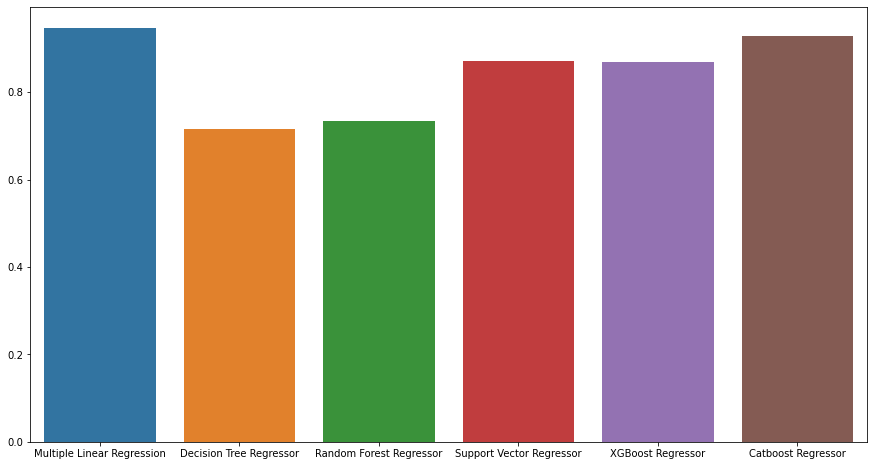

In [60]:
plt.figure(figsize=(15,8))
sns.barplot(x=Algorithm,y=r2_Score)

<AxesSubplot:>

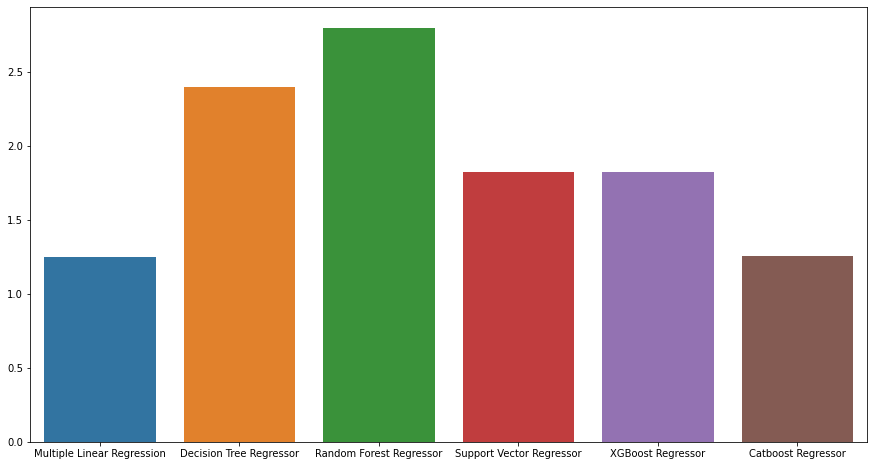

In [61]:
plt.figure(figsize=(15,8))
sns.barplot(x=Algorithm,y= MAE)

#### Multiple Linear Regressor seems to be performing better than all other regression algorithms on the given dataset. 
#### We will use it to predict the life expectancy.